# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [19]:
import json

In [20]:
with open('recipes.json') as f:
    recipes = json.load(f)

In [21]:
print(recipes[0])
print(len(recipes))

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}
39774


### Составление корпуса

In [22]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [23]:
texts = [recipe['ingredients'] for recipe in recipes] # collecting ingredients
dictionary = corpora.Dictionary(texts) # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов
#### Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.

In [24]:
print(texts[0])
for i in range(8):
    print(dictionary[i])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
black olives
feta cheese crumbles
garbanzo beans
garlic
grape tomatoes
pepper
purple onion
romaine lettuce
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [25]:
np.random.seed(76543)
num_topics = 40

In [26]:
# здесь код для построения модели:
%time ldamodel = models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, passes = 5)

Wall time: 1min 6s


In [27]:
#  save the model to save time on fitting
ldamodel.save('ldamodel_xkcd')

In [28]:
# laod the modelwhw
ldamodel = models.ldamodel.LdaModel.load('ldamodel_xkcd')

In [29]:
top = ldamodel.show_topics(40, 10, formatted=False)
top

[(0,
  [('garlic cloves', 0.08405288),
   ('chopped onion', 0.069529876),
   ('cooking spray', 0.067986034),
   ('salt', 0.06468144),
   ('water', 0.04359987),
   ('fat free less sodium chicken broth', 0.041805677),
   ('ground red pepper', 0.039737955),
   ('sliced green onions', 0.039119873),
   ('black pepper', 0.026424149),
   ('pinenuts', 0.024258865)]),
 (1,
  [('corn kernels', 0.07601656),
   ('diced onions', 0.064657666),
   ('tortillas', 0.05413426),
   ('salt and ground black pepper', 0.052568376),
   ('cream cheese', 0.052133158),
   ('1% low-fat milk', 0.04379862),
   ('vegetable stock', 0.03863764),
   ('sliced black olives', 0.03703235),
   ('cream cheese, soften', 0.035938643),
   ('chopped fresh chives', 0.03487316)]),
 (2,
  [('olive oil', 0.08060101),
   ('fresh parsley', 0.055074833),
   ('crushed red pepper', 0.051638857),
   ('salt', 0.041753713),
   ('grated parmesan cheese', 0.040612802),
   ('garlic cloves', 0.038797263),
   ('cherry tomatoes', 0.034304217),
   

In [30]:
# the code i can understand
c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs = 0, 0, 0, 0, 0, 0
for i in range(num_topics):
    # in the list of top words i iterate every topic whicch is (<number>, [(<'ingredent'>, <probability>)])
    # and collect this part - [(<'ingredent'>, <probability>)]
    pairs = top[i][1]
    for item in pairs:
        # then i check if [<'ingredent'>] equals one of the works to be found
        word = item[0]
        if word == 'salt':
            c_salt +=1
        elif word == 'sugar':
            c_sugar +=1
        elif word == 'water':
            c_water +=1
        elif word == 'mushrooms':
            c_mushrooms +=1
        elif word == 'chicken':
            c_chicken +=1
        elif word == 'eggs':
            c_eggs +=1
print(f'salt: {c_salt}, sugar: {c_sugar}, water: {c_water}, mushrooms: {c_mushrooms}, chicken: {c_chicken}, eggs: {c_eggs}')

salt: 23, sugar: 9, water: 10, mushrooms: 0, chicken: 1, eggs: 2


In [31]:
# the nicer piece of code i do not understand yet
words = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
result = dict(zip(words, [0]*6))
for w in words:
    for top_list in top:
        for top_w in top_list[1]:
            if w == top_w[0]:
                result[w] += 1
result

{'salt': 23, 'sugar': 9, 'water': 10, 'mushrooms': 0, 'chicken': 1, 'eggs': 2}

In [32]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open('cooking_LDA_pa_task1.txt', 'w') as fout:
       fout.write(' '.join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]])) 
save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [33]:
import copy
dictionary2 = copy.deepcopy(dictionary)
for i in range(8):
    print(dictionary2[i])

black olives
feta cheese crumbles
garbanzo beans
garlic
grape tomatoes
pepper
purple onion
romaine lettuce


__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [34]:
dictionary.dfs

{7: 270,
 0: 229,
 4: 228,
 3: 7380,
 5: 4438,
 6: 1896,
 8: 137,
 2: 148,
 1: 358,
 14: 154,
 12: 385,
 15: 18048,
 17: 3058,
 11: 4784,
 16: 361,
 9: 3388,
 10: 108,
 19: 341,
 13: 2263,
 18: 4385,
 26: 781,
 22: 483,
 24: 768,
 25: 5,
 23: 1442,
 28: 1184,
 27: 3296,
 20: 4847,
 21: 65,
 29: 7457,
 30: 26,
 32: 2627,
 46: 1477,
 36: 103,
 34: 1523,
 44: 7972,
 39: 282,
 41: 1394,
 35: 2036,
 45: 24,
 43: 1970,
 40: 2747,
 33: 343,
 38: 925,
 37: 40,
 42: 18,
 31: 839,
 52: 6434,
 48: 338,
 49: 1231,
 53: 1298,
 50: 678,
 51: 501,
 47: 1738,
 59: 7971,
 58: 461,
 54: 796,
 57: 1730,
 56: 1094,
 61: 73,
 62: 554,
 60: 940,
 55: 103,
 66: 22,
 67: 1,
 65: 1348,
 63: 173,
 64: 51,
 71: 56,
 75: 300,
 74: 119,
 70: 965,
 68: 424,
 72: 164,
 73: 1439,
 69: 1698,
 76: 298,
 78: 1137,
 77: 2747,
 79: 3113,
 83: 134,
 87: 62,
 81: 1706,
 86: 154,
 88: 55,
 84: 164,
 80: 1223,
 82: 578,
 85: 185,
 96: 425,
 93: 1503,
 92: 152,
 94: 341,
 99: 439,
 98: 1773,
 97: 1891,
 89: 264,
 95: 168,
 91:

In [35]:
dictionary.dfs[0]

229

In [36]:
most_freq = [d for d in dictionary2.dfs if dictionary2.dfs[d] > 4000]
most_freq

[3, 5, 15, 11, 18, 20, 29, 44, 52, 59, 104, 114]

In [37]:
for _ in most_freq:
    print(f'{dictionary2[_]} : {dictionary2.dfs[_]}')

garlic : 7380
pepper : 4438
salt : 18048
ground black pepper : 4784
vegetable oil : 4385
butter : 4847
water : 7457
onions : 7972
sugar : 6434
olive oil : 7971
garlic cloves : 6236
all-purpose flour : 4632


In [38]:
dict_size_before = len(dictionary2)
dictionary2.filter_tokens(most_freq)
dict_size_after = len(dictionary2)
print(f'dict_size_before: {dict_size_before}, dict_size_after: {dict_size_after}')

dict_size_before: 6714, dict_size_after: 6702


In [39]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]
corpus[2]

[(5, 1),
 (9, 1),
 (15, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1)]

In [40]:
def corpus_size(corp):
    size = 0
    for pair in corp:
        size += len(pair)
    return size

corpus_size_before = corpus_size(corpus)
corpus_size_after = corpus_size(corpus2)
print(f'corpus_size_before {corpus_size_before}, corpus_size_after {corpus_size_after}')

corpus_size_before 428249, corpus_size_after 343665


In [41]:
def save_answer2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open('cooking_LDA_pa_task2.txt', 'w') as fout:
        fout.write(' '.join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
save_answer2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [42]:
np.random.seed(76543)

In [43]:
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, num_topics = num_topics, id2word = dictionary2, passes = 5)

Wall time: 58.2 s


In [44]:
ldamodel2.save('ldamodel_xkcd2')

In [45]:
ldamodel2 = models.ldamodel.LdaModel.load('ldamodel_xkcd2')

In [46]:
tops = ldamodel.top_topics(corpus)
tops2 = ldamodel.top_topics(corpus2)
tops

[([(0.07452248, 'sour cream'),
   (0.046799023, 'chili powder'),
   (0.04545586, 'salsa'),
   (0.044873804, 'flour tortillas'),
   (0.040240515, 'black beans'),
   (0.03965576, 'shredded cheddar cheese'),
   (0.03770689, 'corn tortillas'),
   (0.03100867, 'ground cumin'),
   (0.028514445, 'cilantro'),
   (0.027144223, 'salt'),
   (0.026456581, 'onions'),
   (0.024528202, 'green onions'),
   (0.022379726, 'cumin'),
   (0.021879211, 'avocado'),
   (0.018136147, 'jalapeno chilies'),
   (0.01799721, 'tomatoes'),
   (0.016857203, 'olive oil'),
   (0.015168429, 'corn'),
   (0.015056938, 'enchilada sauce'),
   (0.015056503, 'garlic')],
  -2.1952822737672593),
 ([(0.08799493, 'soy sauce'),
   (0.05419034, 'sesame oil'),
   (0.045509487, 'scallions'),
   (0.0443277, 'green onions'),
   (0.039185, 'corn starch'),
   (0.038814325, 'rice vinegar'),
   (0.03624185, 'sugar'),
   (0.03374716, 'garlic'),
   (0.030857934, 'vegetable oil'),
   (0.02684461, 'fresh ginger'),
   (0.025433343, 'water'),
   

In [47]:
def avg_coherence(tops):
    coherence = [x[1] for x in tops]
    return np.average(coherence)

coherence = avg_coherence(tops)
coherence2 = avg_coherence(tops2)
print(f'coherence: {coherence}, coherence2: {coherence2}')

coherence: -5.804997312362428, coherence2: -15.767491257257864


In [48]:
def save_answers3(coherence, coherence2):
    with open('cooking_LDA_pa_task3.txt', 'w') as fout:
        fout.write(' '.join(["%3f"%el for el in [coherence, coherence2]]))
save_answers3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [49]:
doc = ldamodel2.get_document_topics(corpus2[0])
# returns each element in the list is a pair of a topic representation and its coherence score
doc

[(25, 0.128125), (30, 0.13393019), (31, 0.6223198)]

Также выведите содержимое переменной *.alpha* второй модели:

In [50]:
ldamodel2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [51]:
np.random.seed(76543)
%time ldamodel3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes = 5, alpha=1)

Wall time: 42.8 s


In [52]:
ldamodel3.save('ldamodel_xkcd3')

In [53]:
ldamodel3 = models.ldamodel.LdaModel.load('ldamodel_xkcd3')

In [54]:
ldamodel3.get_document_topics(corpus[0])

[(0, 0.021695822),
 (1, 0.02292411),
 (2, 0.020408163),
 (3, 0.041062277),
 (4, 0.021392435),
 (5, 0.031005964),
 (6, 0.020522937),
 (7, 0.020524312),
 (8, 0.020792859),
 (9, 0.020822437),
 (10, 0.020790214),
 (11, 0.040557817),
 (12, 0.020417145),
 (13, 0.04546873),
 (14, 0.02068342),
 (15, 0.020825034),
 (16, 0.020644138),
 (17, 0.020983733),
 (18, 0.02040817),
 (19, 0.020582668),
 (20, 0.024073495),
 (21, 0.020514075),
 (22, 0.020408163),
 (23, 0.020420155),
 (24, 0.020909522),
 (25, 0.020781055),
 (26, 0.020660948),
 (27, 0.020482056),
 (28, 0.020718073),
 (29, 0.020483883),
 (30, 0.0408474),
 (31, 0.068145886),
 (32, 0.021023847),
 (33, 0.02051092),
 (34, 0.022154747),
 (35, 0.020476999),
 (36, 0.020432752),
 (37, 0.020526983),
 (38, 0.020410515),
 (39, 0.043506145)]

In [55]:
def doc_topics_sum(model):
    sum_ = 0
    for doc in corpus2:
        topics = model.get_document_topics(doc, minimum_probability = 0.01)
        sum_ += len(topics)
    return sum_
        
count_model2 = doc_topics_sum(ldamodel2)
count_model3 = doc_topics_sum(ldamodel3)
print(f'count_model2: {count_model2}, count_model3: {count_model3}')

count_model2: 198330, count_model3: 1590960


In [56]:
def save_answers4(count_model2, count_model3):
    with open('cooking_LDA_pa_task4.txt', 'w') as fout:
        fout.write(' '.join([str(el) for el in [count_model2, count_model3]]))
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [58]:
y = [r['cuisine'] for r in recipes]
print(y)

['greek', 'southern_us', 'filipino', 'indian', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'italian', 'italian', 'chinese', 'italian', 'mexican', 'italian', 'indian', 'british', 'italian', 'thai', 'vietnamese', 'thai', 'mexican', 'southern_us', 'chinese', 'italian', 'chinese', 'cajun_creole', 'italian', 'chinese', 'mexican', 'italian', 'cajun_creole', 'mexican', 'thai', 'italian', 'cajun_creole', 'italian', 'filipino', 'southern_us', 'southern_us', 'italian', 'brazilian', 'mexican', 'indian', 'mexican', 'chinese', 'french', 'southern_us', 'southern_us', 'southern_us', 'japanese', 'southern_us', 'italian', 'southern_us', 'italian', 'jamaican', 'japanese', 'indian', 'italian', 'irish', 'thai', 'thai', 'indian', 'jamaican', 'italian', 'thai', 'korean', 'french', 'french', 'southern_us', 'spanish', 'indian', 'moroccan', 'italian', 'italian', 'moroccan', 'moroccan', 'vietnamese', 'japanese', 'mexican', 'cajun_creole', 'southern_us', 'french', 'indian', 'indian', 'italian', 'itali

In [59]:
X = np.zeros((len(recipes), 40))
for i in range(len(recipes)):
    topics = ldamodel2.get_document_topics(corpus2[i])
    for topic in topics:
        idx = topic[0]
        val = topic[1]
        X[i, idx] = val

In [60]:
X = np.zeros((len(recipes), 40))
for i in range(len(recipes)):
    topics = ldamodel2.get_document_topics(corpus2[i])
    for topic in topics:
        print(topic)

(25, 0.128125)
(30, 0.13393238)
(31, 0.6223176)
(3, 0.11388889)
(4, 0.44718054)
(9, 0.11393057)
(39, 0.22500001)
(11, 0.10687332)
(15, 0.1025)
(17, 0.11695299)
(21, 0.10250001)
(22, 0.16522545)
(23, 0.22053254)
(29, 0.102915704)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.5125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(1, 0.10802206)
(4, 0.057108477)
(10, 0.23758352)
(15, 0.0742904)
(21, 0.39986548)
(32, 0.0731301)
(2, 0.102597974)
(4, 0.24254218)
(9, 0.102553226)
(12, 0.29362267)
(18, 0.17118396)
(2, 0.102499984)
(6, 0.29279146)
(14, 0.11206536)
(24, 0.20250002)
(39, 0.2026

(21, 0.275)
(23, 0.25132537)
(24, 0.116856456)
(33, 0.09318182)
(7, 0.31601444)
(19, 0.1609324)
(32, 0.2480532)
(38, 0.14642857)
(8, 0.128125)
(13, 0.12915605)
(24, 0.36693218)
(25, 0.13828677)
(28, 0.128125)
(7, 0.15023999)
(17, 0.7442045)
(6, 0.16803804)
(9, 0.18696569)
(12, 0.22713913)
(19, 0.14642857)
(31, 0.14642857)
(3, 0.06836225)
(4, 0.19068404)
(6, 0.21877143)
(12, 0.17843437)
(15, 0.068333335)
(27, 0.13499999)
(38, 0.08541462)
(4, 0.25625)
(30, 0.25625)
(35, 0.25625)
(14, 0.11156455)
(18, 0.39898846)
(19, 0.3008593)
(33, 0.10676952)
(2, 0.253125)
(30, 0.12812561)
(31, 0.35389593)
(32, 0.15235348)
(5, 0.10970187)
(23, 0.61189556)
(31, 0.09318182)
(32, 0.103402525)
(6, 0.18998818)
(10, 0.3743599)
(17, 0.3431519)
(11, 0.4217088)
(14, 0.13916866)
(17, 0.16238184)
(21, 0.22049066)
(6, 0.10342195)
(8, 0.09318182)
(9, 0.11083033)
(19, 0.097772986)
(20, 0.096538335)
(23, 0.1826182)
(30, 0.24063641)
(9, 0.12391515)
(10, 0.30957872)
(16, 0.19376704)
(21, 0.1758458)
(28, 0.08659915)
(33

(4, 0.37241268)
(7, 0.096332945)
(14, 0.0949801)
(18, 0.26354697)
(27, 0.09318181)
(1, 0.123387724)
(6, 0.2249997)
(16, 0.12364851)
(18, 0.104129255)
(27, 0.3266126)
(4, 0.33611113)
(14, 0.11388889)
(23, 0.44722223)
(8, 0.20250002)
(10, 0.13178024)
(17, 0.14503202)
(24, 0.1804891)
(29, 0.1025)
(33, 0.15269865)
(28, 0.34166667)
(31, 0.34166667)
(6, 0.4278029)
(19, 0.24719715)
(37, 0.17083333)
(6, 0.22721054)
(23, 0.2731012)
(30, 0.128492)
(35, 0.25869626)
(12, 0.17083333)
(14, 0.17083333)
(23, 0.50416666)
(17, 0.14642857)
(21, 0.14642857)
(24, 0.24831226)
(26, 0.18740202)
(29, 0.14642857)
(5, 0.17686312)
(21, 0.3375)
(28, 0.33147022)
(5, 0.0640625)
(24, 0.07457676)
(25, 0.0640625)
(27, 0.37776878)
(33, 0.22900927)
(35, 0.13739523)
(18, 0.14642857)
(23, 0.7178572)
(6, 0.17083333)
(15, 0.285023)
(24, 0.22331034)
(29, 0.17083335)
(1, 0.058420006)
(8, 0.053947367)
(12, 0.10657895)
(13, 0.10679339)
(16, 0.053947367)
(19, 0.1453789)
(23, 0.053828184)
(29, 0.053947367)
(30, 0.053947367)
(31, 0

(8, 0.09318182)
(27, 0.18702973)
(32, 0.3133176)
(34, 0.1428345)
(36, 0.09318182)
(37, 0.09318182)
(4, 0.433274)
(6, 0.19898254)
(12, 0.14274344)
(36, 0.15576924)
(0, 0.1025)
(1, 0.1025)
(8, 0.1025)
(17, 0.20249994)
(27, 0.20250008)
(37, 0.20250002)
(12, 0.605)
(30, 0.205)
(18, 0.50625)
(37, 0.25625002)
(0, 0.14642857)
(2, 0.14921954)
(7, 0.572209)
(4, 0.75625)
(0, 0.14642856)
(8, 0.14642856)
(32, 0.57500005)
(5, 0.16259344)
(28, 0.4474066)
(37, 0.20500001)
(4, 0.10758637)
(12, 0.18527079)
(22, 0.28928572)
(26, 0.14642859)
(30, 0.14642859)
(1, 0.21699414)
(19, 0.62467253)
(10, 0.17083333)
(11, 0.1708333)
(18, 0.17083333)
(24, 0.3375)
(5, 0.1025)
(10, 0.1738511)
(16, 0.11901717)
(18, 0.20250002)
(21, 0.21463172)
(28, 0.10250001)
(4, 0.30464867)
(12, 0.42037824)
(18, 0.17219535)
(16, 0.0769854)
(17, 0.060413074)
(24, 0.057386924)
(25, 0.05311691)
(26, 0.1018791)
(27, 0.15134773)
(28, 0.107563116)
(38, 0.055154264)
(39, 0.29740348)
(2, 0.060372386)
(23, 0.8837453)
(23, 0.85260266)
(26, 0.

(5, 0.093181804)
(23, 0.43898118)
(24, 0.12095291)
(31, 0.17415684)
(38, 0.09318182)
(3, 0.67083335)
(23, 0.17083333)
(0, 0.23530398)
(17, 0.076537386)
(24, 0.11861651)
(26, 0.43421414)
(30, 0.07282797)
(4, 0.23565167)
(5, 0.12812501)
(14, 0.12812501)
(17, 0.1296398)
(26, 0.14408353)
(37, 0.12812501)
(2, 0.10988232)
(7, 0.03284803)
(12, 0.05125)
(16, 0.056251545)
(17, 0.21277206)
(19, 0.05125)
(33, 0.07324367)
(37, 0.051250003)
(39, 0.3225024)
(7, 0.3375)
(19, 0.17083333)
(32, 0.17083333)
(37, 0.17083335)
(0, 0.1138889)
(8, 0.1138889)
(13, 0.11388889)
(15, 0.11388889)
(17, 0.1143315)
(26, 0.3356685)
(9, 0.2702782)
(12, 0.48597184)
(13, 0.128125)
(6, 0.25625)
(34, 0.25625)
(35, 0.25625)
(3, 0.07337886)
(4, 0.29564723)
(12, 0.08043506)
(14, 0.2275892)
(17, 0.26044965)
(11, 0.14588748)
(15, 0.1319931)
(17, 0.128125)
(19, 0.35649443)
(25, 0.128125)
(1, 0.1025)
(4, 0.29015368)
(12, 0.20738836)
(18, 0.10250001)
(20, 0.10995797)
(31, 0.10250001)
(3, 0.28928572)
(16, 0.14642857)
(22, 0.1464285

(28, 0.14642857)
(29, 0.14642857)
(30, 0.14642857)
(37, 0.14642857)
(1, 0.1660277)
(6, 0.40941215)
(19, 0.2924173)
(23, 0.83750004)
(7, 0.050335024)
(10, 0.24860252)
(16, 0.44739065)
(18, 0.048128355)
(19, 0.044439707)
(25, 0.04817154)
(28, 0.07855723)
(4, 0.16072631)
(9, 0.50589263)
(38, 0.17921439)
(3, 0.112500004)
(4, 0.1888539)
(9, 0.062408336)
(12, 0.13052273)
(15, 0.07334842)
(22, 0.06379645)
(25, 0.060598392)
(27, 0.056944445)
(29, 0.09259362)
(34, 0.05694445)
(38, 0.06121148)
(5, 0.17083332)
(7, 0.3261773)
(32, 0.34882268)
(12, 0.25625)
(38, 0.50625)
(7, 0.12563592)
(23, 0.76880854)
(5, 0.205)
(7, 0.205)
(13, 0.205)
(34, 0.20500001)
(6, 0.11574452)
(7, 0.15622869)
(20, 0.40403092)
(29, 0.0756456)
(34, 0.18585025)
(0, 0.28928572)
(12, 0.17615688)
(18, 0.16539387)
(30, 0.24059208)
(15, 0.21625806)
(19, 0.6254086)
(18, 0.24001758)
(19, 0.205)
(24, 0.17125195)
(29, 0.20373046)
(11, 0.22644901)
(12, 0.37812504)
(22, 0.15480098)
(34, 0.128125)
(14, 0.124425545)
(17, 0.11388889)
(21, 

(14, 0.114499785)
(15, 0.10250001)
(23, 0.20250002)
(27, 0.24707489)
(28, 0.14592533)
(35, 0.10250001)
(3, 0.15284729)
(4, 0.4508512)
(18, 0.28067654)
(3, 0.503125)
(19, 0.12812501)
(28, 0.128125)
(39, 0.128125)
(1, 0.09390703)
(5, 0.09184617)
(19, 0.47144726)
(26, 0.088945396)
(39, 0.18093748)
(0, 0.08541667)
(4, 0.16870236)
(9, 0.10358721)
(12, 0.30549964)
(27, 0.16875)
(30, 0.097210795)
(2, 0.34166667)
(14, 0.34166667)
(10, 0.07377216)
(14, 0.11833352)
(15, 0.16400555)
(23, 0.07614441)
(26, 0.060294118)
(27, 0.3371142)
(30, 0.12180662)
(11, 0.205)
(19, 0.39999694)
(31, 0.21000306)
(4, 0.40499997)
(7, 0.20500001)
(17, 0.205)
(5, 0.076498084)
(6, 0.08677813)
(8, 0.073214285)
(16, 0.08422287)
(19, 0.14758469)
(20, 0.13308178)
(29, 0.073214285)
(39, 0.26826304)
(4, 0.2811842)
(17, 0.25460485)
(34, 0.18110947)
(37, 0.15453008)
(11, 0.17083333)
(13, 0.17083335)
(15, 0.17083333)
(18, 0.17083335)
(26, 0.17083333)
(0, 0.17320222)
(5, 0.08541667)
(10, 0.16245376)
(11, 0.1281825)
(17, 0.102624

(24, 0.19350465)
(28, 0.19146293)
(33, 0.46086577)
(2, 0.07814305)
(17, 0.1285458)
(24, 0.1429346)
(25, 0.128125)
(26, 0.25892207)
(33, 0.15707947)
(1, 0.08541667)
(3, 0.08541665)
(17, 0.211097)
(24, 0.110490374)
(35, 0.3450899)
(38, 0.09165604)
(1, 0.11388889)
(8, 0.11388889)
(20, 0.14658614)
(23, 0.13509041)
(24, 0.28221235)
(28, 0.11388889)
(10, 0.16917175)
(18, 0.06879543)
(24, 0.09456499)
(26, 0.4988411)
(34, 0.0642461)
(36, 0.05438058)
(3, 0.12819892)
(12, 0.36984754)
(17, 0.253125)
(37, 0.13632853)
(12, 0.17083335)
(13, 0.17083333)
(31, 0.3375)
(38, 0.17083333)
(0, 0.09318182)
(2, 0.19698024)
(6, 0.09318182)
(23, 0.11299027)
(24, 0.09318182)
(28, 0.1337818)
(29, 0.20170225)
(3, 0.093232684)
(4, 0.110201456)
(12, 0.2570751)
(13, 0.09318182)
(18, 0.067796916)
(26, 0.09318182)
(30, 0.2103302)
(25, 0.17083333)
(27, 0.17083333)
(32, 0.3375)
(35, 0.17083333)
(1, 0.205)
(24, 0.605)
(18, 0.205)
(20, 0.40500003)
(31, 0.205)
(22, 0.17083335)
(23, 0.67083335)
(3, 0.35650516)
(4, 0.20249994

(21, 0.15576924)
(25, 0.15576924)
(26, 0.08050568)
(27, 0.38653848)
(30, 0.1541097)
(4, 0.22801283)
(7, 0.31402433)
(12, 0.26374453)
(37, 0.10421827)
(6, 0.247259)
(7, 0.24375218)
(19, 0.20507425)
(20, 0.20391455)
(9, 0.67083335)
(16, 0.17083335)
(4, 0.5041667)
(23, 0.1708333)
(33, 0.17083333)
(22, 0.3416667)
(34, 0.34166667)
(7, 0.11525788)
(12, 0.6001605)
(19, 0.1025)
(34, 0.0920817)
(7, 0.15576926)
(8, 0.07884615)
(14, 0.16045077)
(24, 0.087625906)
(27, 0.29615408)
(29, 0.07884615)
(38, 0.07884615)
(2, 0.11359017)
(8, 0.056944445)
(13, 0.059492428)
(14, 0.058362585)
(18, 0.04155223)
(23, 0.081986755)
(24, 0.42439643)
(28, 0.06267326)
(36, 0.057946146)
(2, 0.13521056)
(10, 0.46974927)
(19, 0.0640625)
(22, 0.0640625)
(28, 0.06486617)
(34, 0.14892402)
(2, 0.20477054)
(24, 0.6052295)
(1, 0.17083333)
(7, 0.3375)
(18, 0.17083333)
(26, 0.17083333)
(2, 0.24374999)
(6, 0.36862898)
(33, 0.13681102)
(39, 0.13831005)
(13, 0.102917336)
(15, 0.1025)
(24, 0.57542706)
(33, 0.12915559)
(4, 0.0696887

(9, 0.33478704)
(12, 0.5068796)
(14, 0.14642857)
(19, 0.14642857)
(20, 0.28928572)
(31, 0.14642857)
(38, 0.14642857)
(0, 0.17083333)
(24, 0.50416666)
(34, 0.17083333)
(16, 0.25625)
(28, 0.25625)
(39, 0.25625002)
(2, 0.15576924)
(19, 0.28213283)
(22, 0.16402395)
(32, 0.07884659)
(39, 0.25191972)
(7, 0.40500003)
(17, 0.40499997)
(25, 0.128125)
(30, 0.28553146)
(33, 0.34571856)
(35, 0.128125)
(10, 0.23034371)
(30, 0.33738992)
(32, 0.1318429)
(34, 0.20042345)
(15, 0.14642857)
(27, 0.14642857)
(32, 0.28928572)
(35, 0.14642857)
(39, 0.14642859)
(12, 0.64266664)
(17, 0.14464284)
(18, 0.073214285)
(37, 0.07519055)
(1, 0.06512046)
(6, 0.077532135)
(24, 0.07311411)
(28, 0.06067043)
(33, 0.08200862)
(34, 0.09212567)
(35, 0.065426126)
(37, 0.060294118)
(39, 0.3781201)
(2, 0.085416675)
(5, 0.08541667)
(6, 0.1206514)
(9, 0.13351525)
(10, 0.08510166)
(11, 0.085731685)
(14, 0.08541667)
(16, 0.16875)
(27, 0.08541667)
(4, 0.25311184)
(6, 0.128125)
(19, 0.128125)
(26, 0.37813818)
(11, 0.33749998)
(28, 0.

(35, 0.2892857)
(12, 0.42756036)
(14, 0.13355078)
(34, 0.22499998)
(36, 0.11388889)
(2, 0.40499997)
(29, 0.40500003)
(0, 0.30291146)
(1, 0.128125)
(22, 0.128125)
(24, 0.20333852)
(31, 0.128125)
(4, 0.205)
(22, 0.40499997)
(27, 0.205)
(12, 0.5025)
(18, 0.3025)
(19, 0.1025)
(17, 0.37813124)
(19, 0.128125)
(33, 0.37811875)
(7, 0.3978333)
(8, 0.1025)
(25, 0.20301406)
(26, 0.10665264)
(36, 0.10250001)
(11, 0.575)
(32, 0.2892857)
(8, 0.12812501)
(9, 0.14341502)
(10, 0.15874542)
(16, 0.20721456)
(33, 0.12812501)
(34, 0.128125)
(10, 0.3437862)
(11, 0.57704717)
(7, 0.095722325)
(14, 0.08508268)
(17, 0.123146534)
(26, 0.188405)
(32, 0.36342028)
(33, 0.07883859)
(19, 0.14393939)
(23, 0.23597166)
(31, 0.11388889)
(35, 0.29508898)
(37, 0.11388889)
(5, 0.128125)
(19, 0.128125)
(22, 0.128125)
(26, 0.128125)
(29, 0.128125)
(32, 0.128125)
(36, 0.128125)
(0, 0.125817)
(6, 0.11148568)
(10, 0.2983368)
(14, 0.11349402)
(16, 0.15520194)
(21, 0.13027994)
(1, 0.060294118)
(2, 0.061086338)
(10, 0.25901628)
(11

(6, 0.20402266)
(18, 0.07321428)
(19, 0.08119707)
(26, 0.07728027)
(31, 0.14464286)
(35, 0.21607143)
(37, 0.14464286)
(6, 0.13682134)
(19, 0.28549644)
(20, 0.21493536)
(25, 0.09318182)
(32, 0.19001961)
(12, 0.405)
(34, 0.405)
(0, 0.07322402)
(9, 0.073214285)
(10, 0.23005037)
(17, 0.17908578)
(18, 0.11548187)
(24, 0.12632266)
(28, 0.1436924)
(3, 0.16875194)
(4, 0.35584167)
(14, 0.088178016)
(18, 0.22889502)
(35, 0.08541667)
(10, 0.13471222)
(16, 0.11388889)
(21, 0.64862114)
(2, 0.1253061)
(3, 0.1025)
(4, 0.10192557)
(6, 0.1025)
(11, 0.11410846)
(17, 0.3686599)
(10, 0.8194467)
(31, 0.101386614)
(12, 0.42355973)
(15, 0.28928572)
(30, 0.15501168)
(5, 0.20250002)
(26, 0.43145037)
(33, 0.16548356)
(39, 0.11056606)
(12, 0.7764976)
(37, 0.117946915)
(0, 0.14642857)
(3, 0.18464693)
(18, 0.25106734)
(31, 0.14642857)
(35, 0.14642857)
(18, 0.25624996)
(19, 0.50625)
(17, 0.2158427)
(20, 0.1025)
(24, 0.18658684)
(33, 0.40507048)
(2, 0.20494723)
(12, 0.205)
(24, 0.20505276)
(29, 0.205)
(1, 0.09318182

(0, 0.3350852)
(13, 0.07884615)
(26, 0.36106858)
(27, 0.15576926)
(0, 0.0912141)
(23, 0.27582738)
(24, 0.18039931)
(28, 0.18976335)
(34, 0.099236816)
(35, 0.092725694)
(23, 0.52888227)
(29, 0.128125)
(39, 0.22736774)
(12, 0.08541667)
(16, 0.09485977)
(23, 0.13710983)
(28, 0.37444666)
(34, 0.14440142)
(35, 0.09293231)
(24, 0.4025)
(26, 0.1025)
(33, 0.1025)
(36, 0.20250002)
(38, 0.1025)
(10, 0.42832756)
(19, 0.16711195)
(20, 0.102706306)
(34, 0.22003597)
(2, 0.0640625)
(6, 0.16665608)
(7, 0.07627291)
(9, 0.064600214)
(32, 0.19637637)
(34, 0.07115677)
(35, 0.24681269)
(37, 0.0640625)
(5, 0.087588005)
(12, 0.09379061)
(17, 0.08900902)
(19, 0.17460878)
(22, 0.08541667)
(31, 0.16037606)
(32, 0.09673458)
(38, 0.08541667)
(39, 0.06247626)
(13, 0.11388889)
(19, 0.24601272)
(24, 0.40388307)
(31, 0.13621536)
(21, 0.14642857)
(24, 0.2492676)
(26, 0.18644668)
(34, 0.28928572)
(2, 0.09428884)
(6, 0.25511232)
(7, 0.124719374)
(28, 0.09383666)
(32, 0.35249734)
(7, 0.37849364)
(8, 0.07432616)
(11, 0.07

(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.5125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(9, 0.75625)
(10, 0.36923006)
(16, 0.068333335)
(17, 0.13102561)
(21, 0.07625571)
(24, 0.13989383)
(26, 0.09192812)
(37, 0.068333335)
(6, 0.068333335)
(7, 0.068333335)
(10, 0.31995872)
(14, 0.11980011)
(22, 0.067515515)
(28, 0.16098218)
(35, 0.14007682)
(0, 0.19767614)
(17, 0.18101065)
(22, 0.073214285)
(26, 0.48381323)
(8, 0.0640625)
(17, 0.19565713)
(24, 0.426778)
(25, 0.06603526)
(28, 0.06436935)
(29, 0.06673578)
(30, 0.06479948)
(4, 0.17083333)
(10, 0.17083333)
(27, 0.50416666)
(3, 0.1025)
(8, 0.1025)
(20, 0.10249823)
(26, 0.17714402)
(29, 0.20249999)
(33, 0.11535619)
(35, 0.115001544)
(16, 0.08037249)
(20, 0.15375511)
(23, 0.2636722)
(2

(11, 0.09955056)
(14, 0.09318269)
(22, 0.09933865)
(23, 0.62610996)
(9, 0.06833334)
(21, 0.06833334)
(22, 0.13500002)
(23, 0.60019386)
(31, 0.069806114)
(3, 0.128125)
(4, 0.628125)
(16, 0.128125)
(24, 0.675)
(6, 0.050249293)
(7, 0.04880952)
(8, 0.04880952)
(10, 0.055420786)
(11, 0.048809517)
(15, 0.050931163)
(23, 0.18267778)
(24, 0.29005253)
(29, 0.04880952)
(34, 0.04880952)
(38, 0.09209703)
(0, 0.09318182)
(8, 0.18409091)
(18, 0.09318182)
(23, 0.3659091)
(29, 0.09318182)
(33, 0.09318182)
(4, 0.33750004)
(27, 0.17083332)
(34, 0.17083333)
(39, 0.17083329)
(0, 0.112620376)
(3, 0.1025)
(10, 0.23035112)
(17, 0.35973087)
(25, 0.10729768)
(3, 0.128125)
(11, 0.128125)
(15, 0.128125)
(23, 0.503125)
(5, 0.109042175)
(7, 0.16823053)
(18, 0.275)
(21, 0.18409091)
(22, 0.09318182)
(30, 0.09318182)
(10, 0.12784836)
(17, 0.1433643)
(20, 0.06687356)
(24, 0.30697766)
(26, 0.23788707)
(30, 0.06392412)
(12, 0.75625)
(3, 0.1025)
(4, 0.21198687)
(6, 0.29301316)
(7, 0.20250002)
(21, 0.1025)
(0, 0.28603578)

(8, 0.07884615)
(12, 0.16587767)
(17, 0.105474666)
(24, 0.1480358)
(26, 0.08794216)
(33, 0.08032114)
(34, 0.18882847)
(36, 0.083135456)
(6, 0.1025)
(12, 0.112562954)
(22, 0.3548291)
(30, 0.16760667)
(34, 0.1750013)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.51250005)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(11, 0.09318182)
(26, 0.30817783)
(27, 0.42364037)
(33, 0.09318182)
(0, 0.128125)
(12, 0.25326142)
(16, 0.25325865)
(18, 0.12785496)
(34, 0.128125)
(23, 0.46300763)
(28, 0.2515529)
(38, 0.19293949)
(15, 0.128125)
(17, 0.17431764)
(19, 0.128125)
(29, 0.08193234)
(35, 0.12

(28, 0.4033668)
(35, 0.1623332)
(7, 0.5360415)
(8, 0.09318182)
(19, 0.10091586)
(20, 0.09713352)
(28, 0.09318182)
(5, 0.09381275)
(10, 0.34217036)
(11, 0.3890169)
(18, 0.09318181)
(0, 0.15580179)
(3, 0.0907208)
(11, 0.08717443)
(18, 0.20778364)
(22, 0.15576924)
(32, 0.1280587)
(34, 0.11122986)
(7, 0.17083333)
(18, 0.14199845)
(30, 0.53300154)
(14, 0.2355807)
(15, 0.09318182)
(17, 0.09318182)
(23, 0.3144193)
(31, 0.09318182)
(35, 0.09318182)
(3, 0.1737757)
(4, 0.3730904)
(6, 0.10367825)
(9, 0.118934005)
(12, 0.15760496)
(6, 0.118612915)
(19, 0.4406927)
(24, 0.33791667)
(0, 0.11388889)
(17, 0.11388889)
(22, 0.22500001)
(24, 0.1928957)
(32, 0.11388889)
(33, 0.14599319)
(3, 0.11118291)
(9, 0.2938171)
(21, 0.1025)
(22, 0.1025)
(27, 0.20250002)
(31, 0.1025)
(9, 0.17083569)
(13, 0.17083333)
(18, 0.33860567)
(19, 0.16972528)
(8, 0.30250004)
(26, 0.4025703)
(37, 0.2024297)
(6, 0.09526737)
(7, 0.4174946)
(17, 0.076279186)
(20, 0.06895512)
(35, 0.13284594)
(39, 0.1560328)
(7, 0.11388889)
(9, 0.11

(3, 0.28527468)
(4, 0.21151924)
(29, 0.13758107)
(38, 0.128125)
(39, 0.128125)
(3, 0.14642857)
(9, 0.14642857)
(12, 0.14642857)
(18, 0.14642857)
(29, 0.28928572)
(3, 0.22155577)
(4, 0.42067245)
(18, 0.18277179)
(37, 0.09318182)
(0, 0.07335854)
(11, 0.07337153)
(17, 0.12697734)
(20, 0.073214285)
(26, 0.14464284)
(34, 0.073214285)
(36, 0.073214285)
(39, 0.304864)
(10, 0.2896327)
(17, 0.22666189)
(18, 0.38092765)
(0, 0.11388889)
(1, 0.33611113)
(8, 0.1138889)
(26, 0.22499998)
(35, 0.113888875)
(2, 0.17083335)
(18, 0.17083333)
(24, 0.17367907)
(28, 0.33465424)
(2, 0.102340266)
(6, 0.20250002)
(24, 0.40265974)
(36, 0.20250002)
(7, 0.29178438)
(8, 0.1025)
(19, 0.10970144)
(28, 0.11606016)
(30, 0.1607676)
(32, 0.13418642)
(0, 0.13142663)
(1, 0.12888974)
(8, 0.11388889)
(22, 0.11697253)
(26, 0.4116)
(13, 0.11388889)
(17, 0.11388889)
(19, 0.15343395)
(31, 0.1138889)
(32, 0.40767717)
(1, 0.22500044)
(6, 0.3361089)
(16, 0.11388889)
(34, 0.11388889)
(35, 0.113890685)
(4, 0.50416666)
(17, 0.1708333

(33, 0.25625002)
(0, 0.17295723)
(19, 0.48658666)
(33, 0.24795608)
(4, 0.23692758)
(21, 0.20317726)
(28, 0.1473906)
(30, 0.12250452)
(36, 0.1025)
(37, 0.1025)
(9, 0.14642857)
(10, 0.14642857)
(34, 0.28928572)
(37, 0.14642857)
(38, 0.14642857)
(9, 0.17083333)
(11, 0.17083333)
(18, 0.17083333)
(21, 0.3375)
(3, 0.09834546)
(6, 0.19525808)
(11, 0.060294118)
(19, 0.11911764)
(20, 0.10025968)
(22, 0.060294118)
(26, 0.18990618)
(27, 0.060294118)
(28, 0.070642374)
(7, 0.39140227)
(31, 0.12585889)
(32, 0.15773885)
(37, 0.22500001)
(2, 0.13742156)
(4, 0.07879782)
(15, 0.10764743)
(30, 0.13424848)
(33, 0.073924385)
(34, 0.08424895)
(38, 0.32478282)
(6, 0.2215794)
(11, 0.14642857)
(19, 0.35686806)
(31, 0.14655253)
(1, 0.064062506)
(5, 0.065417826)
(6, 0.1252067)
(12, 0.064062506)
(14, 0.064062506)
(20, 0.064062506)
(21, 0.064062506)
(29, 0.1265625)
(34, 0.064062506)
(35, 0.098388955)
(38, 0.064062506)
(39, 0.09223655)
(2, 0.16180456)
(3, 0.31477112)
(16, 0.253125)
(18, 0.1577993)
(6, 0.25714588)
(

(6, 0.14570896)
(9, 0.09318182)
(20, 0.17088275)
(26, 0.093181826)
(32, 0.09318182)
(34, 0.09318182)
(35, 0.14477192)
(37, 0.09318182)
(17, 0.087396234)
(23, 0.5820293)
(24, 0.08718567)
(28, 0.08505542)
(38, 0.08541667)
(3, 0.17083333)
(12, 0.33749998)
(18, 0.17083333)
(32, 0.17083333)
(12, 0.60499996)
(19, 0.205)
(20, 0.18283987)
(22, 0.11388889)
(23, 0.48644257)
(28, 0.11682871)
(6, 0.3025033)
(7, 0.2594332)
(17, 0.13432434)
(27, 0.2137392)
(1, 0.2650175)
(5, 0.073214285)
(9, 0.17004275)
(19, 0.11663253)
(22, 0.07293759)
(28, 0.075607345)
(32, 0.08580808)
(37, 0.08359706)
(11, 0.078846164)
(15, 0.07884614)
(19, 0.07884615)
(24, 0.07884614)
(25, 0.07884615)
(28, 0.07884615)
(33, 0.078846164)
(34, 0.3096154)
(35, 0.07884615)
(19, 0.25706607)
(39, 0.55293393)
(8, 0.11388889)
(12, 0.33611113)
(25, 0.44722223)
(4, 0.06004421)
(6, 0.16957323)
(15, 0.071794994)
(19, 0.24109288)
(27, 0.15989357)
(29, 0.061796278)
(32, 0.063249834)
(34, 0.12549622)
(4, 0.3416667)
(20, 0.34166667)
(8, 0.149189

(20, 0.11388889)
(23, 0.08685095)
(35, 0.14347714)
(1, 0.03237967)
(4, 0.03295437)
(5, 0.036826067)
(6, 0.03680773)
(10, 0.33933866)
(11, 0.11997149)
(15, 0.03706632)
(18, 0.03658683)
(23, 0.047413673)
(28, 0.11733542)
(29, 0.03691455)
(31, 0.03398255)
(34, 0.04007897)
(38, 0.032031253)
(4, 0.24400741)
(8, 0.09318182)
(12, 0.12081537)
(13, 0.09318182)
(19, 0.09318182)
(25, 0.09318182)
(32, 0.09654085)
(36, 0.09318182)
(24, 0.66915745)
(33, 0.17250925)
(7, 0.09318182)
(19, 0.09318182)
(23, 0.4257469)
(28, 0.096217796)
(35, 0.21212627)
(13, 0.13988632)
(15, 0.37812498)
(27, 0.24136369)
(31, 0.128125)
(2, 0.049923737)
(10, 0.3815537)
(14, 0.049364403)
(16, 0.3007813)
(21, 0.12175454)
(26, 0.056146093)
(15, 0.33611113)
(23, 0.44199467)
(35, 0.11911644)
(0, 0.1022383)
(19, 0.5776921)
(31, 0.14399712)
(33, 0.09425432)
(6, 0.0933927)
(7, 0.22086053)
(17, 0.15996934)
(26, 0.34906363)
(33, 0.12810272)
(2, 0.09318182)
(21, 0.09318182)
(23, 0.54376745)
(33, 0.09714165)
(37, 0.09318182)
(1, 0.1138

(1, 0.25208336)
(11, 0.23182167)
(32, 0.09494858)
(33, 0.0961464)
(38, 0.16875)
(39, 0.085416675)
(13, 0.128125)
(25, 0.128125)
(26, 0.628125)
(10, 0.1504706)
(21, 0.128125)
(24, 0.30015653)
(28, 0.18101504)
(33, 0.13085781)
(8, 0.23975046)
(25, 0.25625)
(26, 0.27274954)
(6, 0.10249867)
(7, 0.10250001)
(10, 0.20046267)
(15, 0.17034368)
(17, 0.109755255)
(18, 0.1294384)
(32, 0.10250134)
(22, 0.11388889)
(23, 0.44722217)
(28, 0.11388889)
(36, 0.22500001)
(13, 0.128125)
(18, 0.128125)
(25, 0.128125)
(31, 0.253125)
(32, 0.253125)
(9, 0.26091248)
(21, 0.262154)
(26, 0.34479067)
(6, 0.1570261)
(12, 0.56440246)
(38, 0.14642857)
(10, 0.3434871)
(21, 0.4398462)
(38, 0.11388889)
(0, 0.28928572)
(10, 0.14642857)
(29, 0.28928572)
(30, 0.14642857)
(12, 0.40500003)
(26, 0.205)
(29, 0.205)
(1, 0.128125)
(12, 0.16453785)
(17, 0.12946552)
(23, 0.18117383)
(28, 0.2873228)
(4, 0.11615769)
(6, 0.5559455)
(30, 0.114007935)
(34, 0.11388889)
(3, 0.128125)
(21, 0.14097945)
(24, 0.25312498)
(38, 0.36527056)
(0

(3, 0.11388889)
(17, 0.5240319)
(24, 0.25930148)
(6, 0.4006679)
(7, 0.14653328)
(19, 0.17779882)
(37, 0.14642856)
(3, 0.33611113)
(4, 0.22500001)
(12, 0.113888875)
(17, 0.11388889)
(34, 0.11388889)
(0, 0.08316377)
(8, 0.07884615)
(26, 0.60304725)
(34, 0.1657121)
(1, 0.09318182)
(2, 0.09318182)
(5, 0.09318182)
(15, 0.09955137)
(31, 0.17772134)
(33, 0.093181826)
(35, 0.18409091)
(38, 0.09318182)
(11, 0.128125)
(25, 0.128125)
(26, 0.128125)
(32, 0.128125)
(34, 0.128125)
(35, 0.25312504)
(5, 0.12812501)
(13, 0.128125)
(21, 0.36058792)
(24, 0.12813003)
(39, 0.14565705)
(0, 0.08713975)
(3, 0.073214285)
(15, 0.073214285)
(21, 0.10955865)
(23, 0.59437305)
(3, 0.093181826)
(16, 0.09349573)
(21, 0.7292316)
(5, 0.113027446)
(11, 0.27321833)
(16, 0.095439106)
(26, 0.43649694)
(5, 0.11388889)
(14, 0.11388889)
(17, 0.3306457)
(18, 0.23046538)
(23, 0.11388889)
(8, 0.11388889)
(19, 0.30256388)
(31, 0.36205637)
(32, 0.12149081)
(3, 0.1194383)
(4, 0.27486867)
(5, 0.09318182)
(17, 0.23752838)
(21, 0.0931

(3, 0.10250002)
(4, 0.10249998)
(6, 0.1025)
(14, 0.1025)
(18, 0.1025)
(27, 0.1025)
(29, 0.1025)
(34, 0.1025)
(38, 0.1025)
(26, 0.42810228)
(28, 0.20321958)
(37, 0.25305313)
(2, 0.068333335)
(6, 0.068333335)
(15, 0.068333335)
(17, 0.07349061)
(23, 0.08127972)
(25, 0.068333335)
(26, 0.37901625)
(34, 0.07288008)
(37, 0.068333335)
(3, 0.128125)
(4, 0.14606671)
(5, 0.128125)
(18, 0.16722807)
(19, 0.3210802)
(2, 0.17083333)
(6, 0.26830712)
(17, 0.17796685)
(33, 0.23289268)
(10, 0.12521788)
(17, 0.11405971)
(24, 0.2657327)
(26, 0.29824632)
(30, 0.10924337)
(8, 0.14642857)
(18, 0.26556686)
(23, 0.31300455)
(32, 0.14642857)
(0, 0.23428488)
(7, 0.4662873)
(27, 0.1025)
(33, 0.10692781)
(5, 0.128125)
(7, 0.128125)
(10, 0.26486886)
(21, 0.36638117)
(0, 0.0739599)
(2, 0.124125496)
(3, 0.09924934)
(28, 0.061828993)
(34, 0.13938177)
(39, 0.46097827)
(2, 0.128125)
(7, 0.128125)
(14, 0.2212894)
(20, 0.128125)
(34, 0.128125)
(35, 0.1599606)
(3, 0.11388889)
(4, 0.12243435)
(12, 0.5497879)
(13, 0.11388889)

(1, 0.051073626)
(6, 0.07174374)
(9, 0.13524087)
(11, 0.0834904)
(15, 0.0619223)
(16, 0.23339665)
(17, 0.09642857)
(19, 0.079663254)
(24, 0.11366066)
(32, 0.037665665)
(0, 0.25837854)
(12, 0.11388889)
(13, 0.114204794)
(26, 0.16310316)
(28, 0.11388889)
(31, 0.14209133)
(2, 0.17083333)
(22, 0.14648874)
(23, 0.36666727)
(39, 0.1660107)
(12, 0.10250001)
(20, 0.1025)
(21, 0.14661348)
(25, 0.10250001)
(26, 0.15838653)
(27, 0.1025)
(31, 0.1025)
(39, 0.10250001)
(12, 0.3375)
(18, 0.17083333)
(22, 0.17083333)
(26, 0.17083333)
(2, 0.205)
(15, 0.205)
(29, 0.205)
(38, 0.205)
(14, 0.092546746)
(22, 0.18409091)
(23, 0.54197085)
(28, 0.09957333)
(1, 0.21956487)
(7, 0.09449431)
(19, 0.19291902)
(20, 0.41120365)
(1, 0.08541666)
(2, 0.08541666)
(12, 0.08541666)
(26, 0.5854167)
(36, 0.08541666)
(4, 0.42783144)
(12, 0.24716853)
(38, 0.17083335)
(11, 0.22499998)
(17, 0.1206449)
(29, 0.12495455)
(34, 0.3182894)
(37, 0.11388889)
(22, 0.2210515)
(37, 0.3575199)
(39, 0.28928572)
(3, 0.205)
(13, 0.205)
(15, 0.

(12, 0.060294118)
(17, 0.060294118)
(21, 0.13099694)
(22, 0.12998971)
(23, 0.32307574)
(29, 0.12770233)
(32, 0.060294118)
(38, 0.060294118)
(10, 0.25625)
(30, 0.25625)
(31, 0.25625002)
(7, 0.4121993)
(25, 0.14642857)
(32, 0.1663721)
(33, 0.14642857)
(20, 0.33749998)
(32, 0.5041667)
(2, 0.12823126)
(4, 0.3327651)
(12, 0.28521264)
(22, 0.141291)
(6, 0.3879508)
(15, 0.205)
(30, 0.22204916)
(6, 0.3632312)
(29, 0.24676879)
(38, 0.205)
(2, 0.113888875)
(7, 0.14565092)
(26, 0.44758284)
(34, 0.19287732)
(7, 0.6132411)
(33, 0.23269232)
(37, 0.08291277)
(10, 0.09317522)
(12, 0.09318182)
(17, 0.18409091)
(18, 0.09318843)
(21, 0.09318182)
(23, 0.09318182)
(25, 0.09318182)
(28, 0.09318182)
(30, 0.09318182)
(11, 0.08541667)
(12, 0.08541667)
(13, 0.08541667)
(15, 0.16875)
(18, 0.16875)
(27, 0.08541667)
(31, 0.25208333)
(3, 0.11388889)
(14, 0.14727713)
(16, 0.23072134)
(23, 0.13532548)
(25, 0.1574567)
(28, 0.120886035)
(7, 0.10171783)
(15, 0.11388889)
(28, 0.11388889)
(29, 0.1138889)
(31, 0.11626841)


(7, 0.27026632)
(26, 0.23806702)
(30, 0.17083333)
(32, 0.17083333)
(12, 0.205)
(24, 0.40500003)
(31, 0.205)
(10, 0.121464655)
(11, 0.1025)
(14, 0.117327586)
(17, 0.1025)
(21, 0.10250001)
(27, 0.26870778)
(35, 0.10250001)
(13, 0.4243883)
(24, 0.32754242)
(29, 0.13244429)
(11, 0.10250001)
(15, 0.1025)
(23, 0.59813267)
(33, 0.10686731)
(0, 0.056944445)
(2, 0.056944445)
(6, 0.056944445)
(8, 0.112500004)
(11, 0.11953538)
(23, 0.4943535)
(36, 0.056944445)
(3, 0.14642857)
(9, 0.14698239)
(12, 0.2887319)
(13, 0.14642857)
(34, 0.14642857)
(2, 0.18227874)
(4, 0.24204567)
(12, 0.15781847)
(22, 0.28928572)
(12, 0.300208)
(21, 0.07884615)
(32, 0.07884615)
(37, 0.39550474)
(39, 0.07928726)
(8, 0.08541667)
(23, 0.24471833)
(27, 0.33105898)
(28, 0.18020503)
(31, 0.08568435)
(7, 0.20249999)
(15, 0.1025)
(19, 0.30249998)
(30, 0.1025)
(32, 0.20250002)
(2, 0.0640625)
(17, 0.19207016)
(25, 0.0644709)
(31, 0.0640625)
(33, 0.06612913)
(34, 0.0640625)
(35, 0.0648773)
(36, 0.0640625)
(39, 0.307765)
(0, 0.14248

(4, 0.07173003)
(24, 0.36654767)
(27, 0.09573754)
(29, 0.1618116)
(31, 0.073214285)
(33, 0.096312426)
(23, 0.6371548)
(24, 0.094663374)
(29, 0.09318181)
(33, 0.09318181)
(3, 0.128125)
(7, 0.17080885)
(21, 0.128125)
(28, 0.1327105)
(34, 0.20046891)
(35, 0.13351172)
(4, 0.084241055)
(7, 0.14474149)
(16, 0.18157794)
(18, 0.37324953)
(27, 0.073214285)
(29, 0.08226143)
(22, 0.205)
(27, 0.40500003)
(33, 0.205)
(2, 0.14642857)
(12, 0.14642857)
(36, 0.14642857)
(38, 0.43214288)
(12, 0.37812498)
(19, 0.253125)
(38, 0.25312498)
(3, 0.07884615)
(6, 0.15576924)
(10, 0.29946387)
(21, 0.39669)
(11, 0.4390048)
(14, 0.128125)
(19, 0.31724524)
(2, 0.11601243)
(3, 0.09629981)
(20, 0.233361)
(24, 0.17592652)
(28, 0.11678987)
(31, 0.18433766)
(7, 0.12815341)
(20, 0.2530959)
(33, 0.12812498)
(34, 0.128125)
(35, 0.1281257)
(39, 0.12812501)
(4, 0.11388889)
(15, 0.11388889)
(18, 0.11388889)
(23, 0.33611116)
(25, 0.22500001)
(10, 0.091394596)
(14, 0.085416675)
(16, 0.19668765)
(18, 0.08541667)
(21, 0.16332264)

(1, 0.16875)
(5, 0.08541667)
(20, 0.114836246)
(21, 0.08541667)
(22, 0.15943941)
(26, 0.09015489)
(37, 0.08541667)
(39, 0.14390276)
(17, 0.18095447)
(24, 0.49649188)
(25, 0.09330083)
(26, 0.14743468)
(6, 0.12394648)
(7, 0.13638334)
(9, 0.11388889)
(27, 0.26220408)
(32, 0.15524389)
(37, 0.11388889)
(5, 0.051407177)
(8, 0.04959685)
(10, 0.078967154)
(13, 0.053516433)
(17, 0.0797777)
(23, 0.09521099)
(25, 0.055989366)
(27, 0.13428666)
(28, 0.19061038)
(33, 0.055696983)
(35, 0.12041647)
(12, 0.25625)
(28, 0.25625)
(35, 0.25625)
(9, 0.34166667)
(29, 0.34166667)
(1, 0.07884622)
(6, 0.09388142)
(8, 0.07884615)
(10, 0.09794947)
(14, 0.09004065)
(15, 0.07884615)
(16, 0.07884615)
(20, 0.08375707)
(35, 0.25937134)
(4, 0.128125)
(21, 0.128125)
(22, 0.128125)
(24, 0.128125)
(27, 0.128125)
(28, 0.128125)
(32, 0.128125)
(4, 0.085438125)
(17, 0.2270963)
(26, 0.61038226)
(4, 0.055073574)
(10, 0.55802256)
(11, 0.061556403)
(16, 0.055430137)
(17, 0.16473515)
(19, 0.060445335)
(27, 0.675)
(4, 0.08541667)


(7, 0.17083333)
(17, 0.17083333)
(18, 0.17083335)
(34, 0.17083333)
(6, 0.2753936)
(7, 0.23311639)
(12, 0.3887123)
(32, 0.675)
(11, 0.1025)
(14, 0.1025)
(15, 0.10250001)
(23, 0.5025)
(38, 0.10250001)
(6, 0.098316245)
(10, 0.09362771)
(17, 0.23594488)
(33, 0.09377518)
(39, 0.39879054)
(5, 0.128125)
(12, 0.25312498)
(13, 0.253125)
(16, 0.128125)
(21, 0.128125)
(2, 0.1025)
(15, 0.20250002)
(16, 0.2508956)
(21, 0.1025)
(23, 0.10974462)
(24, 0.1468598)
(5, 0.09241215)
(16, 0.11388889)
(19, 0.11388889)
(22, 0.22500001)
(28, 0.22779924)
(35, 0.13256639)
(5, 0.14642857)
(6, 0.17244612)
(32, 0.120411016)
(34, 0.14642857)
(39, 0.28928572)
(10, 0.2733808)
(18, 0.253125)
(21, 0.23286921)
(28, 0.128125)
(11, 0.2131927)
(23, 0.5176465)
(31, 0.09834575)
(32, 0.1015843)
(8, 0.05694445)
(23, 0.7791667)
(36, 0.05694445)
(39, 0.05694445)
(7, 0.6642091)
(22, 0.119124204)
(36, 0.11388889)
(23, 0.4749316)
(24, 0.07867236)
(27, 0.22139604)
(35, 0.15576924)
(1, 0.205)
(3, 0.205)
(12, 0.40500003)
(3, 0.10383308

(4, 0.05743076)
(11, 0.22845936)
(13, 0.0640625)
(21, 0.4687974)
(25, 0.1265625)
(22, 0.40499997)
(38, 0.40500003)
(9, 0.12101014)
(12, 0.1025)
(19, 0.14902775)
(20, 0.20351624)
(22, 0.1025)
(34, 0.1025)
(35, 0.13644585)
(16, 0.2651967)
(24, 0.128125)
(27, 0.23016985)
(29, 0.128125)
(35, 0.13900845)
(0, 0.12812501)
(6, 0.128125)
(7, 0.12812501)
(20, 0.253125)
(27, 0.128125)
(34, 0.128125)
(1, 0.09318182)
(9, 0.18141192)
(24, 0.25185046)
(26, 0.09781637)
(28, 0.093181826)
(31, 0.11169684)
(39, 0.095860794)
(12, 0.753125)
(34, 0.128125)
(3, 0.16763459)
(9, 0.08450669)
(12, 0.09248136)
(13, 0.073214285)
(18, 0.17763245)
(34, 0.073214285)
(37, 0.27238777)
(4, 0.18017602)
(6, 0.08541666)
(7, 0.10288643)
(19, 0.12773965)
(31, 0.09968606)
(34, 0.24178231)
(37, 0.09356286)
(3, 0.09318182)
(17, 0.09318182)
(18, 0.09318182)
(32, 0.09318182)
(35, 0.41459274)
(39, 0.13540724)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.51250005)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)

(0, 0.109656766)
(12, 0.09318182)
(16, 0.09318182)
(17, 0.3200377)
(24, 0.10281634)
(33, 0.10094947)
(34, 0.10517606)
(7, 0.205)
(10, 0.40500003)
(39, 0.205)
(22, 0.16850728)
(23, 0.40862277)
(24, 0.12438624)
(28, 0.14015038)
(39, 0.08541667)
(11, 0.22764204)
(27, 0.124915324)
(28, 0.14009567)
(35, 0.08123367)
(38, 0.07884615)
(39, 0.28188255)
(6, 0.08676355)
(18, 0.35396382)
(19, 0.09040961)
(24, 0.066784434)
(25, 0.07170406)
(32, 0.07128363)
(35, 0.09318182)
(38, 0.09318182)
(3, 0.0640625)
(4, 0.071755804)
(5, 0.14646222)
(13, 0.06447892)
(14, 0.071178325)
(20, 0.071681805)
(22, 0.0640625)
(23, 0.048226353)
(24, 0.2106858)
(27, 0.06988793)
(35, 0.072205335)
(6, 0.11388889)
(10, 0.33611113)
(24, 0.11965116)
(36, 0.11388889)
(39, 0.21923774)
(2, 0.047453478)
(4, 0.04843316)
(9, 0.122581534)
(10, 0.29228655)
(11, 0.059874367)
(18, 0.18673898)
(25, 0.09584308)
(35, 0.0649707)
(36, 0.04659091)
(2, 0.1138889)
(11, 0.11537388)
(26, 0.55684835)
(32, 0.11388889)
(6, 0.43204522)
(7, 0.14652391

(37, 0.13943209)
(3, 0.068333335)
(10, 0.20564216)
(11, 0.17337316)
(21, 0.29711384)
(22, 0.068333335)
(28, 0.06387088)
(31, 0.068333335)
(4, 0.05393161)
(21, 0.8226463)
(39, 0.06560959)
(8, 0.15576924)
(18, 0.18470618)
(24, 0.26809078)
(26, 0.22266802)
(34, 0.10145812)
(17, 0.2846795)
(22, 0.10250001)
(26, 0.52032053)
(2, 0.10240084)
(7, 0.102499984)
(16, 0.11874841)
(24, 0.26832002)
(25, 0.11156809)
(28, 0.2114626)
(1, 0.11388889)
(7, 0.16240536)
(8, 0.11388889)
(17, 0.13792679)
(26, 0.13745815)
(27, 0.11388889)
(33, 0.12887637)
(3, 0.11388889)
(4, 0.102579296)
(6, 0.11388889)
(7, 0.12519847)
(21, 0.11388889)
(32, 0.11388889)
(34, 0.11388889)
(38, 0.11388889)
(17, 0.18724154)
(26, 0.24297291)
(27, 0.22500001)
(29, 0.13147943)
(33, 0.11608389)
(8, 0.17083333)
(15, 0.17083333)
(20, 0.17083333)
(25, 0.3375)
(1, 0.05125)
(2, 0.053783666)
(21, 0.10125001)
(23, 0.4728171)
(24, 0.062565185)
(28, 0.05299849)
(29, 0.11170326)
(38, 0.05363231)
(7, 0.32455084)
(17, 0.15576924)
(26, 0.0788484)
(

(13, 0.3115805)
(20, 0.128125)
(24, 0.1946695)
(31, 0.128125)
(38, 0.128125)
(2, 0.14642857)
(13, 0.14642857)
(19, 0.14642857)
(25, 0.14642857)
(37, 0.14642857)
(38, 0.14642857)
(0, 0.17703861)
(23, 0.43376854)
(31, 0.096286006)
(33, 0.1160228)
(34, 0.09733856)
(17, 0.1209172)
(22, 0.18409091)
(31, 0.09325318)
(38, 0.108261466)
(39, 0.41393182)
(7, 0.08548023)
(14, 0.22929531)
(23, 0.25709113)
(27, 0.266811)
(35, 0.0884056)
(15, 0.1025)
(22, 0.20249999)
(23, 0.6025)
(5, 0.10657895)
(11, 0.053947367)
(21, 0.053947367)
(23, 0.417414)
(29, 0.057973586)
(34, 0.055390183)
(39, 0.21132752)
(1, 0.17083333)
(3, 0.17083333)
(5, 0.33749998)
(21, 0.17083333)
(0, 0.205)
(10, 0.205)
(27, 0.40500003)
(4, 0.60499996)
(25, 0.205)
(6, 0.060294118)
(7, 0.06031844)
(14, 0.37115029)
(15, 0.16020343)
(23, 0.23349576)
(34, 0.06453795)
(13, 0.10292794)
(24, 0.702072)
(36, 0.1025)
(8, 0.128125)
(14, 0.128125)
(17, 0.24749999)
(30, 0.253125)
(39, 0.13375004)
(18, 0.31945595)
(23, 0.34975693)
(32, 0.09327861)
(

(5, 0.064322725)
(10, 0.30071816)
(11, 0.073990524)
(16, 0.109126665)
(18, 0.06286833)
(21, 0.2733486)
(32, 0.0640625)
(4, 0.07884615)
(10, 0.08560868)
(11, 0.08103839)
(24, 0.2664512)
(33, 0.18997863)
(34, 0.15576924)
(36, 0.07884615)
(3, 0.11388889)
(17, 0.5000384)
(24, 0.17218389)
(28, 0.11388889)
(9, 0.11388889)
(23, 0.5557721)
(24, 0.11645007)
(25, 0.113888875)
(17, 0.45854118)
(34, 0.17270884)
(37, 0.128125)
(38, 0.128125)
(2, 0.30507916)
(17, 0.28636882)
(24, 0.21140753)
(34, 0.11532634)
(0, 0.07956919)
(3, 0.07220501)
(11, 0.15942934)
(26, 0.21243145)
(29, 0.07321428)
(33, 0.07579588)
(35, 0.08169625)
(39, 0.18851572)
(1, 0.091461495)
(4, 0.21631551)
(16, 0.07884615)
(26, 0.3011837)
(29, 0.08226534)
(32, 0.16454323)
(24, 0.8607143)
(8, 0.07884615)
(20, 0.15005901)
(23, 0.17671649)
(27, 0.22880241)
(28, 0.12213906)
(30, 0.0925748)
(33, 0.08740056)
(23, 0.8607143)
(2, 0.22500001)
(12, 0.11394601)
(18, 0.08088272)
(23, 0.1468379)
(24, 0.20129831)
(27, 0.13759059)
(15, 0.35214353)


(10, 0.24031922)
(11, 0.26563933)
(13, 0.07896726)
(16, 0.09904392)
(18, 0.17179956)
(32, 0.07884615)
(12, 0.753125)
(20, 0.12812498)
(9, 0.08813567)
(17, 0.057103936)
(21, 0.049335677)
(29, 0.07057043)
(31, 0.04880952)
(35, 0.05373943)
(38, 0.04880952)
(39, 0.54540056)
(3, 0.1025)
(5, 0.10438023)
(7, 0.2107342)
(18, 0.10528918)
(30, 0.1025)
(35, 0.13912898)
(39, 0.1529674)
(8, 0.1025)
(11, 0.1025)
(12, 0.19393462)
(17, 0.18751743)
(21, 0.106259204)
(32, 0.122288726)
(38, 0.1025)
(4, 0.11244203)
(6, 0.11388889)
(9, 0.11414422)
(19, 0.25066897)
(28, 0.13113499)
(29, 0.18327647)
(0, 0.11057208)
(10, 0.16875)
(23, 0.34854972)
(25, 0.08541667)
(28, 0.21379489)
(24, 0.22900566)
(27, 0.20886397)
(34, 0.37713033)
(14, 0.205)
(18, 0.205)
(36, 0.40499997)
(4, 0.086937785)
(10, 0.3205118)
(11, 0.13357912)
(13, 0.08541667)
(18, 0.300638)
(7, 0.10733093)
(12, 0.1025)
(25, 0.1025)
(26, 0.13357326)
(28, 0.09313954)
(34, 0.09394751)
(39, 0.28450876)
(4, 0.275)
(9, 0.16483812)
(21, 0.09318182)
(28, 0.

(0, 0.17055386)
(12, 0.056944445)
(15, 0.056944445)
(24, 0.16628557)
(26, 0.32817826)
(27, 0.11831567)
(29, 0.056944445)
(4, 0.128125)
(12, 0.128125)
(20, 0.14490323)
(24, 0.18611644)
(28, 0.17835535)
(38, 0.128125)
(7, 0.073214285)
(9, 0.08337023)
(11, 0.4170356)
(18, 0.21923701)
(35, 0.14464286)
(16, 0.128125)
(21, 0.753125)
(4, 0.575)
(21, 0.14642857)
(38, 0.14642857)
(0, 0.22500001)
(3, 0.22500001)
(13, 0.11388889)
(33, 0.113888875)
(39, 0.22500004)
(2, 0.14150795)
(7, 0.27012637)
(31, 0.128125)
(32, 0.3477407)
(10, 0.3416667)
(35, 0.34166667)
(2, 0.2226374)
(10, 0.49521974)
(16, 0.073214285)
(28, 0.073214285)
(34, 0.073214285)
(23, 0.86833334)
(34, 0.06833332)
(0, 0.33369306)
(7, 0.2826007)
(13, 0.128125)
(17, 0.14308128)
(1, 0.073214285)
(2, 0.16550522)
(10, 0.20650958)
(16, 0.15482637)
(21, 0.123158865)
(22, 0.073214285)
(31, 0.073214285)
(34, 0.073214285)
(12, 0.106147245)
(16, 0.13457395)
(18, 0.11918974)
(22, 0.16498591)
(23, 0.30464858)
(36, 0.09318182)
(6, 0.23416328)
(9, 0

(34, 0.14642857)
(5, 0.25625)
(15, 0.25625)
(19, 0.25625002)
(6, 0.24543749)
(17, 0.16732804)
(19, 0.1620363)
(27, 0.14642857)
(29, 0.15376958)
(0, 0.1483503)
(2, 0.09318182)
(17, 0.12891978)
(19, 0.25793535)
(31, 0.09318182)
(35, 0.2011582)
(3, 0.128125)
(8, 0.128125)
(9, 0.12843785)
(14, 0.37781218)
(28, 0.128125)
(0, 0.120682426)
(10, 0.20355922)
(12, 0.11388889)
(16, 0.11388889)
(17, 0.1080321)
(24, 0.13439292)
(31, 0.11388889)
(0, 0.15226586)
(2, 0.10481451)
(16, 0.10250001)
(24, 0.41112962)
(27, 0.14179005)
(2, 0.17555878)
(16, 0.20015056)
(23, 0.28928572)
(39, 0.20643353)
(11, 0.09318182)
(13, 0.09318182)
(20, 0.09318182)
(22, 0.09318182)
(23, 0.4568182)
(33, 0.09318182)
(13, 0.09685569)
(17, 0.14718539)
(18, 0.094782494)
(23, 0.4884492)
(27, 0.093181826)
(22, 0.117274016)
(23, 0.7771704)
(4, 0.26379627)
(9, 0.1251843)
(12, 0.1209287)
(19, 0.09255824)
(22, 0.1257533)
(29, 0.09318182)
(30, 0.103597395)
(26, 0.20896226)
(31, 0.46603775)
(32, 0.17083333)
(5, 0.08581008)
(15, 0.1025

(1, 0.0640625)
(10, 0.0640625)
(18, 0.064083554)
(19, 0.30375263)
(20, 0.06414178)
(24, 0.0706913)
(33, 0.0676625)
(34, 0.12654322)
(35, 0.0640625)
(37, 0.0640625)
(2, 0.18031907)
(23, 0.6613476)
(6, 0.13726126)
(7, 0.08541667)
(8, 0.08541667)
(17, 0.09685815)
(18, 0.104637116)
(22, 0.09696153)
(24, 0.10335883)
(30, 0.22342311)
(23, 0.60421354)
(28, 0.29023087)
(7, 0.10269057)
(12, 0.08541667)
(14, 0.08770397)
(17, 0.1873278)
(29, 0.28047612)
(34, 0.18555157)
(2, 0.2892857)
(6, 0.14642857)
(7, 0.14642863)
(22, 0.14642857)
(27, 0.1464285)
(10, 0.13902491)
(26, 0.25596812)
(29, 0.11388889)
(33, 0.39111808)
(16, 0.11607693)
(28, 0.3196789)
(30, 0.12813304)
(32, 0.11388889)
(37, 0.11388889)
(39, 0.11388889)
(6, 0.253125)
(9, 0.12812501)
(20, 0.12812501)
(34, 0.12812501)
(35, 0.253125)
(15, 0.056944445)
(19, 0.056944445)
(23, 0.28191984)
(24, 0.18633088)
(26, 0.11128036)
(28, 0.04805556)
(30, 0.06440414)
(31, 0.056944445)
(35, 0.094120316)
(8, 0.07884615)
(11, 0.07884615)
(20, 0.12997802)
(

(12, 0.205)
(29, 0.205)
(34, 0.205)
(35, 0.205)
(1, 0.08180033)
(4, 0.07846548)
(7, 0.030276679)
(13, 0.028708778)
(14, 0.030648474)
(17, 0.13471754)
(18, 0.0291715)
(22, 0.03131997)
(24, 0.10300999)
(26, 0.10785081)
(29, 0.059354857)
(34, 0.10679576)
(36, 0.02957001)
(39, 0.1302543)
(6, 0.15936115)
(17, 0.1025)
(20, 0.34563887)
(25, 0.1025)
(32, 0.1025)
(33, 0.1025)
(24, 0.8375)
(8, 0.28928572)
(9, 0.14642857)
(15, 0.14642857)
(22, 0.14642857)
(37, 0.14642857)
(36, 0.25625)
(38, 0.50625)
(12, 0.128125)
(13, 0.37812504)
(15, 0.25312498)
(31, 0.128125)
(2, 0.14642857)
(29, 0.14642857)
(33, 0.28928572)
(35, 0.28928572)
(0, 0.14642857)
(3, 0.15182364)
(5, 0.2220773)
(20, 0.18420312)
(23, 0.17046736)
(17, 0.675)
(5, 0.23221795)
(6, 0.20238967)
(7, 0.102610335)
(9, 0.1025)
(16, 0.17278203)
(26, 0.1025)
(6, 0.13738796)
(10, 0.12957488)
(17, 0.14175746)
(22, 0.073214285)
(23, 0.08425417)
(37, 0.0809472)
(39, 0.2939355)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6

(14, 0.1252518)
(15, 0.09318182)
(24, 0.116293795)
(26, 0.22628875)
(28, 0.17096674)
(33, 0.099835254)
(1, 0.07884615)
(4, 0.096894175)
(10, 0.29521626)
(16, 0.15212037)
(19, 0.0935011)
(31, 0.14111428)
(35, 0.07884615)
(14, 0.08668509)
(15, 0.07636919)
(19, 0.16885568)
(23, 0.13357586)
(24, 0.06406514)
(25, 0.09670932)
(27, 0.2473907)
(30, 0.07634902)
(3, 0.21607144)
(17, 0.28654093)
(18, 0.074173346)
(19, 0.073214285)
(22, 0.073214285)
(29, 0.073214285)
(32, 0.14464287)
(23, 0.17083333)
(31, 0.17083333)
(32, 0.3375)
(34, 0.17083333)
(13, 0.16875)
(14, 0.08541667)
(21, 0.4784607)
(26, 0.1923726)
(19, 0.40499768)
(29, 0.205)
(32, 0.20500234)
(2, 0.09317434)
(7, 0.23561968)
(10, 0.12367108)
(11, 0.13271263)
(13, 0.08541667)
(25, 0.1693278)
(29, 0.091327816)
(7, 0.07119663)
(17, 0.08541667)
(34, 0.38193604)
(39, 0.38645068)
(7, 0.14642857)
(26, 0.19828102)
(27, 0.1911938)
(33, 0.15740871)
(39, 0.18168788)
(26, 0.17083333)
(30, 0.17083333)
(31, 0.17083333)
(32, 0.17083333)
(35, 0.17083333

(0, 0.19545862)
(1, 0.07884615)
(8, 0.07884615)
(17, 0.07945804)
(20, 0.0813826)
(28, 0.08292293)
(29, 0.09665508)
(33, 0.091045804)
(36, 0.078846164)
(37, 0.078846164)
(5, 0.25208333)
(6, 0.08541667)
(17, 0.23607624)
(19, 0.10142378)
(25, 0.08541667)
(28, 0.085416675)
(29, 0.08541667)
(2, 0.068506666)
(23, 0.5270181)
(29, 0.074017674)
(30, 0.097055696)
(34, 0.07590261)
(35, 0.10083265)
(4, 0.113888875)
(26, 0.78055555)
(4, 0.1025)
(7, 0.100683406)
(10, 0.10249851)
(21, 0.4025015)
(27, 0.1025)
(32, 0.10431661)
(2, 0.069820486)
(5, 0.07103092)
(18, 0.06939035)
(23, 0.595242)
(30, 0.06857054)
(33, 0.069279015)
(15, 0.09350104)
(18, 0.07913857)
(19, 0.44268814)
(30, 0.14300643)
(32, 0.08541583)
(36, 0.08541667)
(28, 0.17083335)
(32, 0.17083333)
(36, 0.17083333)
(38, 0.3375)
(3, 0.10681496)
(4, 0.25683218)
(6, 0.1526681)
(9, 0.19368474)
(18, 0.1025)
(36, 0.1025)
(9, 0.09647147)
(10, 0.17939621)
(11, 0.2529527)
(21, 0.29845238)
(35, 0.09318182)
(3, 0.128125)
(4, 0.3212918)
(12, 0.43495822)


(0, 0.07884615)
(11, 0.46346158)
(17, 0.07884615)
(19, 0.144986)
(33, 0.07884615)
(35, 0.08962934)
(12, 0.11388889)
(17, 0.33611113)
(25, 0.1138889)
(29, 0.22500001)
(34, 0.1138889)
(5, 0.11454458)
(10, 0.2489873)
(21, 0.40074658)
(24, 0.13572158)
(0, 0.08543206)
(4, 0.13638686)
(6, 0.10181432)
(13, 0.09186056)
(23, 0.17883356)
(24, 0.16230612)
(32, 0.09128318)
(33, 0.08541667)
(4, 0.48461184)
(12, 0.2778882)
(2, 0.3375)
(23, 0.50416666)
(6, 0.13234319)
(7, 0.20932107)
(29, 0.3375)
(39, 0.17083573)
(23, 0.8280834)
(24, 0.092749946)
(9, 0.128125)
(10, 0.42032495)
(14, 0.128125)
(16, 0.21092506)
(16, 0.25486085)
(17, 0.1025)
(19, 0.1025)
(23, 0.24167173)
(24, 0.1109674)
(37, 0.10250001)
(6, 0.43214288)
(9, 0.14642857)
(16, 0.14642857)
(22, 0.14642857)
(16, 0.14642857)
(23, 0.575)
(37, 0.14642857)
(12, 0.34723228)
(14, 0.15901081)
(17, 0.128125)
(26, 0.12813193)
(34, 0.128125)
(4, 0.10695633)
(16, 0.068333335)
(17, 0.081713334)
(19, 0.3203877)
(20, 0.06834462)
(25, 0.06833339)
(30, 0.0963

(14, 0.08613186)
(22, 0.09401354)
(23, 0.09619031)
(25, 0.056944445)
(27, 0.27634728)
(28, 0.059395056)
(31, 0.057086322)
(33, 0.06281836)
(36, 0.09878059)
(38, 0.070625566)
(24, 0.17083333)
(31, 0.50416666)
(32, 0.17083333)
(6, 0.1482056)
(7, 0.14220358)
(32, 0.32551736)
(35, 0.17296232)
(38, 0.11388889)
(4, 0.108757496)
(5, 0.1025)
(16, 0.3469381)
(18, 0.2518044)
(37, 0.10250001)
(2, 0.1265625)
(19, 0.06483369)
(20, 0.22861086)
(21, 0.0640625)
(23, 0.39058915)
(33, 0.07221634)
(2, 0.060294118)
(3, 0.1412592)
(5, 0.06285719)
(16, 0.25969127)
(18, 0.06919905)
(22, 0.06258154)
(23, 0.11263516)
(24, 0.12560014)
(25, 0.060294118)
(4, 0.24199116)
(21, 0.128125)
(30, 0.128125)
(34, 0.253125)
(37, 0.13925883)
(1, 0.205)
(22, 0.40500003)
(35, 0.205)
(3, 0.08786842)
(4, 0.20425516)
(16, 0.13353841)
(28, 0.11156645)
(30, 0.09009106)
(35, 0.3018472)
(4, 0.42086422)
(27, 0.1708333)
(34, 0.25413582)
(4, 0.32751113)
(12, 0.1774077)
(18, 0.128125)
(21, 0.12838708)
(26, 0.1291941)
(4, 0.5553756)
(12,

(39, 0.14576198)
(6, 0.14542113)
(19, 0.23887296)
(20, 0.11167593)
(32, 0.10334361)
(33, 0.10577953)
(34, 0.12127104)
(38, 0.09863579)
(1, 0.0892849)
(9, 0.08541667)
(13, 0.08830401)
(24, 0.56425494)
(34, 0.09982282)
(2, 0.10338594)
(17, 0.262823)
(21, 0.12305782)
(34, 0.22830948)
(35, 0.19492377)
(10, 0.20500001)
(16, 0.205)
(23, 0.205)
(35, 0.205)
(0, 0.30250004)
(1, 0.1025)
(21, 0.1025)
(26, 0.1025)
(27, 0.1025)
(30, 0.1025)
(31, 0.1025)
(23, 0.74317664)
(25, 0.16182336)
(5, 0.205)
(32, 0.605)
(3, 0.19102512)
(4, 0.43700564)
(30, 0.12568799)
(34, 0.16446306)
(3, 0.07678284)
(8, 0.039996095)
(10, 0.16230361)
(13, 0.039423075)
(17, 0.045925155)
(19, 0.03942307)
(21, 0.22958332)
(22, 0.04713945)
(23, 0.07968222)
(29, 0.04842466)
(30, 0.049789965)
(35, 0.114603475)
(5, 0.1025)
(17, 0.27683562)
(18, 0.18201013)
(29, 0.14593707)
(34, 0.1025)
(35, 0.10521718)
(4, 0.628125)
(22, 0.253125)
(12, 0.675)
(2, 0.13253386)
(3, 0.068333335)
(10, 0.18275481)
(11, 0.068333335)
(12, 0.06833334)
(26, 0

(13, 0.10429295)
(24, 0.6940288)
(30, 0.10917827)
(4, 0.12611783)
(5, 0.11388889)
(13, 0.119764514)
(19, 0.2937125)
(23, 0.12694417)
(29, 0.12512766)
(2, 0.095427826)
(15, 0.093181826)
(22, 0.09796789)
(23, 0.20049915)
(28, 0.3386661)
(29, 0.09698444)
(0, 0.08541667)
(16, 0.16875)
(22, 0.091186605)
(23, 0.47352222)
(28, 0.108207844)
(2, 0.12812501)
(4, 0.128125)
(9, 0.128125)
(18, 0.128125)
(32, 0.25312498)
(37, 0.128125)
(8, 0.09318182)
(17, 0.40875685)
(26, 0.3074404)
(35, 0.10880275)
(19, 0.3527472)
(23, 0.3136409)
(34, 0.21798693)
(13, 0.3849399)
(24, 0.24713686)
(39, 0.26514542)
(23, 0.67083335)
(31, 0.17083333)
(0, 0.128125)
(31, 0.20339948)
(32, 0.378125)
(33, 0.17785053)
(17, 0.12724356)
(18, 0.20250002)
(19, 0.1025)
(34, 0.37775645)
(37, 0.1025)
(21, 0.205)
(23, 0.2198606)
(35, 0.3901394)
(22, 0.225)
(24, 0.15985304)
(25, 0.13725236)
(26, 0.37789458)
(4, 0.27591237)
(12, 0.5883733)
(14, 0.128125)
(17, 0.15619653)
(26, 0.3256353)
(32, 0.27754316)
(4, 0.128125)
(5, 0.128125)
(9,

(6, 0.16875)
(16, 0.08541667)
(18, 0.08541667)
(19, 0.08568033)
(22, 0.085416675)
(29, 0.08541667)
(34, 0.33515298)
(0, 0.13283958)
(7, 0.3550181)
(13, 0.128125)
(23, 0.128125)
(32, 0.14651734)
(15, 0.11388889)
(23, 0.66944444)
(28, 0.11388889)
(11, 0.07417088)
(17, 0.07321428)
(22, 0.07321428)
(23, 0.64368623)
(37, 0.07321428)
(2, 0.113888875)
(6, 0.113888875)
(16, 0.113888875)
(17, 0.3361111)
(34, 0.22500001)
(2, 0.11388889)
(6, 0.20361084)
(16, 0.11388889)
(19, 0.13527754)
(20, 0.11388889)
(32, 0.11388939)
(37, 0.11388889)
(19, 0.22400363)
(31, 0.38599637)
(36, 0.205)
(9, 0.081018485)
(10, 0.20346235)
(11, 0.073778175)
(14, 0.08893639)
(16, 0.14464284)
(18, 0.08532004)
(19, 0.192484)
(32, 0.073214866)
(6, 0.11455887)
(8, 0.04659091)
(10, 0.06710014)
(14, 0.04752902)
(19, 0.059171554)
(23, 0.072651826)
(24, 0.0653418)
(25, 0.04659091)
(27, 0.1943223)
(31, 0.054054443)
(32, 0.048593815)
(34, 0.106221706)
(35, 0.04659091)
(7, 0.17105009)
(9, 0.17147917)
(12, 0.3366374)
(27, 0.17083335)

(8, 0.128125)
(19, 0.22700368)
(29, 0.128125)
(34, 0.15424632)
(3, 0.15576924)
(17, 0.117782824)
(18, 0.099862084)
(22, 0.08976594)
(25, 0.07884614)
(29, 0.21892916)
(30, 0.098659985)
(34, 0.07884614)
(12, 0.5787046)
(22, 0.23129542)
(4, 0.45661697)
(17, 0.21838307)
(18, 0.1708333)
(1, 0.17083335)
(4, 0.17083333)
(21, 0.50416666)
(10, 0.1025)
(17, 0.30249998)
(24, 0.19432159)
(26, 0.11067841)
(28, 0.1025)
(31, 0.1025)
(4, 0.051250003)
(16, 0.19054835)
(18, 0.10124999)
(21, 0.069831)
(24, 0.33876708)
(28, 0.10585358)
(29, 0.10125001)
(18, 0.17083333)
(31, 0.3375)
(32, 0.17083333)
(34, 0.17083333)
(21, 0.13216229)
(33, 0.128125)
(35, 0.6240877)
(15, 0.17083333)
(26, 0.49478555)
(33, 0.18021445)
(3, 0.119117655)
(7, 0.18442184)
(12, 0.060294118)
(17, 0.1422912)
(29, 0.060294118)
(32, 0.1390341)
(34, 0.24601758)
(5, 0.06084725)
(7, 0.12455082)
(10, 0.068019986)
(17, 0.060874406)
(29, 0.060294118)
(32, 0.12675177)
(34, 0.064325504)
(35, 0.16669327)
(39, 0.22205466)
(11, 0.17083335)
(13, 0.3

(33, 0.14642857)
(36, 0.14642857)
(15, 0.1025)
(18, 0.3025)
(19, 0.1025)
(29, 0.1025)
(30, 0.1025)
(39, 0.20250002)
(0, 0.43214288)
(6, 0.14642857)
(33, 0.14642859)
(34, 0.14642857)
(15, 0.22647674)
(22, 0.17083333)
(27, 0.12336034)
(32, 0.32932958)
(11, 0.128125)
(19, 0.37812504)
(30, 0.128125)
(31, 0.128125)
(33, 0.128125)
(17, 0.128125)
(29, 0.128125)
(30, 0.5031299)
(32, 0.12812014)
(1, 0.14080502)
(4, 0.47250012)
(12, 0.13661872)
(22, 0.13757613)
(15, 0.08541667)
(16, 0.3641801)
(18, 0.09296269)
(21, 0.2157739)
(26, 0.08541667)
(31, 0.08541667)
(10, 0.108917415)
(15, 0.053947367)
(16, 0.06094097)
(22, 0.0611151)
(23, 0.19309178)
(27, 0.2085444)
(29, 0.059495617)
(31, 0.15921053)
(37, 0.053947367)
(17, 0.21309157)
(39, 0.7077418)
(8, 0.07788461)
(16, 0.22397286)
(23, 0.22737858)
(24, 0.23440997)
(27, 0.11858102)
(31, 0.08508064)
(6, 0.17241724)
(7, 0.2395504)
(24, 0.11818953)
(32, 0.27913952)
(34, 0.111157864)
(23, 0.50416666)
(28, 0.3375)
(4, 0.28924456)
(5, 0.14642857)
(7, 0.1464

(10, 0.1086823)
(16, 0.07338891)
(18, 0.24365416)
(24, 0.08551235)
(25, 0.068177864)
(32, 0.13599728)
(34, 0.23302464)
(2, 0.09318182)
(4, 0.09318182)
(6, 0.093181804)
(7, 0.100892186)
(21, 0.09318182)
(30, 0.17638053)
(38, 0.18409091)
(39, 0.09318182)
(8, 0.07884615)
(23, 0.43614113)
(28, 0.13171856)
(35, 0.11983355)
(39, 0.16615292)
(0, 0.10196474)
(3, 0.093181826)
(4, 0.17530796)
(11, 0.18409091)
(15, 0.09318182)
(17, 0.09318182)
(34, 0.09318182)
(39, 0.09318182)
(3, 0.073214285)
(14, 0.073214285)
(17, 0.10789545)
(22, 0.073214285)
(24, 0.18201825)
(26, 0.14688008)
(31, 0.073214285)
(33, 0.21320625)
(7, 0.36974078)
(30, 0.1863965)
(32, 0.13650835)
(35, 0.19485438)
(0, 0.15399511)
(2, 0.3230696)
(7, 0.24793528)
(30, 0.14642857)
(11, 0.15322338)
(31, 0.56820524)
(32, 0.14642856)
(0, 0.09318182)
(4, 0.09648672)
(23, 0.36260417)
(25, 0.275)
(35, 0.09318182)
(9, 0.04837048)
(15, 0.07094335)
(18, 0.062054373)
(20, 0.05430094)
(23, 0.3752921)
(26, 0.0482458)
(27, 0.092045456)
(28, 0.057711

(5, 0.21607141)
(10, 0.31272942)
(16, 0.23270547)
(21, 0.17420797)
(1, 0.11388889)
(6, 0.11388889)
(13, 0.11388889)
(20, 0.11388889)
(23, 0.13653177)
(29, 0.11388889)
(35, 0.091246024)
(38, 0.11388889)
(0, 0.23966567)
(29, 0.26866767)
(38, 0.3375)
(3, 0.23350951)
(30, 0.2062369)
(34, 0.21713261)
(36, 0.11388889)
(37, 0.1320099)
(5, 0.060294118)
(10, 0.1420316)
(13, 0.062429618)
(21, 0.24547386)
(23, 0.20899904)
(27, 0.23077175)
(2, 0.09318182)
(4, 0.06517068)
(12, 0.099143535)
(23, 0.35820156)
(33, 0.093181826)
(35, 0.09318182)
(38, 0.122938775)
(4, 0.09098992)
(18, 0.18409091)
(22, 0.18409091)
(32, 0.368101)
(34, 0.09318182)
(3, 0.078846164)
(9, 0.07884615)
(10, 0.18688446)
(13, 0.07884615)
(23, 0.21764709)
(28, 0.16538118)
(31, 0.084279455)
(35, 0.047730915)
(11, 0.1025)
(16, 0.1025)
(19, 0.31698722)
(30, 0.1025)
(31, 0.2880128)
(24, 0.2276383)
(27, 0.3296052)
(29, 0.12563992)
(32, 0.2046166)
(4, 0.42476997)
(12, 0.15380147)
(23, 0.13291365)
(26, 0.15994348)
(3, 0.128125)
(9, 0.14051

(14, 0.08299333)
(17, 0.07904661)
(22, 0.18903406)
(24, 0.08197999)
(31, 0.07324882)
(35, 0.08024652)
(38, 0.09439326)
(1, 0.08541665)
(8, 0.085416675)
(12, 0.08541667)
(15, 0.08541667)
(19, 0.3075791)
(20, 0.18795568)
(35, 0.09404858)
(12, 0.093181826)
(24, 0.20028009)
(26, 0.40428525)
(33, 0.22043468)
(5, 0.14642857)
(10, 0.40144446)
(35, 0.31998414)
(12, 0.12463526)
(17, 0.13642222)
(18, 0.21425362)
(28, 0.1314839)
(38, 0.29598275)
(13, 0.11403322)
(24, 0.52928936)
(34, 0.1257259)
(39, 0.13095152)
(4, 0.118909486)
(6, 0.119117655)
(8, 0.060294118)
(9, 0.06034438)
(17, 0.11949496)
(24, 0.06505341)
(29, 0.07323578)
(34, 0.21884435)
(35, 0.060294118)
(36, 0.060294118)
(1, 0.12812501)
(16, 0.12812501)
(24, 0.503125)
(34, 0.12812501)
(6, 0.26311317)
(7, 0.1381732)
(11, 0.128125)
(32, 0.35808867)
(1, 0.11388889)
(7, 0.11388889)
(14, 0.22500001)
(20, 0.22500001)
(22, 0.11388889)
(33, 0.11388889)
(15, 0.073214285)
(20, 0.093709394)
(23, 0.37535414)
(24, 0.0749742)
(28, 0.24618764)
(39, 0.07

(8, 0.09318182)
(11, 0.09318182)
(23, 0.5477273)
(27, 0.09318182)
(35, 0.09318182)
(7, 0.18425238)
(14, 0.253125)
(15, 0.128125)
(23, 0.1843394)
(24, 0.14078322)
(3, 0.1025)
(7, 0.19419701)
(16, 0.12509502)
(22, 0.1025)
(29, 0.15117756)
(31, 0.10295681)
(34, 0.13907361)
(8, 0.11388889)
(24, 0.19091019)
(26, 0.37051177)
(30, 0.11357805)
(33, 0.11388889)
(15, 0.17083333)
(30, 0.17083333)
(32, 0.50416666)
(10, 0.06058761)
(16, 0.30085206)
(21, 0.5302465)
(22, 0.05831382)
(5, 0.128125)
(9, 0.2959555)
(12, 0.33446157)
(32, 0.12895793)
(6, 0.128125)
(21, 0.253125)
(28, 0.378125)
(36, 0.128125)
(6, 0.50665045)
(19, 0.13242516)
(34, 0.13200875)
(39, 0.12891564)
(3, 0.1025)
(20, 0.1025)
(23, 0.39476874)
(24, 0.21023126)
(29, 0.10250001)
(0, 0.18419099)
(7, 0.13242908)
(8, 0.09318182)
(12, 0.09318182)
(33, 0.09308176)
(34, 0.23575276)
(37, 0.09318182)
(5, 0.17083333)
(12, 0.17085916)
(18, 0.3374742)
(31, 0.17083333)
(5, 0.14642857)
(7, 0.4321427)
(19, 0.2892859)
(3, 0.093181826)
(4, 0.102564834)

(6, 0.18752892)
(7, 0.08435918)
(9, 0.07788461)
(10, 0.042906523)
(11, 0.04327821)
(14, 0.041617457)
(15, 0.039423075)
(16, 0.07828919)
(17, 0.041577)
(19, 0.06022642)
(26, 0.041276947)
(29, 0.06844118)
(32, 0.04540376)
(39, 0.12278754)
(16, 0.1025)
(17, 0.20249999)
(18, 0.1025)
(23, 0.1025)
(24, 0.1025)
(35, 0.1025)
(37, 0.1025)
(39, 0.1025)
(0, 0.17083332)
(9, 0.33749998)
(34, 0.17083333)
(37, 0.17083333)
(4, 0.3178082)
(12, 0.5238585)
(21, 0.67083335)
(28, 0.17083333)
(6, 0.14642857)
(17, 0.14642857)
(27, 0.14642857)
(31, 0.14642857)
(37, 0.28928572)
(9, 0.25625)
(16, 0.25625)
(20, 0.25625002)
(3, 0.08359717)
(4, 0.10423936)
(9, 0.19885866)
(16, 0.07884615)
(18, 0.23269232)
(21, 0.07884615)
(27, 0.07884615)
(29, 0.08253559)
(7, 0.44377092)
(17, 0.094255894)
(25, 0.07884615)
(28, 0.22782199)
(39, 0.08799732)
(8, 0.068333335)
(11, 0.07276938)
(12, 0.07146751)
(20, 0.20166667)
(23, 0.44693696)
(28, 0.08215947)
(3, 0.15576923)
(8, 0.07884615)
(12, 0.46346155)
(13, 0.15576923)
(18, 0.078

(3, 0.056944445)
(6, 0.19327262)
(11, 0.07314828)
(13, 0.05702498)
(14, 0.056944445)
(17, 0.056945298)
(19, 0.07001397)
(20, 0.09923504)
(29, 0.056944445)
(33, 0.10096278)
(39, 0.1382859)
(10, 0.67083335)
(20, 0.17083336)
(3, 0.14642857)
(4, 0.18416063)
(12, 0.14642857)
(17, 0.3944108)
(2, 0.253125)
(3, 0.128125)
(17, 0.37812504)
(29, 0.128125)
(9, 0.07436455)
(13, 0.073214285)
(16, 0.089009)
(17, 0.073214285)
(19, 0.25581008)
(23, 0.073214285)
(34, 0.081206985)
(39, 0.22282366)
(5, 0.06853255)
(10, 0.28977296)
(21, 0.51336116)
(29, 0.068333335)
(7, 0.113898076)
(23, 0.78054637)
(1, 0.1025)
(8, 0.1025)
(10, 0.1025)
(12, 0.1025)
(19, 0.10250001)
(33, 0.1025)
(35, 0.30250004)
(11, 0.19776829)
(23, 0.68348175)
(6, 0.37056217)
(19, 0.1315611)
(30, 0.1053767)
(31, 0.3025)
(14, 0.128125)
(24, 0.59830004)
(32, 0.15795001)
(3, 0.25125974)
(6, 0.13738981)
(7, 0.08541667)
(9, 0.088535696)
(10, 0.21526007)
(39, 0.15130468)
(17, 0.12656249)
(20, 0.07104551)
(21, 0.07222268)
(23, 0.1265625)
(29, 0.

(1, 0.08541667)
(9, 0.08541667)
(21, 0.16875)
(22, 0.08541667)
(23, 0.33541664)
(29, 0.08541667)
(38, 0.08541667)
(17, 0.15000188)
(24, 0.7444425)
(6, 0.13572583)
(8, 0.128125)
(24, 0.6205242)
(8, 0.08541667)
(23, 0.5695619)
(29, 0.08931509)
(31, 0.08767003)
(33, 0.09511962)
(4, 0.20225497)
(32, 0.44780588)
(36, 0.19577247)
(0, 0.50625)
(7, 0.25624996)
(1, 0.11082393)
(2, 0.10508009)
(24, 0.33145925)
(28, 0.1025)
(31, 0.11418072)
(33, 0.150956)
(2, 0.053947367)
(6, 0.12110453)
(12, 0.056225155)
(20, 0.09495356)
(22, 0.055075694)
(23, 0.37273124)
(28, 0.06710085)
(34, 0.053947367)
(36, 0.084124774)
(3, 0.14642857)
(4, 0.14642857)
(24, 0.14642857)
(31, 0.14642857)
(36, 0.14642857)
(38, 0.14642857)
(12, 0.09318182)
(22, 0.09318182)
(24, 0.5477273)
(33, 0.09318184)
(34, 0.09318182)
(0, 0.128125)
(4, 0.128125)
(10, 0.13073188)
(14, 0.3755181)
(39, 0.128125)
(0, 0.086509906)
(10, 0.43884823)
(16, 0.07446374)
(17, 0.18301488)
(28, 0.090765335)
(33, 0.07327295)
(6, 0.33749917)
(7, 0.17083333)


(7, 0.09318182)
(20, 0.18409091)
(21, 0.07311896)
(23, 0.116083294)
(28, 0.09318182)
(30, 0.09318182)
(35, 0.27216136)
(12, 0.45633334)
(19, 0.09318182)
(26, 0.09366665)
(38, 0.27500004)
(4, 0.36112118)
(12, 0.20872113)
(32, 0.15155873)
(37, 0.15002754)
(1, 0.1025)
(2, 0.1025)
(12, 0.1025)
(20, 0.1395934)
(24, 0.21352538)
(35, 0.2543812)
(19, 0.0640625)
(22, 0.0640625)
(23, 0.4762122)
(24, 0.13682973)
(28, 0.14014657)
(29, 0.06556152)
(23, 0.805)
(4, 0.0640625)
(6, 0.0640625)
(14, 0.0640625)
(23, 0.5575611)
(27, 0.07056389)
(30, 0.0640625)
(38, 0.0640625)
(10, 0.16226219)
(11, 0.3260392)
(21, 0.25973466)
(28, 0.08541666)
(33, 0.093630604)
(18, 0.1327216)
(22, 0.12741908)
(25, 0.17705788)
(28, 0.16825566)
(39, 0.28517076)
(0, 0.05968414)
(3, 0.054604236)
(8, 0.053947367)
(18, 0.059326142)
(19, 0.084467195)
(24, 0.42099017)
(26, 0.11471831)
(28, 0.05420062)
(29, 0.057272345)
(23, 0.575)
(28, 0.14642859)
(38, 0.14642859)
(12, 0.14642857)
(15, 0.14642857)
(22, 0.28928572)
(28, 0.28928572)


(30, 0.11388889)
(15, 0.10250001)
(23, 0.35368448)
(27, 0.4513155)
(1, 0.10250001)
(3, 0.10764102)
(9, 0.14968058)
(12, 0.24061187)
(16, 0.20250003)
(37, 0.11206653)
(8, 0.28928572)
(12, 0.43214288)
(13, 0.14642856)
(15, 0.75625)
(2, 0.11388889)
(3, 0.22500011)
(12, 0.336111)
(16, 0.11388889)
(30, 0.11388889)
(0, 0.07918651)
(14, 0.080924325)
(17, 0.08176567)
(22, 0.114468426)
(23, 0.29768965)
(28, 0.09274612)
(33, 0.18975781)
(14, 0.085656546)
(23, 0.60318816)
(35, 0.23407196)
(6, 0.34166667)
(10, 0.3416667)
(15, 0.128125)
(23, 0.378125)
(28, 0.128125)
(33, 0.128125)
(35, 0.128125)
(0, 0.11394027)
(22, 0.113888875)
(26, 0.33605972)
(27, 0.225)
(36, 0.11388889)
(4, 0.10250001)
(14, 0.192076)
(21, 0.12392249)
(22, 0.1025)
(23, 0.18003969)
(31, 0.10250001)
(35, 0.11396179)
(24, 0.75625)
(10, 0.073214285)
(14, 0.43035716)
(15, 0.073214285)
(26, 0.073214285)
(31, 0.14464286)
(35, 0.14464286)
(0, 0.09285362)
(3, 0.11388889)
(23, 0.21402398)
(28, 0.124864906)
(29, 0.11388889)
(32, 0.13492416

(15, 0.07375847)
(17, 0.07515142)
(23, 0.5492546)
(24, 0.24183552)
(12, 0.80249995)
(38, 0.10250001)
(12, 0.75625)
(10, 0.10501628)
(14, 0.19032365)
(23, 0.22378133)
(27, 0.14922942)
(29, 0.09404227)
(39, 0.16677374)
(15, 0.25625)
(17, 0.25625)
(23, 0.25625)
(5, 0.253125)
(6, 0.503125)
(29, 0.128125)
(6, 0.12412494)
(16, 0.13626668)
(22, 0.11388889)
(35, 0.22744672)
(39, 0.30105054)
(6, 0.17083333)
(19, 0.3370681)
(20, 0.1712652)
(29, 0.17083335)
(0, 0.19881691)
(5, 0.11388889)
(12, 0.33509558)
(19, 0.113889866)
(32, 0.14108653)
(8, 0.07884616)
(9, 0.078933336)
(16, 0.0845023)
(22, 0.10530565)
(23, 0.5057967)
(31, 0.08123128)
(14, 0.1025)
(33, 0.1025)
(35, 0.113703825)
(37, 0.3025)
(39, 0.29129618)
(11, 0.22600928)
(17, 0.58399075)
(6, 0.3359623)
(7, 0.18258263)
(14, 0.11388889)
(15, 0.11388889)
(34, 0.15645511)
(6, 0.3442939)
(15, 0.11388889)
(20, 0.21495666)
(35, 0.11388935)
(39, 0.11574897)
(5, 0.20499997)
(19, 0.605)
(2, 0.1624551)
(22, 0.15277621)
(23, 0.55262583)
(6, 0.32080173)


(2, 0.112500004)
(10, 0.059665475)
(11, 0.11782098)
(15, 0.05694466)
(19, 0.15423284)
(30, 0.119292445)
(35, 0.18966489)
(37, 0.056944445)
(39, 0.08987874)
(5, 0.22500001)
(9, 0.11437055)
(15, 0.11388889)
(23, 0.3243557)
(33, 0.12516266)
(5, 0.06695851)
(6, 0.078874156)
(17, 0.0799035)
(25, 0.06410569)
(33, 0.09115534)
(39, 0.5658778)
(9, 0.14642857)
(16, 0.575)
(22, 0.14642857)
(8, 0.253125)
(18, 0.128125)
(19, 0.12947674)
(20, 0.25177327)
(29, 0.128125)
(2, 0.08857721)
(6, 0.1959616)
(13, 0.04488558)
(16, 0.16010477)
(19, 0.16914001)
(20, 0.048183557)
(22, 0.04503053)
(24, 0.069866054)
(33, 0.04815155)
(34, 0.050739277)
(37, 0.047838107)
(0, 0.078846164)
(3, 0.07884615)
(5, 0.07884615)
(14, 0.0878385)
(24, 0.10906535)
(27, 0.2675707)
(28, 0.078847125)
(35, 0.081661135)
(39, 0.07886337)
(4, 0.14642857)
(15, 0.14642857)
(25, 0.28928572)
(27, 0.14642857)
(28, 0.14642857)
(11, 0.14642856)
(16, 0.28928575)
(38, 0.14642856)
(39, 0.28928572)
(12, 0.205)
(24, 0.37561047)
(25, 0.23438954)
(4,

(5, 0.044565223)
(6, 0.16059956)
(12, 0.13653672)
(13, 0.17793643)
(14, 0.0536597)
(15, 0.054273326)
(22, 0.044565216)
(28, 0.04478121)
(31, 0.044579484)
(35, 0.16211256)
(6, 0.12778306)
(14, 0.08766879)
(23, 0.2398355)
(24, 0.32163572)
(34, 0.07884615)
(35, 0.07884615)
(3, 0.1025)
(7, 0.11051272)
(19, 0.1025)
(32, 0.107947685)
(35, 0.4890396)
(9, 0.09318181)
(21, 0.4568182)
(30, 0.1840909)
(32, 0.18409088)
(4, 0.33725262)
(14, 0.17083333)
(26, 0.17083333)
(32, 0.1710807)
(1, 0.14438869)
(3, 0.13084765)
(11, 0.15684204)
(16, 0.10597453)
(18, 0.10223977)
(21, 0.1410491)
(23, 0.14365822)
(4, 0.5617617)
(12, 0.30252403)
(14, 0.17083333)
(34, 0.50416666)
(38, 0.17083333)
(19, 0.51577973)
(39, 0.29422027)
(4, 0.17083333)
(24, 0.67083335)
(13, 0.10250001)
(23, 0.80249995)
(3, 0.05694445)
(4, 0.116360106)
(6, 0.10566215)
(10, 0.20131956)
(11, 0.21469286)
(16, 0.18922916)
(24, 0.069958374)
(12, 0.11388889)
(15, 0.11388889)
(20, 0.22500001)
(24, 0.11388889)
(30, 0.22500001)
(31, 0.1138889)
(0, 

(15, 0.08541667)
(17, 0.24610503)
(25, 0.085484065)
(28, 0.14309083)
(39, 0.36698672)
(20, 0.12812501)
(23, 0.5199593)
(28, 0.23629077)
(23, 0.7485969)
(31, 0.13265307)
(8, 0.08541667)
(23, 0.73406786)
(28, 0.10343215)
(14, 0.083373964)
(23, 0.77390707)
(29, 0.07664748)
(3, 0.20388892)
(17, 0.4942502)
(34, 0.10936087)
(38, 0.1025)
(2, 0.11388889)
(19, 0.11388889)
(30, 0.22500001)
(31, 0.22500001)
(33, 0.11388889)
(35, 0.11388889)
(3, 0.12812501)
(4, 0.30033)
(9, 0.14521983)
(22, 0.18882515)
(25, 0.128125)
(11, 0.12852341)
(17, 0.15892363)
(18, 0.34109178)
(19, 0.12692502)
(39, 0.13516119)
(2, 0.205)
(3, 0.205)
(28, 0.205)
(38, 0.205)
(15, 0.205)
(24, 0.605)
(5, 0.060614914)
(14, 0.06544044)
(17, 0.06365882)
(21, 0.068444215)
(24, 0.2921212)
(25, 0.0628154)
(26, 0.10189747)
(28, 0.1193438)
(34, 0.060294118)
(35, 0.061251983)
(3, 0.08541666)
(17, 0.13932578)
(36, 0.08541666)
(39, 0.6148409)
(0, 0.10715532)
(14, 0.082568675)
(15, 0.053947374)
(17, 0.09828295)
(24, 0.07087147)
(26, 0.54243

(17, 0.22671768)
(39, 0.66772676)
(4, 0.128125)
(5, 0.128125)
(10, 0.15337203)
(21, 0.47787797)
(15, 0.34166667)
(19, 0.34166667)
(10, 0.30767286)
(11, 0.28338572)
(18, 0.097553976)
(21, 0.10863357)
(38, 0.12320843)
(13, 0.253125)
(17, 0.12812501)
(23, 0.378125)
(39, 0.12812501)
(19, 0.50625)
(27, 0.25625)
(1, 0.053947367)
(5, 0.10911582)
(10, 0.0659799)
(19, 0.10989902)
(22, 0.054135174)
(34, 0.070312135)
(35, 0.17601891)
(39, 0.31848645)
(16, 0.090047)
(19, 0.30719426)
(24, 0.24560784)
(30, 0.08568124)
(31, 0.09781072)
(33, 0.10282559)
(3, 0.07884615)
(4, 0.07884615)
(5, 0.07940345)
(14, 0.07884615)
(17, 0.1305238)
(21, 0.25958645)
(39, 0.2304863)
(2, 0.20494843)
(14, 0.205)
(15, 0.205)
(24, 0.20505157)
(7, 0.31706408)
(32, 0.46420616)
(38, 0.11595195)
(10, 0.38697162)
(24, 0.2880284)
(36, 0.17083333)
(5, 0.128125)
(8, 0.128125)
(9, 0.12812567)
(19, 0.25312436)
(22, 0.12812501)
(28, 0.128125)
(11, 0.1025)
(21, 0.21300717)
(31, 0.20250002)
(35, 0.3919928)
(26, 0.17083333)
(32, 0.3375)

(17, 0.07141691)
(25, 0.068333335)
(29, 0.07262076)
(31, 0.06835256)
(32, 0.14665328)
(38, 0.069708414)
(6, 0.18136919)
(27, 0.36504337)
(30, 0.09347022)
(33, 0.094822235)
(35, 0.09484045)
(37, 0.09318182)
(1, 0.17964093)
(27, 0.17083333)
(28, 0.49535906)
(1, 0.10250001)
(3, 0.08524074)
(12, 0.11976782)
(16, 0.10250665)
(18, 0.40248474)
(20, 0.1025)
(4, 0.329954)
(7, 0.17088069)
(38, 0.34499863)
(5, 0.128125)
(11, 0.12812501)
(17, 0.128125)
(24, 0.128125)
(28, 0.128125)
(30, 0.128125)
(35, 0.12812498)
(8, 0.1025)
(11, 0.1025)
(32, 0.1025)
(33, 0.1025)
(34, 0.4025)
(37, 0.1025)
(6, 0.33610812)
(18, 0.13204956)
(20, 0.19123359)
(30, 0.11388889)
(32, 0.12949759)
(5, 0.098357804)
(6, 0.09810999)
(8, 0.07884615)
(10, 0.38817757)
(18, 0.09573838)
(23, 0.10180668)
(35, 0.07550189)
(6, 0.25134978)
(20, 0.0788715)
(34, 0.15574554)
(35, 0.36787933)
(37, 0.07884615)
(12, 0.097855985)
(23, 0.6466991)
(28, 0.17836162)
(6, 0.093181826)
(10, 0.18409091)
(14, 0.19071871)
(23, 0.10710156)
(35, 0.232269

(21, 0.21882613)
(22, 0.378125)
(38, 0.128125)
(0, 0.06094249)
(14, 0.119117655)
(17, 0.11053391)
(18, 0.06619174)
(22, 0.062078334)
(24, 0.11360075)
(25, 0.060375594)
(26, 0.3012772)
(27, 0.060294118)
(8, 0.068333335)
(17, 0.075189754)
(25, 0.06833342)
(26, 0.5200608)
(31, 0.0748866)
(33, 0.06986282)
(36, 0.068333335)
(12, 0.16112912)
(13, 0.14642857)
(18, 0.14642857)
(28, 0.14642857)
(37, 0.27458516)
(4, 0.20250002)
(12, 0.13696344)
(17, 0.20250002)
(19, 0.12974831)
(29, 0.1025)
(34, 0.14078823)
(8, 0.17083333)
(29, 0.17083333)
(34, 0.17083333)
(35, 0.3375)
(5, 0.08534337)
(10, 0.07809653)
(24, 0.22405419)
(27, 0.07663637)
(28, 0.073214285)
(29, 0.073214285)
(30, 0.073214285)
(33, 0.11622668)
(34, 0.073214285)
(37, 0.073214285)
(6, 0.13979582)
(9, 0.25312498)
(15, 0.128125)
(25, 0.1281271)
(32, 0.24145207)
(22, 0.29472563)
(35, 0.17083333)
(37, 0.20763715)
(38, 0.17680384)
(12, 0.3951696)
(15, 0.1025)
(20, 0.105722055)
(27, 0.1025)
(30, 0.10660835)
(31, 0.1025)
(4, 0.14642857)
(10, 0

(15, 0.08138458)
(23, 0.35657942)
(24, 0.16166098)
(27, 0.1698907)
(32, 0.08457093)
(35, 0.08052875)
(2, 0.11388889)
(8, 0.1138889)
(20, 0.11388889)
(21, 0.11388889)
(23, 0.22499998)
(24, 0.11388889)
(34, 0.11388889)
(5, 0.099961035)
(19, 0.09318182)
(23, 0.21869898)
(24, 0.2261417)
(29, 0.09867639)
(33, 0.18606739)
(8, 0.07884615)
(10, 0.2937612)
(11, 0.10877915)
(16, 0.07884614)
(21, 0.37245968)
(0, 0.1025)
(3, 0.10273802)
(16, 0.1025)
(19, 0.09897329)
(20, 0.27105206)
(30, 0.1372366)
(36, 0.1025)
(12, 0.128125)
(13, 0.128125)
(20, 0.128125)
(26, 0.128125)
(29, 0.37812504)
(3, 0.11388889)
(21, 0.11388889)
(22, 0.27428228)
(29, 0.39793995)
(7, 0.5023665)
(11, 0.17263354)
(38, 0.17083333)
(0, 0.128125)
(11, 0.13326634)
(23, 0.6229837)
(2, 0.25307733)
(24, 0.3419057)
(28, 0.14425012)
(33, 0.14826687)
(4, 0.18797113)
(15, 0.11388889)
(23, 0.5953622)
(2, 0.17083333)
(6, 0.17083333)
(22, 0.17083333)
(24, 0.17083333)
(27, 0.17083333)
(3, 0.11393673)
(5, 0.11388889)
(11, 0.11388889)
(12, 0.4

(24, 0.27007502)
(26, 0.21859331)
(32, 0.41883168)
(6, 0.503125)
(27, 0.12812498)
(32, 0.25312498)
(8, 0.1025)
(23, 0.5025)
(31, 0.20250002)
(35, 0.1025)
(10, 0.13116568)
(19, 0.3151045)
(31, 0.30168584)
(33, 0.139544)
(1, 0.11518953)
(11, 0.122288644)
(14, 0.1025)
(26, 0.36610433)
(30, 0.10250001)
(33, 0.10641746)
(0, 0.23964104)
(1, 0.12989397)
(5, 0.11345061)
(28, 0.1025)
(32, 0.22701438)
(37, 0.1025)
(9, 0.19419186)
(12, 0.21589832)
(13, 0.16874999)
(31, 0.08541667)
(32, 0.08599541)
(37, 0.17891447)
(4, 0.29496455)
(12, 0.37725767)
(18, 0.22499998)
(1, 0.11388889)
(2, 0.34999406)
(19, 0.43333927)
(10, 0.18698135)
(18, 0.11250002)
(21, 0.31804442)
(25, 0.056944445)
(26, 0.058598977)
(33, 0.056944445)
(34, 0.10859748)
(35, 0.056944445)
(19, 0.08541667)
(20, 0.08541667)
(22, 0.09936761)
(23, 0.29295206)
(28, 0.113930345)
(33, 0.16875)
(34, 0.08541667)
(12, 0.14101762)
(14, 0.13628578)
(18, 0.1554241)
(21, 0.2272395)
(30, 0.26048753)
(8, 0.10124999)
(10, 0.060657997)
(16, 0.32520175)
(

(22, 0.22342496)
(11, 0.378125)
(17, 0.24173123)
(20, 0.13951875)
(28, 0.128125)
(23, 0.30509943)
(27, 0.14642857)
(29, 0.273472)
(34, 0.14642857)
(6, 0.09857293)
(17, 0.36485374)
(24, 0.38142622)
(28, 0.09086144)
(8, 0.17083333)
(31, 0.3375)
(37, 0.3375)
(6, 0.45477054)
(19, 0.1771319)
(23, 0.23595472)
(1, 0.19823036)
(8, 0.07884615)
(17, 0.105815254)
(29, 0.17979759)
(30, 0.26251748)
(39, 0.10940854)
(9, 0.34166667)
(15, 0.34166667)
(8, 0.09318182)
(15, 0.09318182)
(22, 0.12417276)
(23, 0.60764545)
(5, 0.14642857)
(6, 0.14679317)
(19, 0.18426748)
(29, 0.39393935)
(2, 0.22487871)
(12, 0.08541667)
(23, 0.44595465)
(27, 0.08541667)
(36, 0.08541667)
(12, 0.67083335)
(28, 0.17083335)
(14, 0.25625)
(35, 0.25625)
(37, 0.25625)
(6, 0.07321429)
(10, 0.5062102)
(11, 0.07323803)
(19, 0.07321429)
(34, 0.13623251)
(39, 0.0771764)
(14, 0.122083545)
(15, 0.1025)
(23, 0.6829165)
(0, 0.17290117)
(11, 0.22268438)
(26, 0.47227162)
(7, 0.43214282)
(19, 0.14642859)
(30, 0.14642857)
(33, 0.14642857)
(6, 0

(2, 0.14642857)
(24, 0.43214288)
(35, 0.28928572)
(0, 0.16439582)
(8, 0.11388889)
(13, 0.11388889)
(23, 0.11388889)
(26, 0.39671528)
(3, 0.14642857)
(17, 0.14982559)
(19, 0.28928572)
(28, 0.14303157)
(35, 0.14642857)
(5, 0.14970165)
(17, 0.15940896)
(23, 0.20102361)
(24, 0.07550352)
(25, 0.074705325)
(28, 0.28299025)
(15, 0.1138889)
(16, 0.11388889)
(19, 0.44722223)
(27, 0.11388889)
(31, 0.11388889)
(6, 0.11388889)
(18, 0.22500001)
(29, 0.11388889)
(35, 0.3361111)
(36, 0.11388889)
(4, 0.1656468)
(12, 0.5573527)
(16, 0.09318182)
(30, 0.1020005)
(10, 0.49041778)
(16, 0.14083222)
(23, 0.12812501)
(35, 0.12812501)
(5, 0.09318182)
(15, 0.2154612)
(17, 0.09318182)
(19, 0.23125772)
(30, 0.10555384)
(31, 0.09318182)
(34, 0.09318182)
(1, 0.124551825)
(19, 0.16911496)
(20, 0.11388871)
(26, 0.15522997)
(34, 0.22888118)
(36, 0.11388889)
(7, 0.10249176)
(9, 0.08541667)
(17, 0.093814276)
(24, 0.08714042)
(25, 0.08541667)
(28, 0.10605732)
(32, 0.16400702)
(37, 0.08541667)
(39, 0.12565587)
(9, 0.14642

(15, 0.083081365)
(23, 0.539691)
(28, 0.18505599)
(31, 0.12294088)
(9, 0.128125)
(23, 0.36214623)
(28, 0.2620729)
(38, 0.13515589)
(0, 0.34487614)
(14, 0.1658333)
(23, 0.19970727)
(27, 0.1895833)
(1, 0.08541666)
(5, 0.17705366)
(10, 0.4472698)
(17, 0.09149185)
(39, 0.12585133)
(15, 0.22785023)
(24, 0.34660584)
(29, 0.24054392)
(5, 0.08541667)
(8, 0.08541667)
(14, 0.08541667)
(18, 0.08541667)
(20, 0.24734043)
(29, 0.08541667)
(35, 0.16875)
(39, 0.09015957)
(14, 0.12994868)
(16, 0.33611113)
(17, 0.11388889)
(27, 0.3200513)
(7, 0.2916476)
(26, 0.09226515)
(32, 0.5390039)
(0, 0.11388889)
(1, 0.11388889)
(22, 0.11388889)
(24, 0.44722217)
(34, 0.11388889)
(4, 0.49568406)
(12, 0.17931597)
(14, 0.17083333)
(5, 0.14642857)
(13, 0.14642857)
(19, 0.14642857)
(20, 0.14646924)
(30, 0.1463879)
(32, 0.14642857)
(15, 0.093783244)
(23, 0.67344385)
(33, 0.16161905)
(6, 0.1057806)
(15, 0.08541667)
(18, 0.09316766)
(23, 0.38552454)
(28, 0.08541667)
(33, 0.17386054)
(0, 0.07930364)
(11, 0.07919816)
(15, 0.

(6, 0.205)
(16, 0.205)
(17, 0.205)
(39, 0.205)
(2, 0.22500001)
(12, 0.11388889)
(14, 0.119135365)
(21, 0.11388889)
(24, 0.21160978)
(25, 0.12203263)
(3, 0.6241886)
(12, 0.2808114)
(11, 0.19044541)
(22, 0.128125)
(32, 0.3326376)
(33, 0.23629199)
(3, 0.14070976)
(11, 0.09390561)
(12, 0.3096154)
(20, 0.07884615)
(32, 0.07884615)
(34, 0.23269233)
(5, 0.060294118)
(10, 0.16298816)
(16, 0.068567455)
(18, 0.21192907)
(30, 0.116940886)
(33, 0.24676383)
(34, 0.08398706)
(5, 0.43214288)
(8, 0.14642857)
(21, 0.14642857)
(39, 0.14642857)
(26, 0.50416666)
(33, 0.17083333)
(34, 0.17083333)
(1, 0.26805913)
(7, 0.29305196)
(15, 0.11388889)
(27, 0.11388889)
(37, 0.11388889)
(3, 0.25312498)
(4, 0.503125)
(37, 0.12812498)
(12, 0.50625)
(26, 0.25625002)
(4, 0.17722782)
(12, 0.32742542)
(17, 0.1025)
(22, 0.1025)
(32, 0.2028468)
(2, 0.22545569)
(7, 0.3845443)
(16, 0.205)
(0, 0.805)
(12, 0.2966307)
(26, 0.51336926)
(18, 0.10250001)
(22, 0.10519558)
(23, 0.59980446)
(29, 0.1025)
(2, 0.2905881)
(38, 0.4719119)

(4, 0.20454375)
(9, 0.20545626)
(18, 0.40500003)
(0, 0.07891729)
(1, 0.07731159)
(2, 0.14205316)
(4, 0.068333335)
(10, 0.081648186)
(20, 0.13500002)
(24, 0.09231419)
(33, 0.071088895)
(34, 0.20166665)
(7, 0.14656933)
(19, 0.128125)
(30, 0.253125)
(32, 0.3596807)
(5, 0.1172872)
(17, 0.1025)
(20, 0.12627645)
(23, 0.1025)
(24, 0.10250373)
(26, 0.08771279)
(29, 0.17871983)
(37, 0.1025)
(4, 0.10767663)
(6, 0.0984172)
(7, 0.27885622)
(32, 0.1276888)
(34, 0.15901329)
(37, 0.16296323)
(12, 0.30346575)
(21, 0.3375)
(37, 0.20486754)
(8, 0.225)
(14, 0.22145364)
(16, 0.13517986)
(23, 0.3183665)
(2, 0.128125)
(3, 0.10637762)
(8, 0.12812501)
(12, 0.14987239)
(26, 0.22925368)
(32, 0.15199633)
(4, 0.17083335)
(6, 0.20820571)
(12, 0.28335384)
(37, 0.1876071)
(4, 0.25625)
(14, 0.25625)
(36, 0.25625)
(16, 0.17083335)
(18, 0.3375)
(25, 0.17083333)
(29, 0.17083333)
(19, 0.25625)
(32, 0.50625)
(23, 0.44520676)
(28, 0.15017202)
(35, 0.3018434)
(10, 0.399604)
(11, 0.17083335)
(24, 0.27539602)
(16, 0.073214285

(10, 0.2825039)
(23, 0.2066066)
(27, 0.3183895)
(37, 0.10250001)
(1, 0.21483475)
(7, 0.09318182)
(8, 0.09318182)
(16, 0.23495239)
(33, 0.19338363)
(35, 0.093192905)
(3, 0.14642859)
(4, 0.25955686)
(17, 0.14642857)
(22, 0.17615737)
(34, 0.14642857)
(5, 0.07960662)
(6, 0.21642162)
(7, 0.10201432)
(9, 0.07950085)
(19, 0.1414339)
(29, 0.07884615)
(30, 0.15192422)
(34, 0.08871387)
(6, 0.38899004)
(20, 0.1246857)
(26, 0.13032056)
(29, 0.13161556)
(35, 0.12716591)
(7, 0.28928572)
(15, 0.14642857)
(19, 0.14642857)
(30, 0.28928572)
(4, 0.50245106)
(35, 0.17083335)
(38, 0.17254893)
(34, 0.205)
(37, 0.605)
(6, 0.093181826)
(9, 0.09318182)
(10, 0.2624106)
(11, 0.09388142)
(18, 0.19598073)
(35, 0.09318182)
(37, 0.09318182)
(22, 0.22477575)
(23, 0.4915316)
(27, 0.073214285)
(28, 0.074764065)
(38, 0.073214285)
(9, 0.07884615)
(20, 0.15728952)
(23, 0.6133962)
(33, 0.081237346)
(5, 0.1025)
(6, 0.20250002)
(15, 0.1025)
(19, 0.20250002)
(24, 0.1025)
(35, 0.20250002)
(0, 0.14742045)
(2, 0.13164987)
(5, 0.

(38, 0.17083333)
(12, 0.5954126)
(18, 0.13081235)
(30, 0.1896841)
(0, 0.060294118)
(8, 0.060294118)
(11, 0.060294118)
(14, 0.037945084)
(15, 0.06630736)
(21, 0.1854694)
(23, 0.4220429)
(35, 0.060294118)
(4, 0.19661203)
(13, 0.073214285)
(23, 0.51224726)
(24, 0.082212076)
(36, 0.073214285)
(4, 0.16842027)
(9, 0.11536182)
(12, 0.16727139)
(22, 0.07977456)
(27, 0.073214285)
(30, 0.08514659)
(37, 0.25188252)
(11, 0.06267093)
(17, 0.32043847)
(24, 0.062410712)
(30, 0.060650572)
(33, 0.130434)
(36, 0.060294118)
(39, 0.25457177)
(5, 0.1025)
(8, 0.1025)
(9, 0.22965045)
(17, 0.1025)
(22, 0.1025)
(30, 0.17534956)
(31, 0.1025)
(26, 0.3375508)
(31, 0.17083333)
(37, 0.3374492)
(1, 0.07884615)
(23, 0.7711538)
(37, 0.07884615)
(4, 0.1025)
(9, 0.1025)
(19, 0.1025)
(20, 0.1025)
(26, 0.1025)
(30, 0.30250004)
(34, 0.1025)
(18, 0.20376869)
(23, 0.63623065)
(24, 0.05458298)
(30, 0.058049284)
(29, 0.128125)
(32, 0.16255847)
(34, 0.15876862)
(35, 0.3130479)
(36, 0.128125)
(2, 0.25625)
(13, 0.25625002)
(29, 0

(19, 0.41553527)
(37, 0.07884615)
(39, 0.22325222)
(6, 0.40500003)
(17, 0.40500003)
(7, 0.35270098)
(9, 0.14642857)
(17, 0.22587046)
(38, 0.14642857)
(19, 0.37620264)
(28, 0.205)
(35, 0.23379736)
(3, 0.42347643)
(9, 0.09318182)
(10, 0.093288094)
(12, 0.09708143)
(18, 0.1225177)
(22, 0.09318182)
(4, 0.101902805)
(12, 0.05995168)
(14, 0.051528264)
(15, 0.057566077)
(22, 0.061284225)
(23, 0.40076095)
(28, 0.045155406)
(35, 0.05256213)
(36, 0.052898258)
(39, 0.07889024)
(9, 0.67083335)
(22, 0.17083335)
(3, 0.17083335)
(19, 0.17083335)
(20, 0.17083333)
(35, 0.17083333)
(37, 0.17083333)
(0, 0.16282995)
(9, 0.10250001)
(26, 0.14560774)
(28, 0.09911207)
(39, 0.40245023)
(4, 0.06428476)
(6, 0.06118262)
(17, 0.06661472)
(23, 0.6081126)
(27, 0.060294118)
(35, 0.089511216)
(11, 0.093285486)
(19, 0.09749684)
(24, 0.52060795)
(29, 0.11588243)
(35, 0.09318182)
(4, 0.22500001)
(5, 0.11388889)
(7, 0.11388889)
(10, 0.12630497)
(26, 0.11388889)
(28, 0.2125839)
(3, 0.11388889)
(4, 0.33440298)
(23, 0.11559

(18, 0.1025)
(20, 0.123656556)
(28, 0.18006071)
(35, 0.1025)
(17, 0.205)
(32, 0.40500003)
(37, 0.20500001)
(7, 0.17157097)
(26, 0.17083333)
(32, 0.503429)
(22, 0.26808187)
(24, 0.49441814)
(17, 0.14378095)
(26, 0.6355742)
(33, 0.11786706)
(9, 0.14364007)
(11, 0.128125)
(12, 0.38905594)
(37, 0.22667901)
(15, 0.099951275)
(20, 0.094086714)
(23, 0.7288787)
(11, 0.17083333)
(12, 0.17083333)
(23, 0.18575878)
(24, 0.17075425)
(27, 0.15598695)
(2, 0.09540465)
(23, 0.4312533)
(28, 0.14130713)
(35, 0.25021675)
(4, 0.6137777)
(12, 0.13903303)
(37, 0.13156432)
(0, 0.07955718)
(13, 0.07884615)
(29, 0.08576417)
(37, 0.07884615)
(39, 0.6096787)
(1, 0.17083333)
(3, 0.17083336)
(4, 0.1708333)
(22, 0.17083333)
(34, 0.17083335)
(3, 0.13374446)
(4, 0.2340849)
(12, 0.32171723)
(19, 0.09222918)
(30, 0.13867877)
(12, 0.14642857)
(15, 0.43214288)
(33, 0.28928572)
(10, 0.23711258)
(14, 0.43788743)
(22, 0.17083332)
(1, 0.30250013)
(7, 0.10251641)
(20, 0.2630114)
(34, 0.14197206)
(37, 0.1025)
(6, 0.14150271)
(9

(3, 0.14642857)
(7, 0.15820973)
(25, 0.14642857)
(26, 0.14642857)
(27, 0.147935)
(34, 0.133141)
(3, 0.09318182)
(8, 0.09318182)
(21, 0.12192228)
(24, 0.115464546)
(26, 0.21125755)
(29, 0.09318182)
(31, 0.10590108)
(32, 0.09318182)
(19, 0.25312132)
(20, 0.128125)
(22, 0.128125)
(30, 0.13641316)
(32, 0.24484055)
(6, 0.253125)
(10, 0.128125)
(17, 0.128125)
(19, 0.12812503)
(34, 0.25312498)
(4, 0.113867305)
(9, 0.12189178)
(12, 0.4717409)
(27, 0.1025)
(31, 0.1025)
(1, 0.12812501)
(4, 0.12812501)
(9, 0.12812501)
(13, 0.253125)
(22, 0.12812501)
(30, 0.12812501)
(18, 0.157413)
(30, 0.3030454)
(31, 0.17083333)
(32, 0.21870826)
(24, 0.74672115)
(34, 0.14772326)
(8, 0.11388889)
(14, 0.11388889)
(26, 0.44722223)
(27, 0.11388889)
(32, 0.11388889)
(0, 0.128125)
(4, 0.128125)
(12, 0.128125)
(18, 0.128125)
(19, 0.128125)
(20, 0.128125)
(27, 0.128125)
(6, 0.17505914)
(7, 0.1326589)
(31, 0.1025)
(33, 0.1025)
(34, 0.39978197)
(1, 0.04155983)
(3, 0.15125)
(13, 0.05125)
(17, 0.19524838)
(24, 0.06890963)
(

(24, 0.12395806)
(25, 0.06474464)
(26, 0.2552751)
(33, 0.06655243)
(23, 0.8170567)
(29, 0.096579626)
(1, 0.04887244)
(9, 0.05921556)
(12, 0.40550157)
(19, 0.070042595)
(22, 0.08804348)
(27, 0.044565216)
(30, 0.09665743)
(32, 0.09498493)
(37, 0.058421135)
(6, 0.28186667)
(7, 0.14110218)
(9, 0.07342709)
(11, 0.08233517)
(23, 0.0677017)
(25, 0.06412835)
(32, 0.23787634)
(15, 0.073214285)
(22, 0.19688079)
(23, 0.3760356)
(25, 0.14464286)
(28, 0.075297885)
(35, 0.073214285)
(0, 0.108089186)
(3, 0.1025)
(7, 0.24642304)
(10, 0.21821359)
(16, 0.10823457)
(34, 0.13153966)
(6, 0.25312462)
(25, 0.128125)
(30, 0.128125)
(31, 0.128125)
(32, 0.12812537)
(37, 0.128125)
(3, 0.13310863)
(4, 0.24539003)
(12, 0.52900136)
(3, 0.25625)
(6, 0.25625)
(7, 0.25625)
(4, 0.40500003)
(22, 0.20500001)
(35, 0.205)
(4, 0.08471558)
(6, 0.21481848)
(9, 0.16032872)
(21, 0.08611775)
(23, 0.08598698)
(24, 0.08541667)
(35, 0.13053252)
(38, 0.08541667)
(6, 0.67083335)
(36, 0.17083333)
(3, 0.34166667)
(30, 0.34166667)
(4, 0

(6, 0.3577172)
(7, 0.37107053)
(39, 0.15558733)
(3, 0.14696968)
(4, 0.14642857)
(7, 0.14642857)
(13, 0.14642857)
(37, 0.28874463)
(7, 0.23339416)
(17, 0.128125)
(27, 0.39785585)
(33, 0.128125)
(6, 0.08541687)
(24, 0.15104364)
(27, 0.36688858)
(28, 0.23831756)
(29, 0.08541666)
(6, 0.14642857)
(9, 0.28928572)
(26, 0.28949946)
(30, 0.14621481)
(1, 0.205)
(9, 0.605)
(4, 0.67083335)
(17, 0.17083333)
(7, 0.73092794)
(30, 0.16351652)
(0, 0.14895315)
(5, 0.14850536)
(26, 0.2439177)
(29, 0.12207185)
(33, 0.24905196)
(3, 0.13532124)
(17, 0.43101797)
(18, 0.22843653)
(26, 0.1302243)
(23, 0.67083335)
(38, 0.17083333)
(14, 0.11388889)
(19, 0.19030559)
(26, 0.44722223)
(31, 0.14858331)
(0, 0.1737964)
(1, 0.08464309)
(2, 0.08065893)
(26, 0.43782467)
(27, 0.15576923)
(14, 0.10356615)
(23, 0.30250004)
(26, 0.12423118)
(27, 0.27970266)
(36, 0.1025)
(4, 0.34166667)
(9, 0.34166667)
(16, 0.37809178)
(17, 0.128125)
(33, 0.128125)
(35, 0.25315827)
(13, 0.11402729)
(22, 0.115502425)
(24, 0.53574085)
(26, 0.13

(6, 0.060294118)
(16, 0.17964219)
(19, 0.12327169)
(23, 0.12842298)
(24, 0.11621011)
(28, 0.08790531)
(33, 0.076585464)
(35, 0.06029826)
(39, 0.06295813)
(2, 0.068333335)
(4, 0.26754555)
(12, 0.38661793)
(37, 0.15052909)
(39, 0.06864082)
(19, 0.33750013)
(33, 0.3375)
(34, 0.17083319)
(2, 0.09718741)
(6, 0.18408702)
(8, 0.093181826)
(39, 0.54372555)
(4, 0.34897667)
(12, 0.23709743)
(18, 0.20003706)
(30, 0.11388889)
(1, 0.20808138)
(32, 0.35623577)
(36, 0.128125)
(39, 0.19505782)
(2, 0.4875939)
(39, 0.3224061)
(2, 0.17083333)
(6, 0.23361872)
(29, 0.17083333)
(35, 0.2747146)
(1, 0.17083333)
(4, 0.17083333)
(21, 0.17083333)
(30, 0.17083333)
(32, 0.17083333)
(8, 0.085376814)
(9, 0.07884615)
(16, 0.15576924)
(22, 0.22616164)
(23, 0.38653848)
(4, 0.04659091)
(13, 0.04659091)
(14, 0.04673332)
(17, 0.10968218)
(24, 0.09631694)
(26, 0.3652023)
(28, 0.06974536)
(33, 0.18277445)
(1, 0.056944445)
(2, 0.057716694)
(3, 0.07109381)
(4, 0.07096373)
(10, 0.26669198)
(11, 0.11611709)
(17, 0.078671575)
(1

(14, 0.05125)
(17, 0.061238308)
(18, 0.07265435)
(22, 0.05319162)
(24, 0.06620677)
(26, 0.5110518)
(29, 0.14315714)
(7, 0.15576924)
(11, 0.07884615)
(18, 0.07887105)
(19, 0.38651356)
(22, 0.07884615)
(31, 0.078846164)
(33, 0.07884615)
(6, 0.45750034)
(10, 0.30499968)
(4, 0.31566557)
(12, 0.22949247)
(37, 0.26984194)
(9, 0.25625)
(20, 0.25625)
(29, 0.25625)
(7, 0.11077712)
(10, 0.26302257)
(25, 0.1025)
(30, 0.19539833)
(32, 0.1140854)
(39, 0.12921658)
(32, 0.83750004)
(2, 0.06833334)
(14, 0.069427475)
(18, 0.068333335)
(25, 0.068333335)
(27, 0.3572337)
(28, 0.31167215)
(4, 0.128125)
(13, 0.128125)
(16, 0.128125)
(27, 0.128125)
(35, 0.128125)
(36, 0.128125)
(37, 0.128125)
(9, 0.09718935)
(10, 0.49473447)
(11, 0.13110065)
(13, 0.09318182)
(33, 0.10424823)
(1, 0.073214285)
(2, 0.07740513)
(6, 0.089987405)
(7, 0.24125727)
(17, 0.08439718)
(32, 0.3015959)
(38, 0.073214285)
(0, 0.09325142)
(1, 0.068333335)
(13, 0.068333335)
(24, 0.097195186)
(26, 0.54088557)
(28, 0.0753345)
(7, 0.514162)
(34,

(7, 0.09318182)
(13, 0.09318182)
(17, 0.10636789)
(26, 0.5345412)
(33, 0.093181826)
(17, 0.13410111)
(22, 0.068333335)
(25, 0.068333335)
(26, 0.51027334)
(34, 0.07778902)
(39, 0.0845032)
(1, 0.0692391)
(6, 0.22778015)
(11, 0.0849)
(20, 0.08439381)
(30, 0.21738996)
(32, 0.068333335)
(39, 0.19296366)
(4, 0.1710392)
(14, 0.08713833)
(16, 0.23438166)
(17, 0.112495065)
(18, 0.08023538)
(22, 0.08923034)
(35, 0.08063613)
(37, 0.08330545)
(9, 0.056944445)
(10, 0.06687819)
(14, 0.15124103)
(23, 0.2624864)
(24, 0.12428808)
(27, 0.17528924)
(29, 0.061483715)
(38, 0.056944445)
(5, 0.11388889)
(13, 0.11388889)
(15, 0.113888875)
(23, 0.55833334)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.5125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0

(23, 0.0640625)
(24, 0.07047609)
(27, 0.0640625)
(32, 0.064062506)
(33, 0.19324484)
(34, 0.064062506)
(2, 0.17407261)
(6, 0.32210788)
(30, 0.1713494)
(38, 0.1824701)
(1, 0.128125)
(7, 0.37812504)
(15, 0.253125)
(37, 0.128125)
(4, 0.2883528)
(6, 0.16785163)
(9, 0.20149535)
(17, 0.11388889)
(37, 0.13118912)
(23, 0.878125)
(3, 0.19306813)
(4, 0.11388889)
(9, 0.12630416)
(12, 0.14036061)
(18, 0.21804486)
(30, 0.11388889)
(3, 0.2802258)
(4, 0.2922004)
(12, 0.20661391)
(23, 0.08204683)
(26, 0.07641303)
(17, 0.24271314)
(18, 0.060449556)
(24, 0.31356227)
(25, 0.059046786)
(26, 0.09700358)
(29, 0.120405406)
(31, 0.06098599)
(2, 0.09384546)
(8, 0.086876184)
(23, 0.20947465)
(24, 0.19295983)
(33, 0.3439272)
(6, 0.14086576)
(23, 0.08541667)
(25, 0.08541667)
(26, 0.1158305)
(28, 0.055082384)
(32, 0.0924061)
(33, 0.18964481)
(34, 0.16867043)
(1, 0.09928384)
(14, 0.101377204)
(18, 0.09318182)
(31, 0.18409091)
(32, 0.35005876)
(38, 0.0947347)
(13, 0.07884615)
(23, 0.8480769)
(4, 0.073214285)
(8, 0.07

(12, 0.24637048)
(27, 0.11388889)
(2, 0.09318182)
(4, 0.074648574)
(6, 0.12006236)
(12, 0.08483451)
(17, 0.18409091)
(21, 0.09318182)
(29, 0.09318182)
(32, 0.09318182)
(34, 0.09318182)
(2, 0.11388889)
(5, 0.55833334)
(19, 0.11388889)
(39, 0.11388889)
(4, 0.07321428)
(6, 0.08313887)
(9, 0.07321428)
(12, 0.07321428)
(14, 0.07491477)
(15, 0.07321428)
(27, 0.2758747)
(30, 0.07321451)
(33, 0.14464286)
(3, 0.060294118)
(10, 0.29724583)
(17, 0.119117655)
(21, 0.3165633)
(35, 0.15530856)
(2, 0.34166667)
(39, 0.34166667)
(7, 0.08541667)
(10, 0.31791762)
(15, 0.08541667)
(16, 0.18624906)
(32, 0.08541667)
(35, 0.08541667)
(38, 0.08541667)
(1, 0.06425501)
(8, 0.05125)
(10, 0.05125)
(15, 0.056512244)
(19, 0.13982455)
(23, 0.30237716)
(29, 0.13719727)
(32, 0.051250387)
(33, 0.051250003)
(35, 0.057333387)
(7, 0.088418424)
(10, 0.0773188)
(20, 0.059519004)
(21, 0.056870632)
(23, 0.16646215)
(27, 0.25589004)
(32, 0.05630579)
(33, 0.10363774)
(35, 0.096827425)
(4, 0.09318182)
(5, 0.09318182)
(14, 0.1139

(32, 0.14642857)
(38, 0.14642857)
(3, 0.12812501)
(10, 0.628125)
(23, 0.128125)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.5125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(1, 0.11388889)
(13, 0.11388889)
(24, 0.119870834)
(26, 0.44124028)
(37, 0.11388889)
(2, 0.11388889)
(24, 0.66943794)
(27, 0.11389539)
(8, 0.40500003)
(27, 0.205)
(29, 0.205)
(2, 0.22500001)
(19, 0.1607704)
(30, 0.1138889)
(32, 0.27432966)
(39, 0.12878883)
(2, 0.041860227)
(8, 0.040999997)
(10, 0.2587272)
(16, 0.4563867)
(21, 0.12457278)
(34, 0.043453127)
(6, 0.081002)
(15, 0.07884615)
(17, 0.08865939)
(23,

(5, 0.33749998)
(15, 0.17083333)
(26, 0.17083335)
(31, 0.1708333)
(18, 0.0640625)
(23, 0.6511716)
(35, 0.07899475)
(39, 0.1495211)
(4, 0.25625)
(17, 0.25625002)
(34, 0.25625002)
(2, 0.07884615)
(14, 0.16083707)
(25, 0.07884615)
(27, 0.38147065)
(33, 0.078846164)
(35, 0.15576924)
(4, 0.40421447)
(32, 0.40578556)
(2, 0.08541667)
(7, 0.085416704)
(10, 0.1617001)
(18, 0.09497809)
(24, 0.15987867)
(27, 0.09177115)
(28, 0.08542193)
(29, 0.08541667)
(38, 0.08541667)
(18, 0.2396724)
(23, 0.62461334)
(5, 0.07884615)
(23, 0.57515204)
(28, 0.12100184)
(35, 0.15576924)
(3, 0.17083333)
(4, 0.2155115)
(12, 0.45948848)
(12, 0.20499997)
(38, 0.605)
(0, 0.0946081)
(7, 0.26365688)
(19, 0.111054905)
(23, 0.10014278)
(29, 0.08541667)
(39, 0.27428737)
(1, 0.11388889)
(3, 0.1138889)
(11, 0.11388889)
(17, 0.11388889)
(18, 0.11388889)
(32, 0.11388889)
(36, 0.11388889)
(38, 0.11388889)
(2, 0.11388889)
(6, 0.13332176)
(12, 0.18741725)
(17, 0.11388889)
(32, 0.24314989)
(36, 0.11388889)
(4, 0.14642856)
(23, 0.400

(2, 0.067956984)
(4, 0.060294118)
(17, 0.16165185)
(24, 0.17801675)
(26, 0.13536613)
(34, 0.18412788)
(39, 0.1640569)
(2, 0.12441181)
(9, 0.12989157)
(19, 0.22499926)
(29, 0.42069733)
(14, 0.14642857)
(16, 0.28928572)
(33, 0.14642857)
(34, 0.28928572)
(9, 0.14798753)
(21, 0.13171521)
(23, 0.12812501)
(24, 0.22967228)
(25, 0.12812501)
(28, 0.12812501)
(3, 0.14642857)
(9, 0.14642857)
(27, 0.14642857)
(28, 0.14642857)
(34, 0.28928572)
(15, 0.1025)
(19, 0.488082)
(31, 0.11056801)
(33, 0.10885004)
(35, 0.1025)
(4, 0.07130154)
(8, 0.064062506)
(10, 0.06939603)
(12, 0.064072125)
(23, 0.60583603)
(28, 0.07220678)
(0, 0.08732466)
(4, 0.16339065)
(17, 0.12930675)
(18, 0.1283829)
(23, 0.15841886)
(24, 0.10854058)
(29, 0.08767782)
(34, 0.07981493)
(16, 0.10135643)
(18, 0.0850072)
(19, 0.3437548)
(20, 0.09318182)
(34, 0.0994656)
(39, 0.19996138)
(5, 0.1556114)
(24, 0.2857818)
(25, 0.19000709)
(31, 0.07405029)
(33, 0.07917916)
(39, 0.15465601)
(20, 0.23084465)
(23, 0.67415535)
(3, 0.06946518)
(4, 0.

(2, 0.18523344)
(4, 0.15807489)
(20, 0.1025)
(22, 0.24533264)
(35, 0.12005164)
(38, 0.103807405)
(8, 0.07321428)
(14, 0.07274812)
(22, 0.14827807)
(23, 0.5682389)
(28, 0.07502057)
(12, 0.503125)
(17, 0.12812501)
(26, 0.12812501)
(31, 0.12812501)
(14, 0.18351342)
(23, 0.4321429)
(24, 0.10934371)
(39, 0.14642857)
(2, 0.06981108)
(5, 0.060294118)
(6, 0.07451072)
(9, 0.06029412)
(13, 0.060294118)
(16, 0.08948641)
(19, 0.27551073)
(32, 0.105203085)
(34, 0.063405335)
(35, 0.09707263)
(15, 0.12656249)
(23, 0.3699326)
(24, 0.25447494)
(31, 0.0640625)
(33, 0.06777997)
(35, 0.0640625)
(3, 0.20141044)
(12, 0.30483958)
(30, 0.25312498)
(36, 0.128125)
(2, 0.08541667)
(6, 0.11557565)
(23, 0.47192433)
(37, 0.16875)
(38, 0.08541667)
(6, 0.1371694)
(12, 0.49163005)
(20, 0.128125)
(37, 0.13057555)
(3, 0.17083333)
(5, 0.17083335)
(13, 0.17083335)
(35, 0.17083333)
(39, 0.17083333)
(1, 0.28928572)
(2, 0.14642857)
(11, 0.14642857)
(19, 0.14642857)
(39, 0.14642857)
(19, 0.6156221)
(32, 0.09245143)
(34, 0.214

(13, 0.14642857)
(26, 0.43214288)
(33, 0.14642857)
(37, 0.14642857)
(7, 0.14755437)
(18, 0.1025)
(23, 0.57706034)
(34, 0.08288531)
(1, 0.08758621)
(29, 0.22500001)
(36, 0.11388889)
(37, 0.11388889)
(38, 0.22500001)
(39, 0.14019156)
(1, 0.093181826)
(22, 0.09318182)
(23, 0.7295454)
(9, 0.10650953)
(18, 0.5984905)
(30, 0.1025)
(34, 0.10250001)
(6, 0.17858614)
(7, 0.33613643)
(8, 0.15129088)
(21, 0.20541511)
(2, 0.06833333)
(13, 0.06833333)
(14, 0.068607435)
(17, 0.20193234)
(33, 0.12543753)
(37, 0.06833333)
(39, 0.3440227)
(9, 0.11388971)
(16, 0.11388889)
(19, 0.17480995)
(28, 0.11388889)
(34, 0.27518925)
(37, 0.11388889)
(3, 0.08541667)
(11, 0.21742684)
(14, 0.08344081)
(16, 0.15197115)
(28, 0.22216123)
(32, 0.16875)
(4, 0.205)
(34, 0.205)
(38, 0.40500003)
(15, 0.1025)
(22, 0.1025)
(23, 0.41189748)
(27, 0.18644962)
(33, 0.1091529)
(0, 0.08541667)
(6, 0.14192979)
(7, 0.08916467)
(10, 0.08541667)
(11, 0.11115662)
(35, 0.41608226)
(4, 0.13369913)
(23, 0.3919485)
(35, 0.14935237)
(36, 0.225

(0, 0.055455696)
(4, 0.0873059)
(10, 0.18419033)
(12, 0.1644198)
(17, 0.1489389)
(24, 0.061286222)
(28, 0.10451683)
(38, 0.15388627)
(4, 0.12812501)
(5, 0.12812501)
(17, 0.253125)
(19, 0.12812501)
(21, 0.12812501)
(37, 0.12812501)
(6, 0.29655528)
(14, 0.19904967)
(26, 0.17083333)
(30, 0.1835617)
(2, 0.08570287)
(4, 0.08541667)
(7, 0.35668385)
(25, 0.19155443)
(32, 0.20772554)
(2, 0.1289834)
(23, 0.765461)
(1, 0.1025)
(7, 0.3510042)
(28, 0.1025)
(29, 0.1025)
(32, 0.15399575)
(37, 0.1025)
(7, 0.15123233)
(24, 0.26687104)
(27, 0.109855324)
(28, 0.31255296)
(33, 0.092180684)
(9, 0.3554473)
(19, 0.36590663)
(32, 0.19455518)
(0, 0.07321428)
(1, 0.07321428)
(6, 0.18498498)
(12, 0.07321428)
(19, 0.15357792)
(28, 0.07321428)
(30, 0.15595493)
(32, 0.073214605)
(33, 0.08405327)
(6, 0.128125)
(9, 0.12811662)
(23, 0.14849828)
(29, 0.25312498)
(36, 0.107760094)
(39, 0.12812501)
(0, 0.11018093)
(10, 0.1025)
(23, 0.39100394)
(24, 0.10631516)
(35, 0.1025)
(38, 0.1025)
(5, 0.2533832)
(10, 0.35661685)
(1

(9, 0.08541667)
(12, 0.08541667)
(23, 0.54944223)
(24, 0.09845135)
(35, 0.108356446)
(0, 0.11689869)
(7, 0.12732688)
(8, 0.1025)
(17, 0.1025)
(26, 0.3594421)
(33, 0.10633234)
(15, 0.09537506)
(20, 0.087477185)
(27, 0.49006438)
(29, 0.08541667)
(33, 0.16875003)
(4, 0.2763663)
(17, 0.26880652)
(18, 0.21107723)
(27, 0.08541665)
(37, 0.08541667)
(0, 0.14642859)
(9, 0.14642859)
(10, 0.32911316)
(24, 0.24945827)
(17, 0.15577073)
(22, 0.07433989)
(39, 0.70381796)
(2, 0.20411868)
(7, 0.20000808)
(19, 0.25545654)
(31, 0.12641996)
(33, 0.11677452)
(14, 0.08582062)
(21, 0.14520244)
(22, 0.13930492)
(24, 0.18480577)
(26, 0.28861627)
(35, 0.085416675)
(5, 0.11388889)
(6, 0.18502519)
(11, 0.11388889)
(24, 0.48719704)
(2, 0.11388889)
(12, 0.22500001)
(19, 0.18065481)
(28, 0.11388889)
(32, 0.1380601)
(34, 0.1340629)
(3, 0.24384606)
(18, 0.14496465)
(20, 0.073214285)
(24, 0.20207413)
(28, 0.10941466)
(29, 0.08034604)
(31, 0.08721162)
(7, 0.12826931)
(8, 0.12812501)
(12, 0.22002377)
(15, 0.1753033)
(23,

(2, 0.07247394)
(6, 0.08521836)
(12, 0.07884615)
(17, 0.1439562)
(24, 0.21132544)
(29, 0.07884615)
(31, 0.09166013)
(33, 0.099212095)
(34, 0.07884615)
(0, 0.04223351)
(6, 0.04732697)
(12, 0.30493203)
(13, 0.040999997)
(19, 0.08727147)
(20, 0.044226114)
(22, 0.19897942)
(25, 0.041984525)
(32, 0.114789285)
(35, 0.047256652)
(2, 0.044565223)
(6, 0.035962008)
(9, 0.045702104)
(11, 0.047549855)
(17, 0.044565216)
(20, 0.120081715)
(23, 0.19805214)
(24, 0.09101267)
(27, 0.11562818)
(30, 0.05063204)
(35, 0.1311747)
(36, 0.04463937)
(6, 0.3053657)
(7, 0.09475086)
(12, 0.16875)
(24, 0.086568475)
(30, 0.08541667)
(34, 0.08541667)
(35, 0.10498163)
(13, 0.205)
(18, 0.40500003)
(37, 0.205)
(0, 0.128125)
(11, 0.13228373)
(23, 0.49896625)
(30, 0.128125)
(3, 0.17083333)
(4, 0.17083333)
(6, 0.17083333)
(8, 0.17083333)
(20, 0.17083333)
(3, 0.11402403)
(6, 0.335976)
(17, 0.22500001)
(27, 0.11388889)
(38, 0.11388889)
(36, 0.205)
(38, 0.40500003)
(39, 0.205)
(1, 0.07846394)
(6, 0.114408776)
(8, 0.092045456)

(14, 0.17083333)
(21, 0.17083333)
(25, 0.17083333)
(28, 0.17083333)
(1, 0.09318182)
(8, 0.09318182)
(12, 0.45681813)
(16, 0.09318182)
(25, 0.09318182)
(30, 0.093181826)
(2, 0.1025)
(7, 0.26284894)
(23, 0.10925388)
(32, 0.4353972)
(2, 0.14642857)
(13, 0.14642857)
(16, 0.28928572)
(23, 0.19306421)
(28, 0.09979292)
(17, 0.1025)
(20, 0.1025)
(33, 0.20249999)
(35, 0.19736291)
(39, 0.30763713)
(17, 0.16564465)
(24, 0.16109158)
(26, 0.5807638)
(23, 0.09244566)
(27, 0.12052474)
(28, 0.09705394)
(29, 0.082987465)
(30, 0.102696724)
(31, 0.0640625)
(34, 0.1928481)
(35, 0.13488089)
(38, 0.0640625)
(3, 0.14289021)
(4, 0.17083333)
(9, 0.17083335)
(12, 0.19877647)
(18, 0.17083333)
(13, 0.2892857)
(23, 0.575)
(12, 0.50625)
(34, 0.25625)
(4, 0.3778066)
(11, 0.078846164)
(23, 0.23638938)
(26, 0.080164246)
(32, 0.08256285)
(33, 0.07884615)
(10, 0.50625)
(27, 0.25625)
(0, 0.07786152)
(2, 0.22408375)
(19, 0.2065291)
(22, 0.08710242)
(23, 0.09926122)
(30, 0.09318182)
(32, 0.13698022)
(3, 0.17083335)
(17, 0.

(11, 0.22451335)
(22, 0.08541667)
(37, 0.08541667)
(1, 0.253125)
(6, 0.1998766)
(19, 0.14771554)
(23, 0.14467405)
(37, 0.14523381)
(3, 0.128125)
(6, 0.16949114)
(17, 0.12897411)
(33, 0.21233486)
(37, 0.128125)
(39, 0.1266999)
(11, 0.21633218)
(14, 0.11192611)
(22, 0.11388889)
(23, 0.11388889)
(28, 0.23563062)
(38, 0.11388889)
(0, 0.14081754)
(24, 0.17083333)
(32, 0.20084912)
(35, 0.33749998)
(24, 0.128125)
(25, 0.128125)
(33, 0.253125)
(34, 0.25312498)
(37, 0.128125)
(2, 0.14952838)
(7, 0.226703)
(19, 0.28596297)
(30, 0.08764565)
(32, 0.09237984)
(33, 0.08694681)
(3, 0.10250001)
(7, 0.1025)
(10, 0.1376811)
(14, 0.10250001)
(19, 0.1025)
(21, 0.16731888)
(28, 0.20250002)
(5, 0.20249999)
(20, 0.33956543)
(38, 0.12919374)
(39, 0.2387408)
(6, 0.55833334)
(20, 0.22500001)
(27, 0.11388889)
(0, 0.13843454)
(19, 0.37812504)
(26, 0.16957694)
(33, 0.20136352)
(4, 0.25526068)
(6, 0.25625)
(32, 0.25723937)
(3, 0.18138051)
(6, 0.2991288)
(13, 0.1025)
(35, 0.19332498)
(39, 0.13616571)
(6, 0.34166664)

(12, 0.24741338)
(22, 0.1422421)
(27, 0.069793865)
(32, 0.48055065)
(0, 0.10335863)
(23, 0.5016414)
(30, 0.20250002)
(31, 0.10250001)
(12, 0.11388889)
(13, 0.55833334)
(15, 0.11388889)
(36, 0.11388889)
(4, 0.17017381)
(18, 0.17083333)
(28, 0.33749998)
(32, 0.17149287)
(7, 0.37812498)
(12, 0.128125)
(14, 0.128125)
(20, 0.128125)
(31, 0.128125)
(4, 0.093962334)
(10, 0.10493366)
(14, 0.09200001)
(17, 0.11125036)
(27, 0.32174286)
(35, 0.09071352)
(39, 0.11664727)
(2, 0.17083333)
(8, 0.17083335)
(15, 0.17083333)
(22, 0.17083333)
(32, 0.17083335)
(6, 0.06445622)
(8, 0.064357676)
(9, 0.06409396)
(16, 0.1926729)
(19, 0.10517659)
(22, 0.2527402)
(32, 0.20493999)
(1, 0.06832334)
(9, 0.06546189)
(10, 0.3633733)
(11, 0.20745844)
(21, 0.103421055)
(28, 0.0640625)
(35, 0.07633699)
(11, 0.128125)
(16, 0.14846814)
(20, 0.15765275)
(32, 0.45325413)
(12, 0.25625)
(36, 0.50625)
(24, 0.4875454)
(26, 0.42609093)
(2, 0.096046336)
(17, 0.09338009)
(22, 0.10259556)
(23, 0.5158028)
(28, 0.11262979)
(19, 0.5444

(24, 0.7700847)
(33, 0.12435971)
(20, 0.10368395)
(23, 0.54336417)
(35, 0.26045185)
(2, 0.14642857)
(19, 0.14642861)
(28, 0.14642857)
(31, 0.14642857)
(34, 0.14642854)
(38, 0.14642857)
(1, 0.11388906)
(6, 0.32930318)
(16, 0.11388889)
(19, 0.120696336)
(29, 0.11388889)
(39, 0.11388919)
(0, 0.16028985)
(2, 0.14664567)
(3, 0.14642857)
(4, 0.27520734)
(13, 0.14642857)
(2, 0.08692318)
(4, 0.110848725)
(6, 0.17308511)
(9, 0.16038162)
(29, 0.09387618)
(31, 0.08541667)
(34, 0.22071852)
(2, 0.13799354)
(5, 0.13323851)
(6, 0.34293893)
(33, 0.13830881)
(35, 0.13814525)
(1, 0.128125)
(3, 0.12812501)
(18, 0.128125)
(21, 0.128125)
(24, 0.128125)
(28, 0.128125)
(30, 0.128125)
(12, 0.060303234)
(14, 0.06096336)
(18, 0.11910852)
(24, 0.52712655)
(29, 0.11911764)
(31, 0.06338068)
(10, 0.12919635)
(13, 0.07359489)
(23, 0.40581256)
(25, 0.0732146)
(28, 0.09403478)
(33, 0.084886506)
(35, 0.08033173)
(14, 0.40499997)
(25, 0.205)
(35, 0.205)
(2, 0.14642857)
(7, 0.575)
(31, 0.14642857)
(3, 0.2012023)
(10, 0.2

(31, 0.20401412)
(32, 0.19395638)
(34, 0.13201906)
(3, 0.10250001)
(6, 0.28094023)
(17, 0.11177168)
(25, 0.1025)
(26, 0.11324505)
(33, 0.1029894)
(35, 0.10355361)
(7, 0.30306864)
(20, 0.14336722)
(35, 0.20357466)
(39, 0.2374895)
(10, 0.28233474)
(11, 0.4210689)
(12, 0.07945705)
(39, 0.14213932)
(4, 0.35017142)
(12, 0.14229336)
(13, 0.128125)
(22, 0.14190853)
(26, 0.1281267)
(21, 0.2377058)
(24, 0.23148671)
(26, 0.2648984)
(29, 0.09318181)
(33, 0.09318181)
(7, 0.50625)
(37, 0.25625002)
(2, 0.112607345)
(4, 0.17667839)
(23, 0.3839237)
(28, 0.19107626)
(38, 0.07321428)
(11, 0.25625)
(21, 0.25625)
(39, 0.25625)
(18, 0.18124007)
(19, 0.14259349)
(30, 0.40116647)
(34, 0.14642859)
(27, 0.17083333)
(30, 0.17083333)
(38, 0.50416666)
(6, 0.17978811)
(23, 0.4928587)
(27, 0.14235319)
(4, 0.11073774)
(9, 0.10955827)
(10, 0.16086785)
(11, 0.060844567)
(12, 0.08445808)
(13, 0.053947367)
(14, 0.053948257)
(18, 0.1476255)
(23, 0.06790911)
(25, 0.053947367)
(37, 0.057998013)
(4, 0.25625)
(30, 0.50625)
(

(2, 0.05125)
(3, 0.097556755)
(4, 0.10125001)
(12, 0.053308774)
(15, 0.05125)
(17, 0.05640458)
(18, 0.15007326)
(21, 0.10125001)
(26, 0.08131016)
(27, 0.051504247)
(33, 0.06043629)
(36, 0.051250003)
(39, 0.05940593)
(18, 0.08626387)
(19, 0.6677113)
(22, 0.08541667)
(30, 0.085608155)
(23, 0.89166665)
(5, 0.50624996)
(31, 0.25625002)
(12, 0.25625)
(19, 0.50625)
(1, 0.085416764)
(6, 0.32153273)
(11, 0.091724604)
(16, 0.10950955)
(19, 0.09298866)
(35, 0.22799438)
(11, 0.3928209)
(12, 0.11922172)
(19, 0.14575669)
(32, 0.11388889)
(35, 0.13108958)
(0, 0.085426025)
(9, 0.08541667)
(21, 0.08541667)
(33, 0.12620406)
(34, 0.16875)
(39, 0.37795326)
(3, 0.115190595)
(10, 0.29951537)
(11, 0.18618436)
(18, 0.16927814)
(26, 0.15028608)
(0, 0.105027236)
(6, 0.19213784)
(25, 0.20250002)
(26, 0.31024674)
(31, 0.1025882)
(4, 0.2175469)
(12, 0.121002994)
(13, 0.11388889)
(16, 0.11388889)
(19, 0.11388889)
(21, 0.114227876)
(31, 0.11388889)
(3, 0.17681961)
(7, 0.087900415)
(9, 0.19497626)
(12, 0.21369682)
(

(6, 0.11388889)
(7, 0.113963045)
(25, 0.11388889)
(28, 0.13711266)
(31, 0.15452516)
(35, 0.11388889)
(39, 0.16106579)
(5, 0.08541667)
(10, 0.11521697)
(16, 0.16875)
(21, 0.5556163)
(21, 0.205)
(32, 0.40500003)
(38, 0.205)
(0, 0.12924388)
(4, 0.11459662)
(6, 0.19271308)
(16, 0.08234315)
(17, 0.12124109)
(32, 0.10927938)
(39, 0.18712124)
(4, 0.25625)
(27, 0.25625)
(37, 0.25625)
(2, 0.11388889)
(11, 0.15078537)
(13, 0.11388889)
(18, 0.40272826)
(25, 0.12148637)
(0, 0.11935886)
(7, 0.12798749)
(14, 0.1138889)
(17, 0.11385111)
(26, 0.19210085)
(32, 0.23836838)
(2, 0.25114802)
(4, 0.078846164)
(10, 0.36170667)
(16, 0.078846164)
(26, 0.08522225)
(31, 0.07884615)
(8, 0.128125)
(18, 0.128125)
(26, 0.13235445)
(29, 0.128125)
(30, 0.37389553)
(0, 0.205)
(6, 0.205)
(29, 0.40499997)
(4, 0.34166667)
(27, 0.34166667)
(0, 0.128125)
(1, 0.378125)
(6, 0.253125)
(33, 0.12812501)
(1, 0.128125)
(7, 0.128125)
(17, 0.128125)
(30, 0.128125)
(34, 0.12812501)
(35, 0.128125)
(39, 0.128125)
(23, 0.67083335)
(26, 

(0, 0.205)
(3, 0.205)
(4, 0.205)
(12, 0.205)
(6, 0.25312462)
(31, 0.128125)
(32, 0.12812537)
(33, 0.128125)
(37, 0.253125)
(16, 0.2625525)
(18, 0.089741975)
(19, 0.16611035)
(26, 0.11116236)
(28, 0.09318182)
(30, 0.09646786)
(32, 0.10578311)
(7, 0.13207293)
(9, 0.253125)
(12, 0.128125)
(16, 0.128125)
(34, 0.24917705)
(0, 0.093181826)
(16, 0.093181826)
(21, 0.275)
(23, 0.096352145)
(37, 0.093181826)
(39, 0.27182966)
(3, 0.205)
(22, 0.605)
(16, 0.09318182)
(17, 0.20020069)
(37, 0.09318182)
(39, 0.5316175)
(8, 0.1025)
(12, 0.5008857)
(22, 0.1025)
(34, 0.1025)
(37, 0.10411426)
(12, 0.378125)
(27, 0.25312498)
(31, 0.128125)
(36, 0.128125)
(17, 0.19348507)
(19, 0.13083446)
(20, 0.088342786)
(29, 0.087161474)
(33, 0.08875656)
(39, 0.34058633)
(0, 0.11388889)
(6, 0.11719089)
(11, 0.123396)
(23, 0.54552424)
(3, 0.11388889)
(6, 0.3407938)
(10, 0.17862643)
(20, 0.26669088)
(18, 0.11388889)
(19, 0.33611113)
(20, 0.11392118)
(21, 0.11388889)
(28, 0.11388889)
(30, 0.11385659)
(4, 0.25625002)
(18, 0.

(24, 0.11973056)
(34, 0.3096154)
(35, 0.087157816)
(19, 0.43214217)
(32, 0.14642951)
(34, 0.14642836)
(35, 0.14642857)
(2, 0.2531172)
(3, 0.11388889)
(9, 0.11388889)
(23, 0.41910505)
(12, 0.14642857)
(23, 0.43214282)
(24, 0.14642857)
(34, 0.14642857)
(0, 0.07321428)
(8, 0.14464287)
(12, 0.09694622)
(25, 0.07321428)
(30, 0.21004021)
(33, 0.2697993)
(38, 0.07321428)
(1, 0.13465461)
(2, 0.16278756)
(4, 0.25853157)
(7, 0.12815358)
(12, 0.20649768)
(1, 0.11388889)
(12, 0.5094324)
(32, 0.27390102)
(1, 0.08804348)
(10, 0.06419172)
(17, 0.16722338)
(24, 0.26740456)
(25, 0.048436508)
(26, 0.176689)
(33, 0.1521418)
(3, 0.1025)
(7, 0.1327926)
(11, 0.10250001)
(15, 0.1025)
(32, 0.4722074)
(6, 0.60499936)
(32, 0.20500061)
(12, 0.42256883)
(18, 0.20868117)
(24, 0.128125)
(25, 0.128125)
(0, 0.12812501)
(4, 0.12812501)
(12, 0.253125)
(14, 0.12812501)
(34, 0.12812501)
(37, 0.12812501)
(1, 0.17083335)
(6, 0.50416666)
(17, 0.17083333)
(5, 0.11388889)
(21, 0.13187222)
(26, 0.42923892)
(34, 0.1138889)
(36,

(11, 0.07847579)
(12, 0.073214285)
(25, 0.07944236)
(32, 0.47849914)
(2, 0.11689106)
(10, 0.65899146)
(18, 0.12133977)
(0, 0.073214285)
(17, 0.28659195)
(21, 0.075251915)
(26, 0.35779902)
(29, 0.073214285)
(31, 0.073214285)
(3, 0.07321428)
(14, 0.0741863)
(23, 0.10666747)
(24, 0.46628505)
(26, 0.21714687)
(6, 0.08439668)
(17, 0.21466807)
(28, 0.08835013)
(29, 0.09109581)
(39, 0.45418164)
(25, 0.40500003)
(26, 0.20511274)
(30, 0.20488724)
(2, 0.14642859)
(4, 0.13663031)
(8, 0.14642859)
(24, 0.2671787)
(26, 0.17833383)
(2, 0.09318182)
(5, 0.09318182)
(7, 0.18409091)
(15, 0.10581172)
(19, 0.35327917)
(36, 0.09318182)
(3, 0.14642857)
(16, 0.14642857)
(18, 0.14642857)
(19, 0.14642857)
(37, 0.28928572)
(3, 0.16787225)
(4, 0.112500004)
(10, 0.06343219)
(11, 0.057130124)
(17, 0.05748151)
(19, 0.08089639)
(25, 0.114956975)
(35, 0.15266341)
(38, 0.050408807)
(39, 0.10099172)
(0, 0.34166667)
(5, 0.34166667)
(1, 0.077615984)
(5, 0.06923662)
(20, 0.14708062)
(21, 0.12145232)
(34, 0.19411989)
(35, 0

(5, 0.11388889)
(10, 0.11388889)
(14, 0.11388889)
(15, 0.11388889)
(19, 0.22499871)
(32, 0.11389017)
(5, 0.07949428)
(9, 0.09318182)
(12, 0.09318182)
(14, 0.0933353)
(17, 0.09318182)
(22, 0.18409091)
(23, 0.098151475)
(32, 0.1017462)
(33, 0.093181826)
(4, 0.36922893)
(12, 0.2641675)
(15, 0.09318182)
(18, 0.093181826)
(37, 0.100694485)
(7, 0.34284112)
(17, 0.098418884)
(22, 0.093181826)
(26, 0.10103107)
(30, 0.09318182)
(33, 0.19407253)
(12, 0.205)
(18, 0.605)
(15, 0.14464286)
(17, 0.14097837)
(19, 0.07687878)
(20, 0.14464286)
(24, 0.14464286)
(31, 0.073214285)
(33, 0.07321428)
(39, 0.14464286)
(2, 0.09318182)
(18, 0.09318182)
(22, 0.18409091)
(23, 0.5477273)
(3, 0.12656249)
(4, 0.29827625)
(12, 0.1265625)
(14, 0.0640625)
(18, 0.07984877)
(25, 0.0640625)
(35, 0.064062506)
(36, 0.0640625)
(37, 0.0640625)
(0, 0.09318182)
(2, 0.09802563)
(6, 0.14982001)
(9, 0.093181804)
(13, 0.09318182)
(26, 0.213518)
(37, 0.18409091)
(11, 0.060609855)
(14, 0.17887485)
(17, 0.1010894)
(22, 0.09134477)
(23,

(3, 0.17138074)
(10, 0.25480974)
(18, 0.30790043)
(25, 0.09318182)
(35, 0.09318182)
(1, 0.068333335)
(6, 0.41357988)
(7, 0.13507533)
(11, 0.07152913)
(20, 0.11173485)
(23, 0.076414116)
(38, 0.06833333)
(10, 0.34166667)
(12, 0.34166667)
(1, 0.07884615)
(9, 0.07884615)
(10, 0.44383538)
(18, 0.25231847)
(39, 0.07884615)
(14, 0.08989012)
(23, 0.18322578)
(27, 0.4817998)
(33, 0.17008427)
(0, 0.060294118)
(13, 0.060294118)
(15, 0.060294118)
(23, 0.5269513)
(24, 0.1809622)
(28, 0.0612041)
(12, 0.27436465)
(17, 0.17083333)
(19, 0.17083333)
(30, 0.23396868)
(0, 0.06810815)
(13, 0.0640625)
(17, 0.12673448)
(22, 0.0640625)
(25, 0.0640625)
(26, 0.49779573)
(30, 0.06361168)
(6, 0.29498878)
(9, 0.11388889)
(18, 0.11388889)
(32, 0.113889284)
(35, 0.15501082)
(39, 0.11388889)
(10, 0.113888875)
(14, 0.11388889)
(21, 0.22500001)
(28, 0.44722217)
(0, 0.48420763)
(22, 0.27829236)
(4, 0.08721083)
(12, 0.4493128)
(18, 0.13428243)
(22, 0.10033297)
(27, 0.07884615)
(30, 0.08463022)
(7, 0.20515923)
(12, 0.6048

(18, 0.28928572)
(35, 0.14642857)
(37, 0.43214288)
(12, 0.75625)
(5, 0.332465)
(9, 0.17083333)
(17, 0.17083333)
(32, 0.17586833)
(7, 0.16677114)
(31, 0.14642857)
(32, 0.26894313)
(35, 0.14642857)
(38, 0.14642857)
(0, 0.15576924)
(8, 0.07884615)
(14, 0.15576924)
(24, 0.2814148)
(26, 0.2608929)
(0, 0.073214285)
(16, 0.09071805)
(17, 0.075844474)
(20, 0.06126741)
(35, 0.13987535)
(36, 0.08978076)
(38, 0.073214285)
(39, 0.33894253)
(14, 0.2793186)
(23, 0.3291168)
(26, 0.14510205)
(28, 0.14646253)
(20, 0.33749998)
(27, 0.33750007)
(35, 0.17083333)
(7, 0.3248202)
(32, 0.53946555)
(0, 0.0125)
(1, 0.0125)
(2, 0.5125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)


(7, 0.081032515)
(9, 0.08741313)
(12, 0.19489527)
(19, 0.07737845)
(30, 0.1842806)
(31, 0.07884615)
(34, 0.07884615)
(36, 0.15576924)
(23, 0.50625)
(31, 0.25625)
(7, 0.09318181)
(9, 0.09318181)
(12, 0.63863635)
(31, 0.09318181)
(10, 0.19074838)
(24, 0.6509183)
(8, 0.128125)
(25, 0.128125)
(32, 0.628125)
(23, 0.4584117)
(24, 0.21476454)
(29, 0.13182381)
(35, 0.13499999)
(1, 0.093181804)
(10, 0.46770373)
(21, 0.2641145)
(28, 0.09318182)
(2, 0.50416666)
(10, 0.3375)
(3, 0.07321428)
(10, 0.12452266)
(19, 0.41672292)
(20, 0.073217124)
(28, 0.07321428)
(33, 0.10606408)
(35, 0.074116066)
(0, 0.1378263)
(2, 0.08764432)
(7, 0.106221475)
(17, 0.068333335)
(18, 0.06833335)
(32, 0.23633334)
(35, 0.2403079)
(13, 0.50416666)
(15, 0.17083333)
(19, 0.17083335)
(2, 0.14868934)
(16, 0.156104)
(24, 0.5630638)
(2, 0.08497257)
(6, 0.08244492)
(11, 0.13309875)
(14, 0.073214285)
(16, 0.07911659)
(18, 0.239073)
(34, 0.073214285)
(39, 0.17772277)
(23, 0.4226648)
(28, 0.09976416)
(31, 0.16875)
(34, 0.09385469)


(0, 0.090994865)
(2, 0.06911548)
(11, 0.09037425)
(14, 0.31312048)
(23, 0.153643)
(24, 0.09644639)
(33, 0.06561219)
(35, 0.07069335)
(2, 0.298732)
(5, 0.20960131)
(6, 0.3375)
(4, 0.07884615)
(5, 0.07884615)
(9, 0.07884615)
(11, 0.090580985)
(18, 0.07884615)
(24, 0.25651214)
(34, 0.1202146)
(37, 0.15576924)
(3, 0.128125)
(19, 0.17736457)
(31, 0.14735861)
(39, 0.43465185)
(4, 0.29197302)
(11, 0.17083333)
(12, 0.18450046)
(22, 0.20269316)
(5, 0.14642857)
(10, 0.41028383)
(19, 0.17105576)
(24, 0.1436604)
(6, 0.20693135)
(9, 0.22878292)
(31, 0.14642857)
(35, 0.28928572)
(8, 0.14642857)
(12, 0.43214288)
(13, 0.28928572)
(4, 0.25625)
(28, 0.25625)
(30, 0.25625)
(0, 0.10084803)
(4, 0.1596374)
(26, 0.66243124)
(4, 0.50416666)
(38, 0.33749998)
(9, 0.07879059)
(18, 0.124502465)
(22, 0.082486525)
(23, 0.64498967)
(1, 0.08541665)
(2, 0.08541667)
(10, 0.08662962)
(23, 0.08728979)
(31, 0.08541667)
(35, 0.33233058)
(36, 0.08541667)
(37, 0.08541667)
(1, 0.09318189)
(7, 0.09733147)
(9, 0.09318182)
(17, 

(0, 0.12511502)
(2, 0.07884615)
(5, 0.07884615)
(6, 0.08106593)
(8, 0.07884615)
(26, 0.10728058)
(37, 0.07884615)
(39, 0.3096154)
(4, 0.09318182)
(6, 0.24672547)
(37, 0.10417729)
(39, 0.47409725)
(0, 0.378125)
(15, 0.128125)
(25, 0.128125)
(26, 0.15198067)
(28, 0.10426932)
(15, 0.07411384)
(19, 0.27684295)
(22, 0.07576778)
(29, 0.09115251)
(31, 0.11390012)
(32, 0.15144329)
(35, 0.08642236)
(38, 0.07321428)
(1, 0.06594086)
(7, 0.261955)
(25, 0.06411773)
(32, 0.5517364)
(16, 0.05125)
(17, 0.08009665)
(23, 0.31871215)
(24, 0.052223872)
(30, 0.057579)
(33, 0.15855022)
(34, 0.05300038)
(35, 0.13858774)
(38, 0.05125)
(11, 0.4931203)
(17, 0.2719933)
(22, 0.13210863)
(11, 0.12687206)
(13, 0.07888657)
(21, 0.7230875)
(3, 0.07327566)
(4, 0.073214285)
(5, 0.07659598)
(12, 0.12159693)
(19, 0.110684626)
(22, 0.07385574)
(37, 0.16366899)
(38, 0.0580912)
(39, 0.19365942)
(15, 0.12570548)
(23, 0.6146136)
(25, 0.057048917)
(28, 0.075350635)
(31, 0.07867023)
(4, 0.24200292)
(18, 0.128125)
(21, 0.128125)

(0, 0.128125)
(18, 0.253125)
(24, 0.128125)
(29, 0.128125)
(32, 0.128125)
(37, 0.128125)
(2, 0.118861526)
(23, 0.80806154)
(3, 0.08719603)
(6, 0.10428216)
(10, 0.37986347)
(17, 0.10223326)
(28, 0.17017509)
(37, 0.085416675)
(0, 0.08542801)
(22, 0.16875)
(38, 0.08541665)
(39, 0.58540535)
(17, 0.109490134)
(26, 0.80414623)
(19, 0.50625)
(21, 0.25625)
(1, 0.0640625)
(3, 0.07876725)
(6, 0.08357517)
(14, 0.065539174)
(16, 0.3708389)
(19, 0.068083204)
(20, 0.06790066)
(22, 0.06674056)
(24, 0.08605507)
(6, 0.43214285)
(10, 0.14642856)
(35, 0.28928575)
(5, 0.056111485)
(7, 0.14345898)
(19, 0.5722203)
(30, 0.18084078)
(14, 0.19288674)
(21, 0.18917619)
(26, 0.093191765)
(27, 0.14571501)
(28, 0.29948485)
(2, 0.25625)
(7, 0.50625)
(1, 0.34166667)
(26, 0.34166667)
(0, 0.16774443)
(1, 0.16242237)
(7, 0.53769034)
(7, 0.09318182)
(8, 0.275)
(23, 0.271762)
(33, 0.09318182)
(35, 0.09318182)
(39, 0.09641979)
(3, 0.2534606)
(12, 0.25278944)
(28, 0.128125)
(32, 0.253125)
(10, 0.13537125)
(11, 0.099234596)


(9, 0.0920761)
(11, 0.16209055)
(20, 0.2518578)
(32, 0.2394486)
(35, 0.08541667)
(19, 0.3416667)
(28, 0.34166667)
(4, 0.2641247)
(19, 0.14642857)
(32, 0.17158958)
(35, 0.28928572)
(5, 0.17083333)
(12, 0.17083333)
(33, 0.17083332)
(35, 0.33749998)
(3, 0.14642857)
(4, 0.14599243)
(7, 0.14653827)
(9, 0.14675501)
(21, 0.14642857)
(33, 0.14642857)
(6, 0.38828325)
(13, 0.42171675)
(8, 0.14642857)
(22, 0.14642857)
(27, 0.14642857)
(31, 0.14642857)
(35, 0.28928572)
(5, 0.3982489)
(35, 0.36425108)
(1, 0.10250001)
(6, 0.18240792)
(10, 0.24352655)
(25, 0.1287215)
(26, 0.25534406)
(8, 0.3375)
(34, 0.17083333)
(35, 0.3375)
(1, 0.116136394)
(19, 0.1225654)
(21, 0.121854186)
(29, 0.539444)
(27, 0.50625)
(30, 0.25625)
(10, 0.46671286)
(20, 0.39757285)
(0, 0.07321429)
(12, 0.1312057)
(18, 0.07321429)
(24, 0.5040189)
(29, 0.15584686)
(0, 0.128125)
(5, 0.128125)
(19, 0.128125)
(26, 0.12812501)
(31, 0.128125)
(34, 0.128125)
(35, 0.128125)
(12, 0.27132475)
(13, 0.128125)
(14, 0.128125)
(37, 0.35992527)
(3,

(9, 0.20517163)
(35, 0.205)
(6, 0.17326906)
(17, 0.26163995)
(19, 0.124094635)
(22, 0.1138889)
(29, 0.118774176)
(34, 0.1138889)
(4, 0.18384594)
(23, 0.43188134)
(28, 0.1414005)
(29, 0.16105404)
(1, 0.16875)
(4, 0.11786785)
(6, 0.3029655)
(15, 0.16874999)
(20, 0.08541667)
(35, 0.08541667)
(2, 0.14642859)
(6, 0.15974367)
(11, 0.28928572)
(32, 0.27597064)
(1, 0.07321428)
(3, 0.14323711)
(6, 0.07321401)
(10, 0.21733421)
(15, 0.07321455)
(26, 0.15438941)
(28, 0.12399902)
(33, 0.084254526)
(6, 0.14642954)
(12, 0.14642857)
(23, 0.3637307)
(35, 0.21483977)
(4, 0.15400073)
(6, 0.2520828)
(7, 0.08543911)
(11, 0.08541667)
(31, 0.16875)
(32, 0.10014401)
(34, 0.08541667)
(7, 0.5346708)
(18, 0.09318182)
(33, 0.19714737)
(38, 0.09318182)
(6, 0.25043076)
(11, 0.14642856)
(12, 0.15201299)
(15, 0.17219935)
(29, 0.15392831)
(11, 0.205)
(24, 0.205)
(32, 0.205)
(33, 0.205)
(10, 0.21968853)
(16, 0.14595656)
(18, 0.24935488)
(37, 0.205)
(8, 0.1025)
(9, 0.102632105)
(11, 0.1025)
(12, 0.50236785)
(39, 0.1025)

(16, 0.128125)
(19, 0.33083576)
(20, 0.29608664)
(30, 0.1324526)
(17, 0.12908074)
(18, 0.14879717)
(20, 0.1204421)
(39, 0.50168)
(2, 0.18409091)
(14, 0.093181826)
(24, 0.26684192)
(30, 0.18409091)
(33, 0.10133993)
(34, 0.09318182)
(0, 0.128125)
(4, 0.253125)
(15, 0.128125)
(18, 0.37812504)
(5, 0.28928572)
(18, 0.14642857)
(26, 0.14642857)
(35, 0.14642857)
(36, 0.14642857)
(23, 0.6248237)
(24, 0.07502945)
(28, 0.165034)
(29, 0.07511287)
(3, 0.06833334)
(5, 0.068333335)
(10, 0.29403707)
(14, 0.068333335)
(21, 0.2953254)
(24, 0.08230419)
(34, 0.068333335)
(17, 0.17083332)
(26, 0.50416666)
(34, 0.17083332)
(2, 0.09318182)
(6, 0.09318182)
(21, 0.09318182)
(24, 0.10847097)
(28, 0.10701744)
(31, 0.24587525)
(35, 0.18409091)
(8, 0.14642857)
(12, 0.2892857)
(15, 0.14642857)
(16, 0.14642857)
(17, 0.14642857)
(20, 0.25625002)
(21, 0.50625)
(12, 0.47986266)
(30, 0.28263736)
(5, 0.25625)
(6, 0.25625)
(37, 0.25625)
(3, 0.07157133)
(8, 0.060294118)
(10, 0.27606872)
(11, 0.21223597)
(16, 0.26601502)
(

(0, 0.19498791)
(5, 0.09386718)
(17, 0.25424746)
(26, 0.38189748)
(0, 0.064062506)
(11, 0.079735406)
(16, 0.06407551)
(21, 0.095825076)
(22, 0.051732004)
(23, 0.46644452)
(29, 0.064062506)
(38, 0.064062506)
(3, 0.08391672)
(6, 0.1488475)
(9, 0.073214285)
(11, 0.09232632)
(13, 0.073214285)
(18, 0.21935129)
(39, 0.25020105)
(0, 0.09318182)
(3, 0.093181826)
(5, 0.09318182)
(9, 0.09318182)
(10, 0.36590907)
(12, 0.09318182)
(36, 0.09318182)
(1, 0.24936791)
(12, 0.128125)
(23, 0.5068821)
(4, 0.093181826)
(19, 0.10526426)
(22, 0.19297327)
(33, 0.14278199)
(39, 0.38625324)
(0, 0.128125)
(2, 0.128125)
(16, 0.12812501)
(23, 0.503125)
(0, 0.08181821)
(20, 0.08493681)
(23, 0.59224087)
(26, 0.08327668)
(34, 0.09041973)
(0, 0.14642856)
(3, 0.14642856)
(17, 0.28928575)
(32, 0.14642856)
(33, 0.14642856)
(11, 0.09980445)
(17, 0.10467565)
(23, 0.711429)
(4, 0.45031032)
(7, 0.1052108)
(17, 0.137166)
(30, 0.11555628)
(37, 0.104256585)
(11, 0.128125)
(12, 0.1523662)
(13, 0.6038838)
(0, 0.22361684)
(14, 0.1

(11, 0.0640625)
(14, 0.13325146)
(18, 0.06496279)
(19, 0.0640625)
(23, 0.19385123)
(24, 0.07585872)
(27, 0.17978215)
(34, 0.07944853)
(39, 0.09628263)
(0, 0.07884615)
(9, 0.07884615)
(22, 0.083329976)
(23, 0.30069318)
(24, 0.08245252)
(39, 0.31044737)
(15, 0.17083333)
(23, 0.50416666)
(32, 0.17083333)
(1, 0.10172815)
(4, 0.18409091)
(6, 0.20501943)
(11, 0.116028026)
(14, 0.10869868)
(24, 0.20716208)
(3, 0.12034237)
(6, 0.18074389)
(12, 0.37183043)
(36, 0.25208333)
(16, 0.17083335)
(22, 0.22510803)
(30, 0.2832253)
(31, 0.17083335)
(6, 0.1025)
(7, 0.21391904)
(20, 0.20250002)
(29, 0.1025)
(34, 0.19108097)
(38, 0.1025)
(4, 0.073214285)
(6, 0.08433318)
(12, 0.14464286)
(20, 0.08415061)
(28, 0.08058965)
(31, 0.08482736)
(34, 0.13627338)
(36, 0.073214285)
(38, 0.073214285)
(39, 0.11196865)
(1, 0.08798718)
(10, 0.16483055)
(13, 0.08541667)
(18, 0.10019222)
(21, 0.3159621)
(22, 0.08954459)
(23, 0.08731666)
(6, 0.12942725)
(7, 0.15958671)
(20, 0.329452)
(22, 0.11821899)
(34, 0.16609283)
(7, 0.0

(5, 0.068333335)
(10, 0.39176077)
(16, 0.068333335)
(18, 0.14490594)
(19, 0.068333335)
(34, 0.13499999)
(37, 0.068333335)
(3, 0.17422076)
(8, 0.08541667)
(12, 0.474511)
(16, 0.1037752)
(37, 0.08915973)
(13, 0.1015884)
(14, 0.100322664)
(22, 0.07366115)
(24, 0.14748845)
(26, 0.39706397)
(34, 0.10260265)
(2, 0.10272039)
(7, 0.16749799)
(13, 0.0640625)
(17, 0.07877141)
(23, 0.307654)
(33, 0.09284639)
(38, 0.13488485)
(1, 0.20308833)
(12, 0.4719117)
(20, 0.17083333)
(6, 0.28451914)
(7, 0.1343593)
(9, 0.07837555)
(16, 0.15744881)
(22, 0.0640625)
(35, 0.2281097)
(4, 0.073214285)
(14, 0.076047145)
(15, 0.059432797)
(17, 0.073214285)
(21, 0.10060285)
(24, 0.20136091)
(26, 0.35719916)
(4, 0.48470786)
(9, 0.18096417)
(12, 0.1801613)
(5, 0.15576924)
(10, 0.45453355)
(16, 0.08854929)
(19, 0.14130534)
(21, 0.092534915)
(7, 0.128125)
(9, 0.25312498)
(30, 0.37812498)
(34, 0.12812498)
(4, 0.23123397)
(6, 0.25312498)
(24, 0.253125)
(32, 0.15001602)
(13, 0.128125)
(19, 0.35805413)
(32, 0.14819586)
(33, 

(4, 0.094031446)
(17, 0.19047822)
(18, 0.18041258)
(26, 0.46007776)
(4, 0.08541667)
(17, 0.2286551)
(18, 0.087924056)
(19, 0.091724284)
(22, 0.26011267)
(29, 0.087584235)
(35, 0.089832984)
(3, 0.128125)
(6, 0.128125)
(18, 0.128125)
(25, 0.12812501)
(26, 0.12812501)
(37, 0.128125)
(38, 0.128125)
(0, 0.075486206)
(1, 0.13269858)
(2, 0.049780298)
(15, 0.04710367)
(17, 0.28057063)
(25, 0.04778589)
(32, 0.07542396)
(39, 0.25636816)
(4, 0.22500004)
(18, 0.11388889)
(24, 0.55833334)
(3, 0.205)
(12, 0.205)
(13, 0.205)
(25, 0.205)
(6, 0.205)
(19, 0.205)
(26, 0.205)
(27, 0.205)
(0, 0.29296783)
(20, 0.095118694)
(26, 0.24639247)
(33, 0.10188465)
(37, 0.093181826)
(38, 0.093181826)
(17, 0.19678535)
(23, 0.111344405)
(24, 0.3350521)
(28, 0.09318182)
(35, 0.18409091)
(18, 0.12309471)
(25, 0.2257702)
(33, 0.18719137)
(39, 0.36394376)
(2, 0.14642857)
(6, 0.14642857)
(19, 0.43214288)
(28, 0.14642857)
(2, 0.1025)
(5, 0.10250001)
(23, 0.40249997)
(26, 0.1025)
(31, 0.1025)
(35, 0.1025)
(2, 0.1025)
(6, 0.1

(24, 0.6866367)
(31, 0.20780776)
(13, 0.09318182)
(17, 0.2939681)
(26, 0.23791504)
(31, 0.09318182)
(33, 0.20220779)
(17, 0.2839658)
(21, 0.13040978)
(29, 0.13086866)
(39, 0.37293765)
(5, 0.09401424)
(11, 0.10585556)
(18, 0.31949696)
(19, 0.25678575)
(33, 0.14430206)
(4, 0.23046352)
(12, 0.5257865)
(30, 0.128125)
(5, 0.09318182)
(14, 0.09318182)
(16, 0.097684555)
(18, 0.45231593)
(19, 0.09318134)
(21, 0.09318182)
(10, 0.50416666)
(31, 0.3375)
(9, 0.1463954)
(11, 0.28928572)
(23, 0.43217602)
(4, 0.06638644)
(13, 0.06029411)
(14, 0.061130762)
(17, 0.060294118)
(19, 0.14203483)
(24, 0.11990755)
(33, 0.06029412)
(37, 0.060294118)
(39, 0.32377574)
(12, 0.16842267)
(14, 0.22145315)
(22, 0.15644889)
(23, 0.32510385)
(4, 0.1825489)
(19, 0.24307323)
(28, 0.15281238)
(30, 0.29299405)
(11, 0.205)
(18, 0.205)
(24, 0.205)
(29, 0.205)
(0, 0.1025)
(2, 0.10250001)
(23, 0.5025)
(25, 0.102499984)
(32, 0.1025)
(3, 0.18409091)
(7, 0.11281125)
(11, 0.11407265)
(19, 0.19236654)
(31, 0.1290764)
(32, 0.099400

(1, 0.097036146)
(2, 0.074042626)
(13, 0.085617326)
(17, 0.08541667)
(24, 0.116798826)
(26, 0.11652418)
(27, 0.08541667)
(31, 0.10226122)
(33, 0.08896965)
(38, 0.08541667)
(2, 0.057553206)
(14, 0.058603898)
(18, 0.056944445)
(19, 0.19134526)
(24, 0.1909546)
(25, 0.060570776)
(26, 0.22583419)
(33, 0.057576444)
(35, 0.05756165)
(1, 0.1952512)
(18, 0.12485756)
(25, 0.11422738)
(30, 0.14985488)
(34, 0.17140272)
(39, 0.14996183)
(10, 0.23914331)
(20, 0.11388889)
(24, 0.43307593)
(39, 0.11389189)
(1, 0.11388889)
(4, 0.22466087)
(9, 0.22500001)
(16, 0.11388889)
(21, 0.114227995)
(34, 0.11388889)
(10, 0.10171486)
(11, 0.10260458)
(18, 0.09318182)
(24, 0.18059908)
(26, 0.10011387)
(29, 0.09318182)
(31, 0.09318182)
(33, 0.093181826)
(39, 0.071785785)
(2, 0.29109794)
(3, 0.23108676)
(4, 0.113902055)
(18, 0.17391327)
(33, 0.1025)
(13, 0.205)
(20, 0.205)
(24, 0.205)
(33, 0.205)
(0, 0.25312498)
(3, 0.12812501)
(17, 0.12956712)
(33, 0.13736571)
(39, 0.24244218)
(9, 0.17083333)
(22, 0.3375)
(23, 0.170

(26, 0.30444285)
(3, 0.09318182)
(10, 0.27190766)
(20, 0.18846522)
(25, 0.09318182)
(27, 0.093181826)
(28, 0.0898006)
(35, 0.09528106)
(0, 0.12838623)
(3, 0.12812503)
(4, 0.12758937)
(14, 0.12812501)
(17, 0.25291002)
(32, 0.12861434)
(3, 0.205)
(14, 0.205)
(18, 0.40500003)
(23, 0.75625)
(4, 0.20500001)
(14, 0.205)
(25, 0.205)
(38, 0.205)
(14, 0.1686778)
(23, 0.3899592)
(24, 0.20948093)
(29, 0.08572825)
(35, 0.07884615)
(1, 0.1281772)
(2, 0.12855653)
(5, 0.09402868)
(14, 0.12835784)
(23, 0.41150475)
(0, 0.12812501)
(12, 0.12812501)
(17, 0.086723015)
(18, 0.294527)
(28, 0.12812501)
(34, 0.12812501)
(2, 0.11388889)
(17, 0.11388889)
(20, 0.32486045)
(22, 0.11388889)
(23, 0.23625067)
(5, 0.09318182)
(10, 0.093181804)
(17, 0.09318182)
(23, 0.10778982)
(28, 0.24964167)
(29, 0.19484125)
(35, 0.09318182)
(6, 0.17127739)
(7, 0.28928572)
(15, 0.14642857)
(25, 0.14642857)
(32, 0.12157976)
(8, 0.07321428)
(9, 0.07321428)
(16, 0.07749148)
(22, 0.074636005)
(23, 0.5652275)
(33, 0.07550215)
(13, 0.085

(23, 0.57691747)
(24, 0.13275392)
(35, 0.18755078)
(7, 0.24300604)
(12, 0.09318182)
(19, 0.22926432)
(22, 0.09318182)
(28, 0.09318957)
(32, 0.1709037)
(8, 0.09318182)
(18, 0.09568145)
(20, 0.1186117)
(23, 0.10544607)
(27, 0.10215687)
(30, 0.09373479)
(32, 0.21149434)
(38, 0.10696568)
(1, 0.205)
(21, 0.205)
(35, 0.205)
(38, 0.205)
(2, 0.15940306)
(16, 0.075755164)
(18, 0.22618844)
(27, 0.070929475)
(31, 0.19939415)
(39, 0.21166308)
(17, 0.114072055)
(22, 0.12271661)
(23, 0.33810723)
(34, 0.12499796)
(35, 0.20288393)
(27, 0.44722223)
(31, 0.11388889)
(33, 0.11388889)
(35, 0.11388889)
(36, 0.11388889)
(5, 0.12812501)
(6, 0.20770442)
(7, 0.15135954)
(17, 0.128125)
(18, 0.128125)
(29, 0.15031104)
(9, 0.29171288)
(23, 0.34266648)
(30, 0.14345159)
(31, 0.122169085)
(6, 0.25312403)
(9, 0.128125)
(17, 0.128125)
(32, 0.253126)
(34, 0.128125)
(9, 0.5676141)
(37, 0.2423859)
(2, 0.09369423)
(3, 0.09318181)
(6, 0.28963044)
(7, 0.35076624)
(13, 0.09318181)
(4, 0.28928572)
(6, 0.14642857)
(10, 0.14642

(0, 0.0800804)
(17, 0.060294118)
(18, 0.05807624)
(19, 0.2541613)
(30, 0.06451812)
(32, 0.15215488)
(33, 0.07951437)
(35, 0.14531821)
(38, 0.060294118)
(4, 0.113888875)
(21, 0.113888875)
(25, 0.113888875)
(34, 0.55833334)
(16, 0.24328534)
(18, 0.17933269)
(24, 0.461757)
(26, 0.51712817)
(28, 0.15653217)
(36, 0.19419684)
(12, 0.628125)
(13, 0.12812501)
(19, 0.12812501)
(6, 0.11755264)
(8, 0.1025)
(22, 0.105755866)
(26, 0.38451344)
(30, 0.102178074)
(36, 0.1025)
(1, 0.14099483)
(4, 0.34273094)
(12, 0.26614016)
(37, 0.1376341)
(2, 0.128125)
(19, 0.28343713)
(20, 0.25312498)
(27, 0.22281288)
(14, 0.3160913)
(26, 0.19362529)
(27, 0.10252454)
(28, 0.15331225)
(39, 0.14694658)
(1, 0.035344828)
(3, 0.04254286)
(8, 0.035344828)
(9, 0.1342346)
(11, 0.047627565)
(12, 0.10637687)
(14, 0.035778716)
(16, 0.21745719)
(18, 0.048517942)
(19, 0.043064315)
(21, 0.037036583)
(22, 0.03628356)
(23, 0.053665973)
(27, 0.0698276)
(31, 0.035344828)
(4, 0.25625002)
(35, 0.50625)
(1, 0.14642857)
(4, 0.14642857)
(

(34, 0.12812501)
(1, 0.090198845)
(10, 0.2746541)
(11, 0.16438161)
(17, 0.17902113)
(19, 0.21882766)
(3, 0.085416675)
(4, 0.16340895)
(12, 0.090757705)
(19, 0.08541667)
(24, 0.08541667)
(26, 0.09738649)
(31, 0.08541667)
(33, 0.08541667)
(37, 0.1567802)
(15, 0.16875)
(23, 0.58320373)
(35, 0.085416675)
(39, 0.08762963)
(14, 0.1138889)
(30, 0.11388889)
(32, 0.19407253)
(35, 0.14481635)
(37, 0.33611113)
(1, 0.09318182)
(10, 0.42543128)
(11, 0.1081032)
(14, 0.09318311)
(22, 0.09318182)
(24, 0.10964605)
(9, 0.2604674)
(12, 0.3300727)
(37, 0.22445992)
(13, 0.2665565)
(15, 0.25625002)
(24, 0.2459435)
(1, 0.21807861)
(6, 0.4246732)
(35, 0.20308155)
(1, 0.085416675)
(6, 0.15718926)
(19, 0.51364404)
(25, 0.08541667)
(37, 0.08541667)
(15, 0.11388889)
(17, 0.11388889)
(22, 0.07940792)
(23, 0.3705921)
(27, 0.11388889)
(38, 0.11388889)
(11, 0.17857254)
(23, 0.49642745)
(27, 0.17083333)
(0, 0.0640625)
(11, 0.13058425)
(15, 0.16599888)
(22, 0.0640625)
(23, 0.3170197)
(27, 0.14264716)
(36, 0.0640625)
(1

(18, 0.15625085)
(19, 0.12870744)
(25, 0.097494334)
(4, 0.35501245)
(12, 0.205)
(36, 0.25498754)
(4, 0.71529615)
(23, 0.1489896)
(4, 0.5448411)
(38, 0.31944466)
(9, 0.44679686)
(31, 0.17133564)
(32, 0.22770087)
(14, 0.1846583)
(17, 0.14642857)
(28, 0.14642857)
(30, 0.14642857)
(32, 0.25105596)
(3, 0.102499984)
(7, 0.20249999)
(17, 0.5025)
(34, 0.102499984)
(4, 0.4715991)
(12, 0.42284536)
(6, 0.28928572)
(21, 0.14642857)
(25, 0.28928572)
(37, 0.14642857)
(17, 0.1881617)
(19, 0.24616612)
(25, 0.1283115)
(34, 0.19986068)
(37, 0.128125)
(20, 0.17083333)
(26, 0.3375)
(29, 0.17083333)
(33, 0.17083333)
(25, 0.3375)
(28, 0.3375)
(38, 0.17083333)
(0, 0.15381925)
(11, 0.13439488)
(26, 0.5961609)
(3, 0.073214285)
(4, 0.073214285)
(6, 0.07651629)
(11, 0.080532156)
(17, 0.073214285)
(20, 0.073214285)
(24, 0.41973725)
(37, 0.073214285)
(4, 0.0640625)
(10, 0.07458613)
(16, 0.24875447)
(18, 0.23017147)
(20, 0.064062506)
(21, 0.0640625)
(35, 0.077737935)
(37, 0.0640625)
(38, 0.0640625)
(4, 0.50416666)


(4, 0.18905188)
(31, 0.22499998)
(32, 0.24652566)
(37, 0.23942246)
(2, 0.205)
(25, 0.205)
(26, 0.40500003)
(9, 0.07884615)
(10, 0.4248101)
(11, 0.097192235)
(16, 0.09474736)
(24, 0.09198359)
(28, 0.07011283)
(38, 0.07884615)
(3, 0.1415209)
(13, 0.10250001)
(16, 0.23835453)
(18, 0.22762457)
(23, 0.1025)
(28, 0.1025)
(15, 0.09723544)
(23, 0.46958998)
(28, 0.2808067)
(36, 0.0831371)
(3, 0.08541667)
(4, 0.1503476)
(5, 0.08541667)
(17, 0.16874999)
(30, 0.085416675)
(37, 0.1871524)
(39, 0.16875)
(8, 0.09436357)
(12, 0.09848583)
(17, 0.12394523)
(23, 0.5104781)
(27, 0.09318182)
(2, 0.0716869)
(11, 0.06985076)
(17, 0.13037297)
(26, 0.54335195)
(27, 0.06417639)
(33, 0.06743608)
(2, 0.17349966)
(6, 0.14642453)
(7, 0.1613899)
(32, 0.24651445)
(33, 0.14717145)
(0, 0.128125)
(2, 0.12792535)
(24, 0.5033246)
(35, 0.128125)
(23, 0.805)
(8, 0.13063547)
(12, 0.18426403)
(19, 0.10221132)
(25, 0.074912764)
(33, 0.07914051)
(36, 0.0640625)
(39, 0.3132109)
(4, 0.08541667)
(6, 0.085416675)
(11, 0.16874999)
(

(3, 0.11572079)
(4, 0.35318214)
(12, 0.11400899)
(16, 0.093181826)
(18, 0.15279041)
(38, 0.09384314)
(5, 0.19566001)
(8, 0.15576924)
(15, 0.23269232)
(19, 0.09476446)
(32, 0.08797051)
(33, 0.0802904)
(35, 0.089391544)
(6, 0.18383351)
(15, 0.16423658)
(21, 0.18479955)
(24, 0.21687812)
(39, 0.14087722)
(0, 0.24475698)
(1, 0.15965694)
(8, 0.07321428)
(26, 0.24380036)
(27, 0.07321428)
(34, 0.14464287)
(1, 0.11388889)
(7, 0.22500001)
(12, 0.11388889)
(17, 0.116531014)
(28, 0.11124676)
(29, 0.11388889)
(36, 0.11388889)
(3, 0.08541667)
(5, 0.09120855)
(7, 0.15344271)
(8, 0.08541667)
(16, 0.10127222)
(35, 0.32907653)
(37, 0.08541667)
(8, 0.14642857)
(13, 0.14642857)
(23, 0.43214288)
(25, 0.14642856)
(3, 0.17083333)
(29, 0.3375)
(37, 0.3375)
(12, 0.25625)
(38, 0.50625)
(9, 0.08541667)
(15, 0.08541667)
(16, 0.08541667)
(23, 0.08541667)
(25, 0.08541667)
(27, 0.16874999)
(34, 0.16875)
(36, 0.08541667)
(37, 0.08541667)
(15, 0.08946947)
(18, 0.15101507)
(23, 0.6824322)
(2, 0.060745295)
(10, 0.070247

(1, 0.1025)
(6, 0.19023016)
(10, 0.11908698)
(14, 0.0905164)
(23, 0.1025)
(24, 0.31016642)
(0, 0.12838379)
(17, 0.25292414)
(19, 0.128125)
(39, 0.3780671)
(7, 0.25481632)
(12, 0.128125)
(28, 0.128125)
(32, 0.2514337)
(34, 0.128125)
(4, 0.36416584)
(9, 0.15847386)
(18, 0.128125)
(22, 0.142001)
(31, 0.09785932)
(4, 0.378125)
(36, 0.12812498)
(37, 0.128125)
(38, 0.253125)
(12, 0.18237042)
(24, 0.33611116)
(26, 0.22889185)
(30, 0.15262662)
(3, 0.27209932)
(4, 0.3916211)
(22, 0.2041367)
(3, 0.08486907)
(11, 0.08448048)
(16, 0.16544396)
(18, 0.3691188)
(19, 0.15013489)
(23, 0.08056819)
(8, 0.14642857)
(15, 0.28928572)
(23, 0.25217307)
(29, 0.18354121)
(1, 0.113888875)
(9, 0.113888875)
(12, 0.44722223)
(13, 0.113888875)
(19, 0.113888875)
(3, 0.11388889)
(8, 0.1138889)
(26, 0.44545677)
(31, 0.115654334)
(33, 0.11388889)
(21, 0.503125)
(25, 0.128125)
(28, 0.128125)
(33, 0.128125)
(3, 0.14642857)
(10, 0.49025384)
(18, 0.23117474)
(1, 0.1025)
(10, 0.28949314)
(18, 0.21550694)
(19, 0.18838185)
(35

(0, 0.103268206)
(7, 0.1529818)
(12, 0.128125)
(15, 0.128125)
(17, 0.253125)
(22, 0.128125)
(7, 0.35750598)
(12, 0.11388889)
(30, 0.31471622)
(32, 0.11388889)
(17, 0.28205183)
(28, 0.08340977)
(29, 0.07168803)
(32, 0.07275433)
(33, 0.076273285)
(34, 0.09364941)
(37, 0.068333335)
(39, 0.19850668)
(4, 0.36022663)
(12, 0.4231067)
(38, 0.11388889)
(10, 0.40081385)
(11, 0.061869834)
(16, 0.25713608)
(25, 0.033911515)
(28, 0.07471806)
(31, 0.033064514)
(35, 0.11187323)
(5, 0.205)
(9, 0.205)
(28, 0.205)
(34, 0.205)
(14, 0.16924293)
(22, 0.21181713)
(23, 0.4867971)
(4, 0.59472966)
(12, 0.21527033)
(8, 0.07884615)
(12, 0.07884615)
(23, 0.31024796)
(24, 0.11593993)
(25, 0.086766586)
(27, 0.18704554)
(33, 0.07884615)
(3, 0.14642859)
(4, 0.5719596)
(23, 0.14946894)
(10, 0.4005396)
(16, 0.44086677)
(21, 0.114545934)
(7, 0.40500003)
(17, 0.205)
(38, 0.205)
(1, 0.08195427)
(18, 0.07884615)
(19, 0.21874768)
(24, 0.2923279)
(36, 0.07884615)
(39, 0.18389326)
(3, 0.1060823)
(16, 0.1025)
(25, 0.10293633)


(15, 0.09318182)
(17, 0.09318182)
(30, 0.09318182)
(31, 0.09318182)
(34, 0.093181826)
(38, 0.18409091)
(39, 0.275)
(4, 0.053947367)
(8, 0.053947367)
(9, 0.057900775)
(14, 0.17830516)
(18, 0.10657895)
(21, 0.14214744)
(22, 0.05755316)
(23, 0.1222034)
(28, 0.063691184)
(35, 0.12425155)
(2, 0.10250001)
(4, 0.1025)
(17, 0.18427561)
(20, 0.1025)
(32, 0.12072438)
(35, 0.30250004)
(6, 0.09807684)
(7, 0.27021855)
(14, 0.1071162)
(19, 0.07769372)
(29, 0.053947367)
(34, 0.061215684)
(39, 0.2883106)
(17, 0.17083333)
(24, 0.67083335)
(8, 0.08541667)
(18, 0.13029988)
(23, 0.5273906)
(28, 0.09855949)
(38, 0.08541667)
(1, 0.17215763)
(4, 0.18108599)
(15, 0.0708758)
(17, 0.12458181)
(18, 0.06617445)
(19, 0.074022815)
(22, 0.0640625)
(32, 0.06686146)
(37, 0.13174008)
(12, 0.205)
(13, 0.21364018)
(22, 0.205)
(24, 0.19635981)
(2, 0.09318182)
(4, 0.18150434)
(7, 0.39817694)
(18, 0.06350057)
(22, 0.09318182)
(24, 0.09318182)
(14, 0.16013674)
(17, 0.21660578)
(19, 0.42051405)
(34, 0.11274342)
(2, 0.15576924

(0, 0.07887328)
(8, 0.073214285)
(22, 0.073214285)
(24, 0.26335037)
(26, 0.37741923)
(32, 0.073214285)
(3, 0.085416675)
(11, 0.13187258)
(12, 0.08541665)
(21, 0.08541667)
(23, 0.28896073)
(25, 0.08541667)
(29, 0.085416675)
(35, 0.08541667)
(2, 0.205)
(12, 0.20500001)
(25, 0.205)
(30, 0.205)
(12, 0.37616622)
(18, 0.2988338)
(27, 0.17083333)
(3, 0.34166667)
(22, 0.34166667)
(10, 0.225)
(17, 0.11402992)
(23, 0.440983)
(31, 0.11998704)
(2, 0.059468407)
(7, 0.1298284)
(8, 0.056944445)
(17, 0.103020705)
(18, 0.063712984)
(24, 0.21596302)
(28, 0.056944445)
(32, 0.17191595)
(34, 0.099146105)
(19, 0.39431095)
(30, 0.15365303)
(33, 0.1722928)
(35, 0.15117179)
(3, 0.23665254)
(4, 0.13417391)
(12, 0.27458584)
(25, 0.11388889)
(30, 0.1434766)
(3, 0.128125)
(9, 0.12812501)
(10, 0.12812501)
(12, 0.378125)
(30, 0.128125)
(13, 0.073313475)
(17, 0.09575253)
(19, 0.09887599)
(20, 0.07574441)
(33, 0.10695759)
(39, 0.4886417)
(4, 0.3375)
(14, 0.17083333)
(35, 0.3375)
(9, 0.1464295)
(15, 0.14642857)
(19, 0.

(0, 0.12812501)
(3, 0.128125)
(5, 0.128125)
(6, 0.128125)
(12, 0.128125)
(19, 0.128125)
(32, 0.128125)
(6, 0.09318182)
(24, 0.10097535)
(27, 0.44902468)
(31, 0.09318182)
(35, 0.09318182)
(36, 0.093181804)
(1, 0.08541665)
(4, 0.08541667)
(13, 0.08541667)
(23, 0.10310886)
(24, 0.08541667)
(28, 0.08541667)
(34, 0.08541667)
(38, 0.08541667)
(39, 0.23439115)
(5, 0.11581615)
(12, 0.11388889)
(31, 0.1454168)
(33, 0.20126577)
(39, 0.32639018)
(5, 0.11711417)
(16, 0.058677085)
(17, 0.33436155)
(24, 0.19858882)
(26, 0.07233089)
(28, 0.057241663)
(29, 0.05886899)
(38, 0.058372412)
(4, 0.303975)
(9, 0.11393526)
(14, 0.1184423)
(22, 0.2525364)
(35, 0.11388889)
(6, 0.073214285)
(10, 0.23966049)
(23, 0.27077696)
(27, 0.20920542)
(31, 0.14464286)
(0, 0.05125)
(1, 0.05125)
(5, 0.051746488)
(6, 0.13908353)
(14, 0.05125)
(19, 0.15257491)
(20, 0.06178584)
(24, 0.24858928)
(27, 0.05371996)
(35, 0.05125)
(37, 0.05125)
(2, 0.10348656)
(17, 0.14544787)
(19, 0.10992707)
(39, 0.5511385)
(30, 0.17083333)
(33, 0.

(22, 0.13499999)
(26, 0.29350862)
(30, 0.068333335)
(7, 0.16109663)
(11, 0.1534278)
(14, 0.14286624)
(16, 0.1033029)
(19, 0.24585658)
(32, 0.11617711)
(0, 0.2629621)
(1, 0.14642857)
(4, 0.14630641)
(26, 0.17287432)
(36, 0.14642857)
(0, 0.11691455)
(1, 0.08541667)
(4, 0.08541667)
(9, 0.08541667)
(13, 0.08541667)
(17, 0.09136179)
(26, 0.381307)
(3, 0.07884615)
(23, 0.10582682)
(25, 0.09207937)
(27, 0.2341329)
(28, 0.2679609)
(31, 0.07884615)
(33, 0.07884615)
(0, 0.0640625)
(6, 0.14689782)
(10, 0.067538194)
(19, 0.10250954)
(20, 0.162165)
(28, 0.07996476)
(30, 0.06415238)
(31, 0.06408851)
(36, 0.13016999)
(39, 0.071576305)
(1, 0.14642857)
(19, 0.14642857)
(29, 0.28928572)
(34, 0.14642857)
(35, 0.14642857)
(3, 0.10418098)
(4, 0.17685567)
(7, 0.073223725)
(12, 0.25803664)
(22, 0.10562299)
(26, 0.14464498)
(32, 0.07850647)
(0, 0.28233847)
(2, 0.1470895)
(12, 0.1284108)
(14, 0.08541665)
(24, 0.1215933)
(26, 0.1643179)
(1, 0.13133271)
(6, 0.30600455)
(10, 0.12655164)
(27, 0.11388889)
(29, 0.11

(17, 0.09799804)
(19, 0.11571876)
(20, 0.1547779)
(32, 0.18661)
(6, 0.22764035)
(7, 0.062671654)
(31, 0.11253626)
(32, 0.30856186)
(39, 0.23997872)
(8, 0.07956232)
(11, 0.07884615)
(23, 0.6068133)
(24, 0.08211578)
(37, 0.08535475)
(6, 0.24643679)
(7, 0.15849629)
(9, 0.1025)
(15, 0.1025)
(23, 0.1025)
(33, 0.102499984)
(39, 0.10256692)
(4, 0.40660858)
(26, 0.3383863)
(30, 0.09458843)
(33, 0.08541666)
(8, 0.11388889)
(15, 0.2817899)
(23, 0.37221828)
(39, 0.13210295)
(3, 0.15195243)
(18, 0.11916823)
(23, 0.39519677)
(24, 0.088052325)
(32, 0.08541667)
(39, 0.08938026)
(3, 0.044565216)
(11, 0.0760142)
(13, 0.044565216)
(15, 0.06543008)
(23, 0.55443484)
(29, 0.045752697)
(30, 0.08325819)
(32, 0.051196955)
(9, 0.17083333)
(11, 0.17083333)
(15, 0.17083333)
(22, 0.17083333)
(24, 0.17083332)
(6, 0.17083333)
(9, 0.17083333)
(19, 0.17083333)
(20, 0.17083333)
(27, 0.17083333)
(0, 0.088880666)
(9, 0.085416675)
(14, 0.08541667)
(23, 0.58195263)
(38, 0.08541667)
(0, 0.08541667)
(14, 0.08541667)
(15, 0.

(32, 0.50625)
(17, 0.2022692)
(31, 0.17083333)
(39, 0.47273085)
(10, 0.45770034)
(16, 0.16875)
(28, 0.086857356)
(34, 0.21169233)
(4, 0.14642857)
(9, 0.14642857)
(18, 0.43214288)
(37, 0.14642857)
(7, 0.22271432)
(28, 0.33749998)
(32, 0.285619)
(2, 0.17883259)
(4, 0.205)
(13, 0.205)
(26, 0.2311674)
(4, 0.3375)
(19, 0.17083333)
(29, 0.17083335)
(37, 0.17083333)
(26, 0.8182846)
(32, 0.09535184)
(8, 0.056944445)
(12, 0.46717638)
(15, 0.056944445)
(18, 0.07505609)
(28, 0.056944445)
(37, 0.12683551)
(38, 0.114265375)
(2, 0.11388889)
(7, 0.11388889)
(15, 0.11388889)
(16, 0.11388889)
(19, 0.11388889)
(23, 0.1138889)
(28, 0.1138889)
(31, 0.1138889)
(36, 0.34166667)
(38, 0.34166667)
(6, 0.20654547)
(10, 0.38751763)
(32, 0.2209369)
(6, 0.17347437)
(19, 0.13838245)
(24, 0.3295776)
(35, 0.09492922)
(36, 0.09318182)
(38, 0.09318182)
(0, 0.108864166)
(17, 0.10878048)
(23, 0.4747761)
(29, 0.117579244)
(35, 0.102499984)
(22, 0.128125)
(23, 0.1335976)
(27, 0.128125)
(29, 0.24765241)
(36, 0.128125)
(37, 

(35, 0.04340367)
(38, 0.043206)
(13, 0.073214285)
(21, 0.09729789)
(23, 0.08935255)
(24, 0.089203775)
(25, 0.073214285)
(27, 0.2422109)
(28, 0.27657777)
(0, 0.17083333)
(8, 0.17083333)
(24, 0.17083333)
(26, 0.17083333)
(34, 0.17083333)
(12, 0.17592232)
(15, 0.128125)
(23, 0.5803277)
(1, 0.07884615)
(7, 0.105602846)
(8, 0.07884615)
(29, 0.16980658)
(30, 0.16800915)
(31, 0.07884615)
(34, 0.25658143)
(23, 0.25625)
(29, 0.25625)
(35, 0.25625)
(11, 0.07991668)
(20, 0.073214285)
(23, 0.4437634)
(25, 0.073214285)
(26, 0.15264039)
(35, 0.11653667)
(10, 0.25454035)
(17, 0.24477762)
(27, 0.16875)
(28, 0.16836302)
(35, 0.09065238)
(12, 0.75625)
(0, 0.09318182)
(6, 0.18409091)
(13, 0.09318182)
(21, 0.09318182)
(23, 0.093181826)
(30, 0.111830354)
(33, 0.16544236)
(35, 0.09318182)
(7, 0.2557228)
(8, 0.073214285)
(9, 0.14464284)
(13, 0.073214285)
(19, 0.17784405)
(32, 0.07179033)
(39, 0.14464286)
(0, 0.25625)
(37, 0.50625)
(6, 0.3375)
(7, 0.33749998)
(36, 0.17083335)
(23, 0.87812495)
(10, 0.22027653)

(6, 0.07540588)
(8, 0.068333335)
(10, 0.099325165)
(11, 0.28039637)
(27, 0.19857363)
(28, 0.15154248)
(35, 0.07142316)
(3, 0.128125)
(9, 0.14798078)
(29, 0.48326924)
(36, 0.128125)
(10, 0.1619645)
(16, 0.1916828)
(21, 0.5885402)
(2, 0.09318182)
(5, 0.09318182)
(6, 0.23151298)
(7, 0.31848705)
(16, 0.09318182)
(36, 0.09318182)
(17, 0.19112855)
(19, 0.117326416)
(22, 0.087177634)
(29, 0.087484084)
(33, 0.17044055)
(34, 0.1922761)
(37, 0.08541667)
(3, 0.3025)
(9, 0.20249999)
(14, 0.1025)
(20, 0.1025)
(25, 0.10250001)
(34, 0.10250001)
(10, 0.07582387)
(11, 0.23246904)
(18, 0.16269349)
(19, 0.19209914)
(32, 0.09247406)
(33, 0.076938815)
(35, 0.11593908)
(2, 0.13456437)
(3, 0.12812501)
(4, 0.15214996)
(14, 0.13071817)
(17, 0.22006753)
(34, 0.12812501)
(4, 0.113888875)
(12, 0.33611113)
(13, 0.11388889)
(15, 0.11388889)
(18, 0.22499998)
(2, 0.09318182)
(7, 0.35922173)
(8, 0.09318182)
(14, 0.093181804)
(20, 0.0998692)
(22, 0.18409091)
(22, 0.19920148)
(23, 0.66508424)
(20, 0.14642857)
(23, 0.167

(31, 0.12734458)
(13, 0.503125)
(15, 0.128125)
(38, 0.128125)
(39, 0.128125)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.5125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(3, 0.07884615)
(13, 0.07884615)
(14, 0.17607802)
(16, 0.07884615)
(24, 0.106505625)
(27, 0.19870342)
(29, 0.07884615)
(36, 0.07884615)
(39, 0.06486679)
(3, 0.09318182)
(6, 0.098099805)
(20, 0.09318182)
(22, 0.0871149)
(23, 0.09924872)
(28, 0.09318182)
(32, 0.27008203)
(35, 0.09318182)
(4, 0.22500001)
(24, 0.38900018)
(27, 0.28322208)
(1, 0.12995462)
(4, 0.18366545)
(17, 0.11388889)
(32, 0.25026882)
(33, 0.225

(8, 0.14642857)
(15, 0.14642857)
(39, 0.14642857)
(19, 0.30864376)
(31, 0.41278484)
(35, 0.14642857)
(3, 0.07884615)
(9, 0.08281654)
(12, 0.15579446)
(18, 0.16833861)
(23, 0.09210042)
(30, 0.2797961)
(37, 0.07884615)
(2, 0.117177635)
(9, 0.18610094)
(32, 0.59394366)
(9, 0.22045116)
(15, 0.08804744)
(19, 0.33550936)
(21, 0.07391652)
(25, 0.13391286)
(35, 0.08744838)
(0, 0.09327707)
(8, 0.09318182)
(16, 0.093181826)
(17, 0.27490473)
(20, 0.09318182)
(33, 0.18409091)
(36, 0.09318182)
(0, 0.14809582)
(1, 0.11782837)
(25, 0.102500215)
(26, 0.26398265)
(33, 0.18009293)
(36, 0.1025)
(15, 0.11388889)
(17, 0.11388889)
(19, 0.33611113)
(30, 0.11388889)
(31, 0.22500001)
(0, 0.07321429)
(11, 0.07625494)
(17, 0.07703431)
(20, 0.08020866)
(23, 0.55935925)
(38, 0.07321429)
(22, 0.45786813)
(23, 0.3837985)
(1, 0.26660472)
(6, 0.17083333)
(15, 0.20334475)
(35, 0.20921719)
(0, 0.29828012)
(1, 0.098045446)
(4, 0.14867781)
(17, 0.18335022)
(26, 0.10119187)
(27, 0.09318182)
(10, 0.17208664)
(17, 0.5027022)

(21, 0.675)
(6, 0.40477487)
(19, 0.14800079)
(30, 0.114046335)
(31, 0.11968831)
(36, 0.11626743)
(8, 0.11388889)
(19, 0.1243091)
(31, 0.21457978)
(34, 0.22499998)
(37, 0.11388889)
(39, 0.11388889)
(0, 0.2361996)
(1, 0.18409091)
(8, 0.09318182)
(26, 0.40470946)
(7, 0.0943743)
(10, 0.10258133)
(19, 0.1074059)
(26, 0.108534954)
(28, 0.098690294)
(29, 0.31019366)
(33, 0.103219606)
(15, 0.2186003)
(26, 0.205)
(31, 0.39139968)
(16, 0.102499984)
(27, 0.40009132)
(28, 0.10490867)
(33, 0.20249999)
(35, 0.102499984)
(6, 0.205)
(12, 0.205)
(23, 0.205)
(39, 0.205)
(0, 0.17083333)
(8, 0.17083333)
(18, 0.120432325)
(19, 0.17060317)
(23, 0.2214645)
(12, 0.18711841)
(18, 0.32121494)
(25, 0.17083333)
(31, 0.17083333)
(6, 0.29788113)
(19, 0.32391343)
(25, 0.24606259)
(11, 0.205)
(34, 0.205)
(36, 0.40500003)
(19, 0.17785028)
(20, 0.20717423)
(31, 0.27045497)
(35, 0.1545205)
(38, 0.1025)
(12, 0.17083333)
(14, 0.17083333)
(23, 0.50416666)
(18, 0.10940156)
(21, 0.09022534)
(23, 0.47161534)
(28, 0.087275855)

(2, 0.08541667)
(3, 0.08541667)
(17, 0.19692944)
(24, 0.29469535)
(26, 0.18128985)
(33, 0.08541873)
(4, 0.605)
(21, 0.205)
(16, 0.50625)
(24, 0.25624996)
(0, 0.16000734)
(4, 0.27570695)
(5, 0.14642857)
(6, 0.14642857)
(17, 0.14642857)
(6, 0.093040474)
(13, 0.09318182)
(23, 0.63863605)
(36, 0.093323536)
(12, 0.128125)
(17, 0.17097647)
(18, 0.12812501)
(19, 0.33527353)
(29, 0.128125)
(8, 0.0640625)
(11, 0.0640625)
(14, 0.07426103)
(20, 0.093781084)
(22, 0.0640625)
(23, 0.07858455)
(27, 0.23973462)
(28, 0.066459)
(29, 0.075844154)
(31, 0.06421465)
(35, 0.06962092)
(16, 0.0894973)
(23, 0.74800265)
(31, 0.08541666)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.5125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(3

(4, 0.128125)
(13, 0.13327293)
(15, 0.2130354)
(16, 0.16821459)
(20, 0.128125)
(24, 0.12297707)
(10, 0.2527774)
(17, 0.1025)
(21, 0.34525785)
(28, 0.10299869)
(39, 0.108966075)
(0, 0.1025)
(6, 0.318134)
(11, 0.10250001)
(19, 0.21715668)
(20, 0.17220932)
(7, 0.4267221)
(32, 0.3357779)
(22, 0.1025)
(23, 0.3237862)
(27, 0.3025)
(35, 0.1812138)
(4, 0.17869437)
(12, 0.14600495)
(17, 0.15576923)
(22, 0.10077872)
(39, 0.35144505)
(1, 0.11388889)
(10, 0.11388889)
(15, 0.22500171)
(19, 0.22499831)
(21, 0.11388889)
(32, 0.11388889)
(4, 0.205)
(12, 0.605)
(17, 0.17083333)
(19, 0.17083333)
(23, 0.50416666)
(5, 0.11432991)
(7, 0.3717207)
(20, 0.109586656)
(21, 0.10549811)
(24, 0.11120592)
(25, 0.102658704)
(12, 0.50625)
(21, 0.25624996)
(13, 0.07884616)
(23, 0.6937668)
(27, 0.07931011)
(30, 0.07884616)
(1, 0.07588752)
(9, 0.07411875)
(12, 0.073214285)
(14, 0.077375375)
(16, 0.073214285)
(23, 0.14467241)
(27, 0.4225888)
(2, 0.09401656)
(3, 0.07884615)
(12, 0.07884615)
(27, 0.07884615)
(29, 0.0788461

(18, 0.11388889)
(34, 0.22499998)
(35, 0.22500001)
(6, 0.22444217)
(16, 0.21314473)
(20, 0.40824643)
(8, 0.20500001)
(14, 0.205)
(16, 0.40500003)
(1, 0.11388889)
(12, 0.13466793)
(22, 0.12313579)
(23, 0.21424818)
(26, 0.17984855)
(28, 0.13976619)
(20, 0.1007322)
(22, 0.09318182)
(32, 0.0948319)
(35, 0.16714835)
(39, 0.4645603)
(1, 0.07431683)
(6, 0.09079787)
(10, 0.2772892)
(11, 0.21418251)
(17, 0.19104101)
(18, 0.091658264)
(24, 0.2522646)
(26, 0.33523545)
(29, 0.08541667)
(30, 0.08541667)
(33, 0.08541667)
(35, 0.08541667)
(1, 0.073214285)
(2, 0.073214285)
(13, 0.073214285)
(17, 0.16947968)
(26, 0.4059058)
(34, 0.14425735)
(0, 0.12023383)
(4, 0.15461953)
(12, 0.11997901)
(22, 0.3940549)
(26, 0.113890514)
(3, 0.068333335)
(8, 0.135)
(23, 0.5219392)
(26, 0.06980985)
(28, 0.079917595)
(38, 0.068333335)
(3, 0.13562153)
(4, 0.07364946)
(7, 0.06487656)
(12, 0.2843554)
(18, 0.17721328)
(22, 0.06503208)
(30, 0.15072228)
(26, 0.8375)
(7, 0.32936063)
(32, 0.21952944)
(33, 0.36701906)
(2, 0.1173

(37, 0.07472127)
(0, 0.11196797)
(7, 0.12661988)
(9, 0.09661449)
(11, 0.18898727)
(19, 0.24088387)
(32, 0.16409321)
(7, 0.219583)
(10, 0.35898843)
(14, 0.14642856)
(36, 0.14642856)
(4, 0.2540105)
(17, 0.074152775)
(21, 0.13624786)
(22, 0.16653681)
(26, 0.24405211)
(36, 0.068333335)
(1, 0.08541667)
(5, 0.08541667)
(6, 0.16873485)
(14, 0.09866014)
(20, 0.26908326)
(33, 0.13852172)
(35, 0.08541667)
(2, 0.09318182)
(3, 0.27499998)
(10, 0.358895)
(18, 0.10019594)
(27, 0.09318182)
(17, 0.17879498)
(18, 0.25725535)
(19, 0.2692007)
(35, 0.16617754)
(9, 0.12786065)
(12, 0.584892)
(19, 0.1122474)
(27, 0.09318181)
(17, 0.29199946)
(32, 0.23792315)
(39, 0.33793455)
(0, 0.18429615)
(7, 0.1567347)
(14, 0.12090875)
(18, 0.10250001)
(20, 0.1025)
(21, 0.10250001)
(32, 0.1480604)
(5, 0.15659551)
(23, 0.4707674)
(27, 0.120291464)
(29, 0.09037753)
(33, 0.08905142)
(9, 0.11388889)
(20, 0.22499922)
(27, 0.11388889)
(32, 0.3185901)
(35, 0.13141067)
(10, 0.17956647)
(11, 0.18989912)
(18, 0.060294118)
(21, 0.4

(39, 0.11388889)
(13, 0.25625)
(28, 0.25625)
(29, 0.25625)
(0, 0.42112198)
(2, 0.0955842)
(11, 0.105386876)
(22, 0.09487028)
(39, 0.20349123)
(6, 0.1329433)
(9, 0.128125)
(17, 0.20617174)
(28, 0.128125)
(33, 0.17025995)
(35, 0.128125)
(3, 0.1025)
(23, 0.1271123)
(24, 0.56576)
(33, 0.114627644)
(4, 0.50416666)
(21, 0.17083333)
(36, 0.17083333)
(3, 0.128125)
(5, 0.12812501)
(9, 0.128125)
(32, 0.253125)
(34, 0.128125)
(37, 0.128125)
(12, 0.46573702)
(14, 0.14671066)
(36, 0.12812501)
(37, 0.14692733)
(6, 0.22499967)
(7, 0.11388889)
(10, 0.11388889)
(11, 0.11388889)
(16, 0.11388889)
(17, 0.1138889)
(32, 0.11388922)
(2, 0.08068598)
(13, 0.16372013)
(22, 0.15576924)
(23, 0.3431077)
(24, 0.11219411)
(30, 0.07913825)
(12, 0.14642857)
(13, 0.28928572)
(15, 0.14642857)
(16, 0.14642857)
(36, 0.14642857)
(3, 0.14464284)
(13, 0.07329325)
(16, 0.07687285)
(24, 0.39112)
(33, 0.16400804)
(35, 0.08934873)
(3, 0.14642857)
(15, 0.14642857)
(22, 0.28352734)
(35, 0.14642857)
(38, 0.15218692)
(6, 0.09559417)

(20, 0.2367545)
(28, 0.12812501)
(5, 0.11388889)
(8, 0.11388889)
(17, 0.5449658)
(24, 0.12725641)
(2, 0.06971057)
(10, 0.35508516)
(11, 0.43982223)
(28, 0.07538202)
(1, 0.058097865)
(5, 0.057319853)
(6, 0.2950151)
(9, 0.056944445)
(32, 0.16805595)
(36, 0.056954842)
(39, 0.26177862)
(4, 0.14642857)
(10, 0.42204878)
(11, 0.15652022)
(18, 0.14643104)
(10, 0.28928572)
(23, 0.15051559)
(27, 0.2851987)
(28, 0.14642857)
(12, 0.605)
(36, 0.205)
(21, 0.128125)
(26, 0.37812504)
(29, 0.253125)
(34, 0.128125)
(6, 0.06260375)
(10, 0.2240919)
(11, 0.32626832)
(19, 0.080459826)
(23, 0.19475722)
(38, 0.061819006)
(4, 0.12656014)
(6, 0.128125)
(9, 0.128125)
(16, 0.128125)
(21, 0.12918891)
(31, 0.128125)
(32, 0.12862594)
(1, 0.20169795)
(3, 0.1025)
(9, 0.1025)
(13, 0.10330208)
(32, 0.20250002)
(37, 0.20250002)
(3, 0.102499984)
(24, 0.39371037)
(28, 0.19897245)
(31, 0.102499984)
(33, 0.11481716)
(10, 0.12540513)
(27, 0.31066433)
(28, 0.29711267)
(32, 0.09318182)
(33, 0.09409061)
(4, 0.33749998)
(12, 0.50

(16, 0.113888875)
(19, 0.11388889)
(15, 0.08541667)
(23, 0.4095136)
(28, 0.11726274)
(29, 0.14614034)
(38, 0.16875)
(13, 0.09318181)
(23, 0.7282649)
(24, 0.094462335)
(6, 0.3257832)
(17, 0.1248835)
(31, 0.15612604)
(34, 0.18209614)
(37, 0.11388889)
(3, 0.11388889)
(8, 0.22500001)
(11, 0.11388889)
(23, 0.21819705)
(24, 0.11388889)
(39, 0.12069184)
(1, 0.205)
(9, 0.40499997)
(32, 0.205)
(4, 0.24866766)
(12, 0.3124435)
(16, 0.11388889)
(17, 0.11388889)
(31, 0.11388889)
(23, 0.78055555)
(30, 0.113888875)
(4, 0.07884615)
(7, 0.2396771)
(16, 0.07884615)
(28, 0.08982429)
(31, 0.09349568)
(34, 0.20007986)
(37, 0.078846164)
(38, 0.07884615)
(4, 0.6363911)
(12, 0.20527561)
(23, 0.6656951)
(24, 0.17180495)
(29, 0.08541667)
(26, 0.605)
(29, 0.205)
(0, 0.09471347)
(8, 0.0640625)
(22, 0.064627744)
(24, 0.3428058)
(26, 0.26331314)
(28, 0.117352374)
(7, 0.10786954)
(20, 0.09552848)
(32, 0.09891942)
(35, 0.6226825)
(6, 0.16309623)
(24, 0.39411825)
(33, 0.16778554)
(34, 0.14642857)
(17, 0.34166667)
(38,

(32, 0.16784224)
(2, 0.3375)
(16, 0.17083333)
(25, 0.3375)
(0, 0.11244583)
(10, 0.11802925)
(17, 0.16705504)
(21, 0.12832463)
(24, 0.12286445)
(26, 0.2662808)
(4, 0.128125)
(13, 0.128125)
(15, 0.128125)
(17, 0.22692576)
(24, 0.15432426)
(25, 0.128125)
(17, 0.14610341)
(22, 0.07981893)
(24, 0.35888878)
(26, 0.09368932)
(34, 0.07884615)
(39, 0.17726877)
(38, 0.75625)
(16, 0.2893208)
(18, 0.4321078)
(31, 0.14642856)
(8, 0.09318182)
(13, 0.09318182)
(20, 0.18409091)
(23, 0.4568182)
(33, 0.09318182)
(12, 0.32826778)
(18, 0.128125)
(27, 0.128125)
(30, 0.30298224)
(1, 0.108160354)
(3, 0.09318182)
(23, 0.48067626)
(31, 0.09318182)
(35, 0.14525427)
(10, 0.16062172)
(18, 0.14642857)
(27, 0.4179497)
(35, 0.14642857)
(0, 0.14642856)
(14, 0.14642856)
(23, 0.43214288)
(24, 0.14642856)
(7, 0.14642857)
(15, 0.14642857)
(26, 0.14642857)
(31, 0.14642857)
(35, 0.14642857)
(37, 0.14642857)
(3, 0.17083335)
(4, 0.26917583)
(12, 0.20395426)
(22, 0.20603652)
(2, 0.128125)
(10, 0.14641868)
(11, 0.19633228)
(16

(8, 0.128125)
(14, 0.12812498)
(18, 0.128125)
(20, 0.128125)
(23, 0.378125)
(7, 0.4117945)
(19, 0.1568682)
(28, 0.14642857)
(32, 0.15633729)
(3, 0.10186579)
(7, 0.1025)
(9, 0.1025)
(10, 0.376643)
(11, 0.12474246)
(18, 0.106748775)
(0, 0.12812501)
(1, 0.1390962)
(13, 0.12812501)
(27, 0.12812501)
(33, 0.13157874)
(39, 0.23870008)
(2, 0.16023643)
(10, 0.6227279)
(18, 0.068144925)
(34, 0.08460508)
(1, 0.18409124)
(5, 0.12553614)
(15, 0.09318182)
(20, 0.09318149)
(21, 0.09318182)
(32, 0.24264568)
(37, 0.09318182)
(11, 0.11388889)
(19, 0.37309507)
(27, 0.11388889)
(30, 0.11737177)
(39, 0.18453313)
(23, 0.55592674)
(28, 0.14903219)
(39, 0.17941608)
(3, 0.11388889)
(20, 0.29024485)
(23, 0.27086627)
(37, 0.22499998)
(0, 0.05728001)
(6, 0.05832191)
(7, 0.07906039)
(10, 0.30025184)
(18, 0.058667388)
(19, 0.11244488)
(31, 0.056944445)
(34, 0.11889704)
(35, 0.11507657)
(3, 0.14642859)
(19, 0.14642859)
(20, 0.14642859)
(28, 0.094309606)
(37, 0.14642859)
(39, 0.19854753)
(17, 0.2411554)
(23, 0.076103

(21, 0.068333335)
(22, 0.06914237)
(23, 0.20166667)
(29, 0.1221251)
(33, 0.13499999)
(39, 0.14706588)
(15, 0.605)
(31, 0.20499997)
(2, 0.102499984)
(5, 0.1025)
(18, 0.1025)
(29, 0.28156638)
(34, 0.12343363)
(36, 0.1025)
(38, 0.1025)
(23, 0.503125)
(27, 0.12812498)
(33, 0.12812498)
(38, 0.12812498)
(11, 0.15842643)
(14, 0.128125)
(23, 0.59782356)
(20, 0.128125)
(23, 0.24073938)
(28, 0.14051062)
(29, 0.128125)
(35, 0.128125)
(36, 0.128125)
(15, 0.34166667)
(16, 0.34166667)
(0, 0.17083335)
(9, 0.17083333)
(18, 0.17083333)
(30, 0.17083333)
(35, 0.17083333)
(19, 0.17083333)
(21, 0.17083333)
(27, 0.17083333)
(30, 0.17083335)
(38, 0.17083333)
(19, 0.25625)
(29, 0.25625)
(37, 0.25625)
(4, 0.29554275)
(12, 0.14283478)
(14, 0.12077907)
(20, 0.060303178)
(26, 0.06054529)
(34, 0.21117136)
(36, 0.060294118)
(3, 0.08541666)
(7, 0.16875002)
(12, 0.08541666)
(26, 0.25208333)
(33, 0.25208333)
(36, 0.08541666)
(15, 0.07321429)
(18, 0.09919036)
(23, 0.7615239)
(12, 0.2760565)
(15, 0.14642857)
(26, 0.1486

(35, 0.12812501)
(37, 0.128125)
(38, 0.128125)
(6, 0.25625)
(29, 0.25625)
(36, 0.25625)
(6, 0.40172085)
(12, 0.43994585)
(6, 0.2334518)
(11, 0.08541755)
(16, 0.113425024)
(20, 0.2542524)
(29, 0.0873695)
(39, 0.15525039)
(11, 0.06833334)
(15, 0.074897036)
(22, 0.068333335)
(23, 0.6610982)
(28, 0.069004804)
(1, 0.1138889)
(5, 0.14953785)
(19, 0.15196827)
(28, 0.20735782)
(29, 0.14478472)
(35, 0.13801803)
(6, 0.11388889)
(7, 0.14665498)
(19, 0.28147358)
(29, 0.1234811)
(32, 0.23727924)
(14, 0.35564736)
(22, 0.15575461)
(26, 0.35645518)
(6, 0.100554794)
(8, 0.07839082)
(22, 0.1249425)
(23, 0.21080926)
(28, 0.10420366)
(31, 0.16379161)
(33, 0.16230735)
(2, 0.18362072)
(11, 0.34053546)
(20, 0.20084378)
(31, 0.14642857)
(4, 0.10375486)
(18, 0.5008172)
(21, 0.10250014)
(25, 0.10250001)
(30, 0.10292783)
(8, 0.25625002)
(12, 0.50625)
(6, 0.45880258)
(18, 0.17227195)
(19, 0.21475881)
(26, 0.575)
(33, 0.28928572)
(0, 0.13111658)
(7, 0.49144384)
(17, 0.13681458)
(37, 0.128125)
(3, 0.14642857)
(7, 0

(11, 0.17083335)
(26, 0.17083333)
(34, 0.17083333)
(21, 0.1138889)
(24, 0.54330134)
(29, 0.24003196)
(4, 0.4612061)
(18, 0.1025)
(30, 0.11516603)
(31, 0.1025)
(34, 0.13112786)
(16, 0.10487838)
(22, 0.12471209)
(23, 0.5954096)
(37, 0.09318182)
(6, 0.238665)
(8, 0.08541667)
(11, 0.085980736)
(17, 0.0875794)
(20, 0.16331498)
(33, 0.17888945)
(35, 0.09140376)
(0, 0.111955985)
(4, 0.06749078)
(8, 0.0640625)
(24, 0.20877469)
(26, 0.22384277)
(31, 0.06411181)
(34, 0.12636036)
(35, 0.08340113)
(6, 0.128125)
(7, 0.128125)
(11, 0.378125)
(34, 0.128125)
(39, 0.128125)
(2, 0.11388889)
(6, 0.290114)
(9, 0.1519464)
(18, 0.114139095)
(19, 0.121578336)
(29, 0.11388889)
(10, 0.25625002)
(18, 0.50625)
(5, 0.11448005)
(7, 0.13450085)
(11, 0.14340806)
(19, 0.50761104)
(4, 0.2616217)
(20, 0.23224336)
(26, 0.16201766)
(29, 0.23161727)
(6, 0.20500001)
(21, 0.205)
(29, 0.205)
(37, 0.205)
(7, 0.23778915)
(31, 0.14642857)
(32, 0.3374286)
(34, 0.14978223)
(0, 0.1025)
(3, 0.20250002)
(9, 0.1025)
(23, 0.102499984)

(16, 0.1025)
(18, 0.102499984)
(21, 0.30339044)
(10, 0.13610281)
(22, 0.128125)
(28, 0.3701472)
(33, 0.253125)
(15, 0.09318182)
(23, 0.7295454)
(29, 0.09318182)
(4, 0.17083333)
(26, 0.17083333)
(32, 0.17083333)
(36, 0.3375)
(11, 0.128125)
(12, 0.128125)
(17, 0.14306556)
(25, 0.35640293)
(35, 0.1349065)
(4, 0.65788794)
(22, 0.18377875)
(16, 0.14642857)
(19, 0.28928572)
(24, 0.28928572)
(38, 0.14642857)
(2, 0.14642857)
(14, 0.14642857)
(15, 0.14642857)
(16, 0.14648604)
(18, 0.1463711)
(22, 0.14642857)
(14, 0.12898739)
(21, 0.128125)
(24, 0.5003706)
(35, 0.13001704)
(7, 0.3375)
(27, 0.3375)
(38, 0.17083333)
(14, 0.2731868)
(23, 0.30120406)
(28, 0.08595738)
(31, 0.08541667)
(35, 0.18131842)
(2, 0.08126083)
(9, 0.060294118)
(16, 0.25691912)
(23, 0.0617548)
(24, 0.13678037)
(26, 0.065708734)
(29, 0.060294118)
(30, 0.060294118)
(33, 0.17110561)
(22, 0.128125)
(26, 0.753125)
(10, 0.25625)
(26, 0.25625)
(27, 0.25625)
(2, 0.128125)
(18, 0.12361335)
(24, 0.37778252)
(28, 0.1284675)
(30, 0.1326366

(11, 0.575)
(35, 0.28928572)
(1, 0.14642857)
(15, 0.14642857)
(18, 0.14651115)
(19, 0.43206027)
(2, 0.14642857)
(5, 0.14642857)
(10, 0.14642857)
(15, 0.14642857)
(22, 0.14642857)
(25, 0.14642857)
(13, 0.07884615)
(21, 0.07884615)
(24, 0.10269349)
(26, 0.5830964)
(35, 0.089210115)
(4, 0.128125)
(26, 0.30529988)
(31, 0.3206943)
(33, 0.13338083)
(14, 0.128125)
(21, 0.753125)
(3, 0.128125)
(16, 0.128125)
(27, 0.128125)
(29, 0.128125)
(36, 0.128125)
(37, 0.253125)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.5125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.0125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(0, 0.205)
(26, 0.605)
(5,

(5, 0.20166665)
(10, 0.15513903)
(18, 0.059889473)
(24, 0.13110927)
(34, 0.16806339)
(37, 0.06833333)
(7, 0.18399705)
(15, 0.08541667)
(16, 0.08541667)
(26, 0.37913105)
(32, 0.19312191)
(4, 0.10250001)
(9, 0.1025)
(10, 0.40249997)
(13, 0.1025)
(18, 0.1025)
(34, 0.10250001)
(2, 0.17083333)
(6, 0.17083333)
(22, 0.17083332)
(33, 0.17083333)
(34, 0.17083332)
(7, 0.128125)
(19, 0.50312436)
(32, 0.12812562)
(37, 0.128125)
(4, 0.093181826)
(12, 0.275)
(15, 0.09318182)
(19, 0.09113409)
(20, 0.093812615)
(22, 0.09318182)
(30, 0.18550786)
(1, 0.068333335)
(6, 0.068333335)
(9, 0.068333335)
(21, 0.071352564)
(22, 0.135)
(24, 0.068333335)
(31, 0.068333335)
(35, 0.39864743)
(3, 0.08544759)
(12, 0.31787702)
(20, 0.14769219)
(28, 0.12127071)
(30, 0.25479585)
(28, 0.34166667)
(30, 0.34166667)
(5, 0.073214285)
(7, 0.09844359)
(10, 0.42846376)
(11, 0.19094591)
(14, 0.073214285)
(18, 0.07500387)
(23, 0.5826338)
(39, 0.25903293)
(7, 0.13443893)
(19, 0.14010456)
(29, 0.1025)
(30, 0.19156231)
(32, 0.24389422

(26, 0.3027757)
(3, 0.0678858)
(6, 0.28048933)
(7, 0.18907769)
(19, 0.07431266)
(21, 0.069353975)
(34, 0.0640625)
(35, 0.13876346)
(37, 0.06605463)
(0, 0.07360195)
(4, 0.06502932)
(5, 0.06933492)
(6, 0.25560647)
(23, 0.07079066)
(39, 0.41251168)
(0, 0.14646551)
(26, 0.7178202)
(4, 0.20771526)
(12, 0.22278775)
(19, 0.14642857)
(23, 0.15163982)
(27, 0.14642857)
(7, 0.069317825)
(8, 0.060294118)
(12, 0.060334295)
(23, 0.11950894)
(24, 0.16737963)
(25, 0.060454696)
(27, 0.09316184)
(30, 0.20484278)
(31, 0.060294118)
(37, 0.060294118)
(3, 0.07135133)
(10, 0.33345637)
(11, 0.26613858)
(16, 0.1192159)
(28, 0.1473378)
(24, 0.58754665)
(26, 0.3260897)
(7, 0.09318182)
(20, 0.23650013)
(23, 0.40440896)
(27, 0.09318182)
(38, 0.09318182)
(7, 0.13284615)
(32, 0.57571065)
(34, 0.092222415)
(35, 0.10922078)
(19, 0.27777097)
(28, 0.11388889)
(37, 0.11388889)
(39, 0.39445126)
(3, 0.205)
(4, 0.205)
(12, 0.205)
(35, 0.205)
(1, 0.10501427)
(10, 0.16092971)
(18, 0.10454266)
(19, 0.14780694)
(23, 0.31125188)

(23, 0.28275996)
(27, 0.19931874)
(4, 0.26933363)
(21, 0.14691655)
(27, 0.14642857)
(32, 0.15800862)
(37, 0.15431263)
(6, 0.22104804)
(7, 0.13962021)
(9, 0.09573003)
(14, 0.0842468)
(19, 0.1097716)
(20, 0.07179296)
(23, 0.06857672)
(30, 0.088388056)
(39, 0.06915888)
(4, 0.116206035)
(9, 0.12590997)
(12, 0.43288404)
(14, 0.11388889)
(27, 0.11388889)
(6, 0.12812501)
(7, 0.253125)
(11, 0.128125)
(12, 0.12812501)
(17, 0.128125)
(39, 0.128125)
(6, 0.27779448)
(12, 0.16896082)
(16, 0.13708569)
(27, 0.11356138)
(39, 0.2053754)
(2, 0.205)
(17, 0.205)
(18, 0.205)
(30, 0.205)
(4, 0.20159568)
(9, 0.11993245)
(12, 0.34343573)
(13, 0.068333335)
(27, 0.068333335)
(37, 0.14170283)
(17, 0.30250004)
(23, 0.31989983)
(25, 0.1025)
(29, 0.18510018)
(3, 0.13499999)
(4, 0.135)
(7, 0.20023988)
(10, 0.07029949)
(26, 0.08008795)
(33, 0.0721972)
(34, 0.17832908)
(39, 0.075513035)
(17, 0.12744024)
(24, 0.3806727)
(29, 0.18331568)
(35, 0.20857137)
(16, 0.109562084)
(34, 0.35265824)
(39, 0.4452797)
(11, 0.22493713

(2, 0.086402304)
(3, 0.08620975)
(11, 0.08554684)
(17, 0.24490905)
(28, 0.16874999)
(35, 0.09068204)
(36, 0.08541667)
(4, 0.29347828)
(5, 0.17083333)
(6, 0.20668532)
(23, 0.17900304)
(2, 0.11436412)
(15, 0.22500001)
(23, 0.5578581)
(15, 0.13694991)
(19, 0.28552467)
(24, 0.0640625)
(30, 0.20721291)
(31, 0.0640625)
(33, 0.0640625)
(34, 0.064062506)
(37, 0.0640625)
(8, 0.1025)
(12, 0.3025)
(16, 0.20250002)
(31, 0.10250001)
(34, 0.1025)
(39, 0.10250001)
(23, 0.605)
(31, 0.20499997)
(10, 0.2326889)
(15, 0.07884615)
(18, 0.15577263)
(20, 0.09333611)
(23, 0.37204853)
(0, 0.116911516)
(17, 0.13201575)
(25, 0.11388889)
(26, 0.31496164)
(29, 0.11388889)
(34, 0.11388889)
(4, 0.0640625)
(10, 0.09472752)
(17, 0.06656539)
(19, 0.16745561)
(23, 0.07155054)
(24, 0.06631486)
(31, 0.0640625)
(33, 0.17097905)
(34, 0.18584454)
(7, 0.205)
(19, 0.205)
(30, 0.205)
(31, 0.205)
(0, 0.2532637)
(24, 0.128125)
(25, 0.128125)
(28, 0.128125)
(33, 0.12798628)
(34, 0.128125)
(4, 0.14642857)
(12, 0.2726648)
(15, 0.146

(23, 0.58163923)
(38, 0.128125)
(2, 0.1025)
(8, 0.1025)
(20, 0.1025)
(26, 0.1025)
(30, 0.1025)
(32, 0.20250002)
(36, 0.1025)
(37, 0.1025)
(9, 0.205)
(12, 0.205)
(29, 0.205)
(37, 0.205)
(5, 0.20500001)
(39, 0.605)
(5, 0.11280857)
(12, 0.128125)
(19, 0.128125)
(28, 0.18724251)
(31, 0.128125)
(39, 0.20932391)
(4, 0.32888085)
(23, 0.17912836)
(29, 0.17115742)
(31, 0.17083335)
(17, 0.23160642)
(26, 0.22861145)
(32, 0.38561544)
(2, 0.15399002)
(19, 0.20069978)
(27, 0.14642857)
(31, 0.37031022)
(6, 0.28423974)
(19, 0.3838074)
(36, 0.17778625)
(29, 0.1694093)
(34, 0.2132387)
(35, 0.342352)
(38, 0.14642857)
(4, 0.27974072)
(12, 0.15576579)
(17, 0.14642857)
(32, 0.14663635)
(36, 0.14642857)
(4, 0.45846355)
(12, 0.43598092)
(6, 0.09870634)
(8, 0.051356725)
(9, 0.052397)
(17, 0.11974744)
(19, 0.22648457)
(22, 0.05165721)
(26, 0.24740449)
(33, 0.061279308)
(35, 0.052216936)
(5, 0.07321429)
(24, 0.15101174)
(26, 0.63827395)
(29, 0.07321429)
(23, 0.41322002)
(25, 0.14642856)
(28, 0.30820853)
(1, 0.17

(15, 0.40500003)
(27, 0.40500003)
(3, 0.0811122)
(8, 0.15576924)
(12, 0.28516892)
(16, 0.15576924)
(30, 0.17794964)
(31, 0.07884615)
(3, 0.303078)
(4, 0.11385534)
(12, 0.26723465)
(18, 0.07416534)
(27, 0.08541666)
(37, 0.085416645)
(7, 0.17083335)
(18, 0.17083333)
(19, 0.17083333)
(32, 0.3375)
(0, 0.104892045)
(11, 0.09657239)
(13, 0.09318182)
(26, 0.5238929)
(34, 0.101915404)
(3, 0.17083333)
(22, 0.33749998)
(35, 0.3375)
(3, 0.22076139)
(7, 0.11670546)
(9, 0.12655625)
(30, 0.13231623)
(32, 0.31616065)
(7, 0.16631164)
(17, 0.119535975)
(19, 0.17332116)
(26, 0.14642857)
(32, 0.26940265)
(6, 0.3375)
(20, 0.3375)
(29, 0.17083333)
(20, 0.17245646)
(28, 0.33379355)
(32, 0.128125)
(33, 0.128125)
(35, 0.128125)
(10, 0.26907876)
(21, 0.64455765)
(4, 0.128125)
(6, 0.128125)
(16, 0.128125)
(26, 0.128125)
(30, 0.128125)
(37, 0.12812501)
(38, 0.128125)
(2, 0.11984735)
(6, 0.19278175)
(7, 0.21477532)
(8, 0.08541667)
(15, 0.08541667)
(32, 0.23092894)
(10, 0.24713081)
(11, 0.30761877)
(28, 0.24747998

(9, 0.5154132)
(12, 0.20292388)
(14, 0.14952001)
(19, 0.48159835)
(22, 0.13530391)
(30, 0.13195589)
(34, 0.13864186)
(2, 0.128125)
(10, 0.22731271)
(18, 0.15393728)
(23, 0.1413871)
(39, 0.23986289)
(9, 0.07082624)
(22, 0.075651914)
(23, 0.58518344)
(31, 0.068333335)
(32, 0.07500507)
(37, 0.068333335)
(14, 0.09674823)
(24, 0.2714336)
(28, 0.36590907)
(33, 0.093181826)
(35, 0.09318182)
(10, 0.33760628)
(14, 0.13500127)
(21, 0.46572578)
(14, 0.25177228)
(15, 0.1890625)
(24, 0.19441223)
(27, 0.1395128)
(35, 0.086677626)
(39, 0.08543757)
(4, 0.074492365)
(5, 0.0640625)
(6, 0.26583052)
(8, 0.0640625)
(9, 0.17156076)
(14, 0.07872511)
(15, 0.073512465)
(19, 0.09355947)
(32, 0.0657568)
(5, 0.0870278)
(8, 0.137699)
(23, 0.29973847)
(27, 0.26798946)
(28, 0.069706485)
(29, 0.08117212)
(7, 0.41910607)
(19, 0.119501315)
(26, 0.13115339)
(31, 0.11422094)
(32, 0.118796125)
(8, 0.06833333)
(12, 0.068333335)
(15, 0.07135033)
(20, 0.15358779)
(23, 0.19064176)
(24, 0.08103073)
(29, 0.07274816)
(33, 0.1366

(7, 0.19733675)
(19, 0.2442297)
(27, 0.08133002)
(28, 0.21340744)
(32, 0.11946534)
(37, 0.07884615)
(2, 0.08116854)
(6, 0.4875207)
(19, 0.112176366)
(30, 0.092942424)
(37, 0.08071465)
(38, 0.08009271)
(0, 0.0931905)
(6, 0.09318182)
(22, 0.09318182)
(26, 0.3659091)
(33, 0.2749913)
(6, 0.504165)
(11, 0.17083496)
(27, 0.17083333)
(4, 0.1306733)
(12, 0.50057673)
(18, 0.12812501)
(31, 0.12812501)
(5, 0.159971)
(19, 0.27574328)
(28, 0.14642857)
(35, 0.14642857)
(38, 0.14642857)
(2, 0.1548332)
(3, 0.060294118)
(7, 0.13165964)
(9, 0.060294397)
(14, 0.06800618)
(16, 0.0608982)
(19, 0.12968338)
(21, 0.060294118)
(38, 0.22844857)
(7, 0.205)
(11, 0.205)
(27, 0.40499997)
(3, 0.11388889)
(8, 0.11388889)
(11, 0.11427793)
(25, 0.1138889)
(26, 0.22461097)
(27, 0.11388889)
(38, 0.11388889)
(10, 0.5003403)
(11, 0.16820279)
(21, 0.1939569)
(25, 0.07321432)
(2, 0.102499984)
(18, 0.3457545)
(31, 0.1095771)
(35, 0.24092993)
(39, 0.11373842)
(6, 0.25312498)
(7, 0.128125)
(9, 0.128125)
(14, 0.12812501)
(18, 0.

(34, 0.08541667)
(36, 0.08541667)
(38, 0.16875)
(9, 0.09318182)
(16, 0.111787915)
(28, 0.1357645)
(34, 0.114394315)
(35, 0.18409091)
(36, 0.093181826)
(37, 0.09318182)
(38, 0.10168961)
(4, 0.34166664)
(19, 0.3416667)
(3, 0.12213527)
(6, 0.15304604)
(8, 0.10250001)
(14, 0.110645756)
(26, 0.3148448)
(37, 0.11182813)
(15, 0.25625)
(25, 0.50625)
(5, 0.17822266)
(7, 0.1340158)
(8, 0.09318182)
(30, 0.2505732)
(34, 0.08264289)
(38, 0.09318182)
(39, 0.09318182)
(10, 0.128125)
(12, 0.128125)
(15, 0.128125)
(27, 0.128125)
(36, 0.378125)
(24, 0.83750004)
(9, 0.34166667)
(18, 0.34166667)
(15, 0.07884615)
(16, 0.07884615)
(22, 0.07884615)
(37, 0.078846164)
(39, 0.61730766)
(2, 0.13116963)
(8, 0.11388889)
(18, 0.20771924)
(31, 0.44722223)
(1, 0.14964066)
(6, 0.302427)
(7, 0.102567054)
(24, 0.10250001)
(35, 0.2553653)
(13, 0.17083333)
(19, 0.26233083)
(29, 0.19283612)
(35, 0.2239997)
(4, 0.11388889)
(8, 0.11388889)
(14, 0.11388889)
(24, 0.16681653)
(26, 0.28318346)
(27, 0.11388889)
(6, 0.09647579)
(1

(23, 0.7178572)
(39, 0.14642857)
(6, 0.1025)
(23, 0.7025)
(36, 0.10250001)
(6, 0.11496295)
(10, 0.20473571)
(37, 0.1025)
(39, 0.48780137)
(2, 0.205)
(6, 0.40500003)
(30, 0.205)
(9, 0.1138889)
(16, 0.115036994)
(17, 0.11388889)
(18, 0.1922631)
(20, 0.14547767)
(34, 0.11388889)
(36, 0.11388889)
(12, 0.5854167)
(15, 0.08541667)
(16, 0.08541667)
(19, 0.084843636)
(20, 0.08598969)
(4, 0.1840909)
(18, 0.275)
(26, 0.36590907)
(30, 0.09318181)
(6, 0.24416706)
(8, 0.07884615)
(17, 0.10684948)
(20, 0.14299199)
(24, 0.118488505)
(25, 0.078943245)
(30, 0.080076456)
(35, 0.088098675)
(32, 0.34166667)
(34, 0.34166667)
(0, 0.12870716)
(5, 0.08541667)
(6, 0.22732174)
(18, 0.0908511)
(32, 0.31145334)
(36, 0.08541667)
(0, 0.12869841)
(6, 0.16281101)
(13, 0.12812501)
(17, 0.12755162)
(19, 0.12812501)
(30, 0.218439)
(13, 0.675)
(1, 0.10093763)
(4, 0.14847857)
(10, 0.15539901)
(15, 0.11648178)
(28, 0.26608562)
(39, 0.13534464)
(6, 0.10398732)
(7, 0.34089193)
(18, 0.10250001)
(21, 0.1025)
(25, 0.10250001)
(

(34, 0.15716937)
(2, 0.07881949)
(7, 0.14469181)
(8, 0.073214285)
(9, 0.07326906)
(12, 0.4820226)
(22, 0.087268434)
(4, 0.503125)
(17, 0.14978054)
(34, 0.23146942)
(3, 0.09318182)
(5, 0.09318182)
(14, 0.09318182)
(17, 0.09318182)
(18, 0.22471894)
(23, 0.12413209)
(29, 0.2034217)
(0, 0.1140781)
(4, 0.12445382)
(11, 0.1147496)
(17, 0.22768484)
(32, 0.32181144)
(6, 0.128125)
(18, 0.128125)
(29, 0.16805653)
(31, 0.46319348)
(7, 0.09318182)
(18, 0.27499998)
(22, 0.13855046)
(23, 0.32054046)
(28, 0.09318182)
(2, 0.0640625)
(14, 0.12422716)
(17, 0.0640625)
(19, 0.0640625)
(20, 0.0640625)
(23, 0.13691087)
(28, 0.18104947)
(30, 0.0640625)
(33, 0.0640625)
(35, 0.0640625)
(38, 0.0640625)
(10, 0.23369226)
(11, 0.46244144)
(18, 0.09818405)
(21, 0.14943227)
(1, 0.08541667)
(14, 0.086962074)
(21, 0.08541671)
(24, 0.41085565)
(26, 0.25843224)
(3, 0.14642857)
(24, 0.43214288)
(29, 0.28928572)
(0, 0.10251965)
(22, 0.10296114)
(28, 0.1025)
(34, 0.1025)
(39, 0.5020192)
(4, 0.113803476)
(7, 0.11418639)
(11

(7, 0.1025)
(12, 0.4025)
(20, 0.3025)
(22, 0.1025)
(4, 0.17083333)
(6, 0.17083333)
(12, 0.17083333)
(13, 0.17083335)
(37, 0.17083333)
(5, 0.25953552)
(7, 0.34025717)
(33, 0.28458232)
(4, 0.066717416)
(10, 0.11612933)
(16, 0.10520053)
(21, 0.65570277)
(7, 0.11068091)
(8, 0.08541667)
(22, 0.087316245)
(23, 0.5816811)
(34, 0.061988425)
(3, 0.105950914)
(7, 0.10528867)
(12, 0.37014556)
(17, 0.1025)
(30, 0.12177926)
(37, 0.10933559)
(6, 0.37061357)
(12, 0.15072224)
(30, 0.14674333)
(35, 0.20334944)
(18, 0.25520825)
(30, 0.55479175)
(6, 0.32876498)
(14, 0.19933467)
(19, 0.15691656)
(28, 0.079211414)
(29, 0.16846469)
(3, 0.14642857)
(4, 0.28478914)
(22, 0.19778681)
(23, 0.24242403)
(9, 0.18957889)
(11, 0.14642857)
(12, 0.24613847)
(19, 0.1464255)
(29, 0.14642857)
(10, 0.605)
(35, 0.205)
(21, 0.11882541)
(24, 0.49066845)
(28, 0.18795475)
(33, 0.11255135)
(0, 0.113888875)
(3, 0.2589151)
(12, 0.118551455)
(16, 0.11390075)
(18, 0.2975216)
(8, 0.11388889)
(11, 0.22500001)
(22, 0.11388889)
(23, 0.1

(35, 0.205)
(2, 0.11932896)
(10, 0.112646036)
(17, 0.46212608)
(39, 0.2158989)
(4, 0.17083332)
(12, 0.50416666)
(36, 0.17083332)
(5, 0.18528295)
(8, 0.11388889)
(13, 0.11388889)
(21, 0.1040735)
(22, 0.12802213)
(26, 0.14928809)
(36, 0.11388889)
(25, 0.25625)
(28, 0.50625)
(14, 0.06661862)
(23, 0.70524484)
(35, 0.102388166)
(38, 0.06949835)
(10, 0.14092955)
(16, 0.18137719)
(21, 0.541595)
(22, 0.053489596)
(32, 0.044565212)
(5, 0.10250001)
(11, 0.10250001)
(13, 0.2025)
(15, 0.10250001)
(23, 0.4025)
(3, 0.11388889)
(10, 0.20813349)
(16, 0.31336582)
(24, 0.15123802)
(35, 0.11615156)
(6, 0.43980905)
(11, 0.1138889)
(17, 0.12092141)
(33, 0.11426955)
(34, 0.11388889)
(0, 0.03686741)
(3, 0.05472987)
(4, 0.068229504)
(6, 0.036607143)
(13, 0.07232143)
(14, 0.037022542)
(17, 0.17876482)
(18, 0.124033384)
(24, 0.13551606)
(26, 0.22912213)
(4, 0.113291174)
(5, 0.11388889)
(11, 0.11388889)
(29, 0.11448661)
(31, 0.11388889)
(34, 0.11388889)
(35, 0.22499998)
(9, 0.14642856)
(31, 0.43214288)
(35, 0.14

(26, 0.09794738)
(27, 0.25749478)
(35, 0.08541667)
(12, 0.67083335)
(23, 0.17083333)
(6, 0.08798554)
(7, 0.39987603)
(15, 0.08541667)
(17, 0.09459222)
(22, 0.08541667)
(33, 0.17587954)
(0, 0.086588375)
(2, 0.073214285)
(17, 0.22402252)
(20, 0.07970566)
(35, 0.07952146)
(37, 0.073214285)
(39, 0.3248048)
(9, 0.40500003)
(22, 0.205)
(38, 0.205)
(2, 0.11388889)
(6, 0.11388889)
(12, 0.11388889)
(14, 0.14258681)
(22, 0.22500001)
(24, 0.08519096)
(26, 0.11388889)
(10, 0.24365641)
(11, 0.09478187)
(14, 0.0526686)
(15, 0.048809517)
(16, 0.22947268)
(21, 0.16529985)
(24, 0.0762981)
(31, 0.05091769)
(3, 0.11659523)
(12, 0.6667381)
(34, 0.11388889)
(5, 0.073701605)
(6, 0.07740438)
(10, 0.21636853)
(19, 0.1447354)
(25, 0.07640219)
(33, 0.25775906)
(39, 0.09470025)
(1, 0.20275216)
(18, 0.085484535)
(19, 0.18989043)
(20, 0.085594036)
(35, 0.28002885)
(37, 0.08541667)
(0, 0.08541667)
(4, 0.08541667)
(12, 0.48762318)
(18, 0.09987683)
(31, 0.08541667)
(33, 0.085416675)
(7, 0.105745666)
(10, 0.3158967)
(

(28, 0.19328232)
(0, 0.09081835)
(1, 0.14464286)
(4, 0.17192955)
(24, 0.16569777)
(25, 0.073214285)
(27, 0.073214285)
(34, 0.15012579)
(36, 0.073214285)
(4, 0.17083333)
(24, 0.67083335)
(15, 0.205)
(17, 0.205)
(19, 0.205)
(32, 0.205)
(7, 0.66944444)
(8, 0.11388889)
(38, 0.11388889)
(1, 0.11388889)
(6, 0.2699296)
(12, 0.17598042)
(15, 0.11388889)
(23, 0.11797888)
(28, 0.11388889)
(6, 0.38833988)
(29, 0.205)
(30, 0.2216601)
(6, 0.1687461)
(14, 0.09038995)
(17, 0.08541666)
(32, 0.4961368)
(38, 0.08639379)
(6, 0.60689455)
(9, 0.14935546)
(32, 0.128125)
(1, 0.14642857)
(18, 0.14642859)
(23, 0.43214282)
(32, 0.14642857)
(3, 0.205)
(4, 0.40500003)
(26, 0.205)
(2, 0.17595537)
(5, 0.17254342)
(19, 0.49733457)
(0, 0.128125)
(9, 0.128125)
(18, 0.128125)
(24, 0.37812504)
(38, 0.128125)
(32, 0.33504784)
(34, 0.14399196)
(39, 0.43686932)
(11, 0.12836955)
(12, 0.25312498)
(32, 0.17775303)
(39, 0.32825243)
(4, 0.12812501)
(14, 0.12812501)
(27, 0.12812492)
(28, 0.12812501)
(31, 0.12812501)
(33, 0.12812

(9, 0.11388889)
(16, 0.12303846)
(23, 0.6602949)
(4, 0.14642857)
(7, 0.28928572)
(10, 0.28928572)
(28, 0.14642857)
(1, 0.07095787)
(5, 0.068333335)
(15, 0.13237546)
(19, 0.31766173)
(24, 0.076080404)
(28, 0.068333335)
(30, 0.12812734)
(34, 0.08479718)
(17, 0.06747734)
(18, 0.08007888)
(19, 0.22373447)
(29, 0.47847453)
(34, 0.08773478)
(4, 0.111586004)
(6, 0.2769028)
(26, 0.119110174)
(32, 0.392401)
(0, 0.13500759)
(24, 0.6483257)
(25, 0.11388898)
(3, 0.1025)
(11, 0.1122694)
(17, 0.1025)
(19, 0.3927306)
(29, 0.10250001)
(30, 0.1025)
(12, 0.54510015)
(17, 0.09318182)
(34, 0.09318182)
(36, 0.093181826)
(37, 0.09580891)
(24, 0.6959684)
(34, 0.18528163)
(10, 0.13183779)
(16, 0.15595903)
(21, 0.5934687)
(22, 0.04565758)
(32, 0.039423082)
(6, 0.17082791)
(11, 0.18742125)
(32, 0.32007813)
(33, 0.17167272)
(1, 0.07163015)
(10, 0.5732552)
(14, 0.1557877)
(21, 0.093494944)
(29, 0.057220947)
(0, 0.2032152)
(1, 0.1809118)
(27, 0.14642857)
(34, 0.14642857)
(37, 0.19801585)
(7, 0.16777657)
(8, 0.1687

(14, 0.20592901)
(22, 0.044565212)
(23, 0.32136473)
(27, 0.18452422)
(35, 0.06848038)
(38, 0.044565212)
(15, 0.06760965)
(19, 0.08548763)
(22, 0.080198646)
(23, 0.63305646)
(28, 0.08759502)
(2, 0.17083335)
(3, 0.17083333)
(15, 0.17083335)
(24, 0.33749998)
(5, 0.14642857)
(22, 0.14642857)
(27, 0.28928193)
(28, 0.14643237)
(37, 0.14642857)
(13, 0.21140191)
(15, 0.205)
(27, 0.3985981)
(3, 0.205)
(9, 0.205)
(16, 0.205)
(20, 0.205)
(3, 0.25208333)
(4, 0.16875)
(14, 0.25208333)
(21, 0.08541667)
(28, 0.08541667)
(31, 0.08541667)
(2, 0.12812501)
(5, 0.12812501)
(6, 0.253125)
(8, 0.12812501)
(11, 0.12812501)
(15, 0.12812501)
(4, 0.128125)
(17, 0.4993169)
(22, 0.1305272)
(30, 0.1295309)
(24, 0.40509185)
(26, 0.3163367)
(38, 0.14642857)
(17, 0.50625)
(26, 0.25625)
(2, 0.09318182)
(33, 0.12891267)
(37, 0.09318182)
(39, 0.6029055)
(3, 0.14642857)
(17, 0.575)
(34, 0.14642857)
(4, 0.17187972)
(5, 0.14642859)
(20, 0.20151988)
(29, 0.3516004)
(10, 0.13704547)
(13, 0.128125)
(21, 0.6192045)
(0, 0.144872

(27, 0.14806224)
(33, 0.07886045)
(36, 0.0599436)
(39, 0.078846164)
(4, 0.2982451)
(12, 0.3767549)
(20, 0.17083333)
(6, 0.3109285)
(19, 0.29907152)
(35, 0.205)
(20, 0.17083335)
(22, 0.18086408)
(23, 0.220569)
(28, 0.27773356)
(9, 0.23959222)
(27, 0.14642857)
(30, 0.16993068)
(32, 0.14642857)
(37, 0.17261994)
(6, 0.07321428)
(14, 0.07321428)
(24, 0.22716859)
(26, 0.39895365)
(33, 0.16494916)
(2, 0.14642857)
(20, 0.4321424)
(32, 0.14642857)
(35, 0.14642905)
(4, 0.205)
(15, 0.205)
(22, 0.205)
(38, 0.205)
(3, 0.08541666)
(7, 0.54191226)
(17, 0.09481707)
(35, 0.20285402)
(4, 0.102499984)
(7, 0.28104514)
(18, 0.102499984)
(19, 0.21946941)
(37, 0.102499984)
(39, 0.10698547)
(1, 0.17083332)
(3, 0.17083333)
(6, 0.33749998)
(22, 0.17083333)
(23, 0.91875)
(17, 0.11421861)
(22, 0.3361111)
(24, 0.11388889)
(28, 0.11355918)
(33, 0.1138889)
(35, 0.1138889)
(0, 0.21165098)
(9, 0.14642857)
(26, 0.5097776)
(8, 0.34166667)
(31, 0.34166667)
(3, 0.073214285)
(17, 0.073214285)
(18, 0.073214285)
(20, 0.07321

(20, 0.17126553)
(12, 0.43035716)
(16, 0.2875)
(27, 0.14464286)
(31, 0.073214285)
(3, 0.17083335)
(9, 0.17083333)
(18, 0.17083333)
(29, 0.17083333)
(34, 0.17083333)
(10, 0.21333826)
(19, 0.12812501)
(23, 0.3844641)
(34, 0.16157262)
(5, 0.073214285)
(12, 0.123004004)
(15, 0.10382323)
(19, 0.073214285)
(23, 0.16928105)
(29, 0.15723066)
(33, 0.073214285)
(35, 0.098446764)
(38, 0.073214285)
(1, 0.019842647)
(3, 0.03938187)
(4, 0.23804466)
(9, 0.022120291)
(12, 0.09285816)
(15, 0.020304414)
(21, 0.03896191)
(22, 0.020480474)
(23, 0.02965375)
(24, 0.08415067)
(25, 0.07740385)
(26, 0.024680201)
(28, 0.116409495)
(29, 0.022109972)
(31, 0.020552332)
(32, 0.020159975)
(34, 0.02146446)
(36, 0.01971154)
(37, 0.04210407)
(38, 0.01998991)
(3, 0.09639168)
(9, 0.10357909)
(10, 0.18409091)
(12, 0.35230199)
(13, 0.09318182)
(36, 0.09318182)
(0, 0.14644997)
(3, 0.16232476)
(4, 0.27336812)
(31, 0.14642857)
(34, 0.14642857)
(7, 0.11388889)
(8, 0.11388889)
(13, 0.12038199)
(28, 0.11659059)
(31, 0.11406456)


(28, 0.0125)
(29, 0.0125)
(30, 0.51250005)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(4, 0.4870866)
(12, 0.13247992)
(22, 0.13737255)
(23, 0.13056092)
(7, 0.17083354)
(32, 0.6708331)
(17, 0.10542156)
(26, 0.8215015)
(29, 0.25625002)
(31, 0.50625)
(1, 0.06833341)
(5, 0.068333335)
(6, 0.26822382)
(9, 0.06833334)
(28, 0.068333335)
(29, 0.06833334)
(32, 0.06833357)
(33, 0.06833334)
(39, 0.20177585)
(3, 0.3416667)
(4, 0.3416666)
(1, 0.12622036)
(2, 0.117607675)
(6, 0.21701743)
(9, 0.11388889)
(19, 0.21316004)
(35, 0.11766115)
(6, 0.18630038)
(12, 0.5351282)
(31, 0.14642857)
(10, 0.18342187)
(16, 0.19790907)
(24, 0.22270133)
(26, 0.22324046)
(33, 0.09318182)
(2, 0.34307292)
(4, 0.34026042)
(9, 0.20566371)
(12, 0.34100023)
(19, 0.09317791)
(23, 0.09318181)
(25, 0.09318181)
(37, 0.09652182)
(5, 0.08702296)
(22, 0.06861569)
(24, 0.30701578)
(26, 0.32559055)
(33, 0.10063817)
(39, 0.07064069)
(2, 0.17083333)
(7, 0.3375)
(3

(26, 0.36052305)
(34, 0.19544502)
(4, 0.33611113)
(37, 0.11388889)
(38, 0.44722223)
(0, 0.17083333)
(10, 0.17083335)
(17, 0.17083333)
(34, 0.17083335)
(35, 0.17083333)
(0, 0.025)
(1, 0.025)
(2, 0.025)
(3, 0.025)
(4, 0.025)
(5, 0.025)
(6, 0.025)
(7, 0.025)
(8, 0.025)
(9, 0.025)
(10, 0.025)
(11, 0.025)
(12, 0.025)
(13, 0.025)
(14, 0.025)
(15, 0.025)
(16, 0.025)
(17, 0.025)
(18, 0.025)
(19, 0.025)
(20, 0.025)
(21, 0.025)
(22, 0.025)
(23, 0.025)
(24, 0.025)
(25, 0.025)
(26, 0.025)
(27, 0.025)
(28, 0.025)
(29, 0.025)
(30, 0.025)
(31, 0.025)
(32, 0.025)
(33, 0.025)
(34, 0.025)
(35, 0.025)
(36, 0.025)
(37, 0.025)
(38, 0.025)
(39, 0.025)
(10, 0.16902766)
(11, 0.1366489)
(13, 0.056944445)
(21, 0.5318234)
(25, 0.05694445)
(2, 0.18409091)
(8, 0.09318182)
(11, 0.27499998)
(14, 0.093181826)
(20, 0.09318182)
(24, 0.09318182)
(28, 0.09318182)
(12, 0.14642857)
(13, 0.28928572)
(15, 0.14642857)
(18, 0.14642857)
(31, 0.14642857)
(8, 0.17083333)
(9, 0.33750004)
(24, 0.17083333)
(33, 0.17083332)
(2, 0.093

(2, 0.23823325)
(4, 0.13237108)
(7, 0.4155068)
(34, 0.11388889)
(16, 0.25625)
(18, 0.25625)
(38, 0.25625)
(18, 0.12812503)
(19, 0.28589496)
(22, 0.12812501)
(25, 0.12812501)
(29, 0.22035502)
(3, 0.25312504)
(4, 0.503125)
(33, 0.128125)
(7, 0.2815837)
(12, 0.09318182)
(16, 0.09363658)
(18, 0.112951756)
(25, 0.09318182)
(31, 0.2481916)
(9, 0.14642857)
(24, 0.42047492)
(25, 0.15809654)
(32, 0.14642857)
(1, 0.06833342)
(4, 0.13488992)
(7, 0.2955963)
(8, 0.068333335)
(19, 0.06957496)
(20, 0.07254486)
(26, 0.068333335)
(32, 0.102393866)
(33, 0.068333335)
(4, 0.07884615)
(7, 0.3540644)
(12, 0.07884615)
(17, 0.0874352)
(20, 0.102222815)
(22, 0.15576924)
(27, 0.079354495)
(22, 0.20125377)
(23, 0.5201748)
(28, 0.14642857)
(4, 0.33420557)
(18, 0.18962121)
(22, 0.37339544)
(5, 0.14642857)
(6, 0.28928572)
(17, 0.12382756)
(31, 0.14642857)
(39, 0.16902958)
(11, 0.24121737)
(18, 0.073214285)
(23, 0.31439993)
(29, 0.14464286)
(31, 0.073214285)
(35, 0.092596985)
(19, 0.1025)
(21, 0.3025)
(24, 0.2025000

(18, 0.20546187)
(23, 0.6362048)
(10, 0.128125)
(11, 0.12887289)
(26, 0.23907775)
(30, 0.128125)
(32, 0.14142436)
(37, 0.128125)
(4, 0.18747315)
(7, 0.10547906)
(8, 0.20249999)
(17, 0.1025)
(19, 0.20250002)
(37, 0.11454779)
(0, 0.26192906)
(4, 0.40670028)
(7, 0.16886891)
(37, 0.087501764)
(11, 0.07879736)
(20, 0.07321429)
(21, 0.7819169)
(3, 0.16875)
(4, 0.28056446)
(6, 0.08541667)
(18, 0.22360222)
(21, 0.08541667)
(26, 0.08541667)
(2, 0.18131194)
(6, 0.20624201)
(26, 0.45827937)
(0, 0.12848434)
(17, 0.17228909)
(18, 0.128125)
(26, 0.33360156)
(27, 0.128125)
(7, 0.34175873)
(8, 0.14642857)
(32, 0.37966985)
(2, 0.14642857)
(17, 0.14642857)
(35, 0.3141409)
(39, 0.26443055)
(19, 0.31872746)
(22, 0.284236)
(35, 0.15641153)
(37, 0.12812501)
(6, 0.28928575)
(31, 0.14642857)
(32, 0.43214282)
(0, 0.060294118)
(4, 0.112716734)
(6, 0.065290526)
(7, 0.114156164)
(8, 0.11911767)
(18, 0.11911764)
(23, 0.18430714)
(31, 0.060294118)
(38, 0.060294118)
(39, 0.060294118)
(14, 0.50625)
(35, 0.25625)
(1, 

(8, 0.073214285)
(20, 0.073214285)
(25, 0.18518463)
(28, 0.18835075)
(33, 0.15125807)
(34, 0.073214285)
(39, 0.19663516)
(4, 0.675)
(4, 0.20420635)
(30, 0.205)
(32, 0.20579365)
(33, 0.205)
(7, 0.12812498)
(23, 0.62312424)
(35, 0.13312575)
(3, 0.13500002)
(14, 0.06883941)
(15, 0.08072032)
(17, 0.16964763)
(21, 0.08214833)
(23, 0.07586457)
(33, 0.14380588)
(37, 0.068333335)
(39, 0.123973876)
(10, 0.0949178)
(14, 0.07449575)
(19, 0.18598148)
(23, 0.42305258)
(35, 0.073214285)
(39, 0.087623835)
(1, 0.13202481)
(10, 0.07339856)
(11, 0.3059732)
(18, 0.16559519)
(32, 0.11388889)
(35, 0.11467491)
(18, 0.08754414)
(20, 0.11789787)
(23, 0.29795706)
(28, 0.08751711)
(31, 0.24493772)
(36, 0.09331278)
(0, 0.14180511)
(1, 0.19972843)
(17, 0.11388889)
(20, 0.11388854)
(37, 0.11388889)
(39, 0.22235571)
(10, 0.35391557)
(11, 0.5405289)
(14, 0.064318605)
(22, 0.13523737)
(24, 0.120642774)
(25, 0.060294118)
(27, 0.4321444)
(28, 0.13736272)
(3, 0.13424048)
(4, 0.1375898)
(12, 0.42207968)
(14, 0.079606414)

(2, 0.081456065)
(7, 0.49878964)
(32, 0.19088516)
(37, 0.08271526)
(38, 0.07884615)
(7, 0.28121468)
(28, 0.14642859)
(30, 0.14642859)
(33, 0.16756514)
(34, 0.13336302)
(0, 0.11769128)
(3, 0.113888875)
(7, 0.15208569)
(17, 0.5163341)
(5, 0.205)
(23, 0.205)
(34, 0.205)
(36, 0.20500001)
(9, 0.06833333)
(20, 0.09912551)
(23, 0.5225188)
(33, 0.06834179)
(36, 0.18334718)
(3, 0.07884617)
(4, 0.078846134)
(16, 0.09409153)
(22, 0.09554085)
(28, 0.07884615)
(29, 0.07884615)
(30, 0.07884615)
(33, 0.07884615)
(34, 0.07884614)
(35, 0.0717201)
(39, 0.13095523)
(4, 0.15738152)
(9, 0.11199605)
(12, 0.2873964)
(14, 0.2765015)
(37, 0.093807854)
(2, 0.1025)
(6, 0.1025)
(16, 0.1025)
(19, 0.40249997)
(31, 0.20250003)
(1, 0.102529846)
(11, 0.105579115)
(21, 0.17423728)
(23, 0.42765373)
(29, 0.1025)
(9, 0.06535099)
(20, 0.07885072)
(23, 0.22195758)
(27, 0.23921907)
(28, 0.11891353)
(35, 0.09758312)
(36, 0.1265625)
(1, 0.09318182)
(21, 0.09318182)
(22, 0.098244764)
(23, 0.6335734)
(6, 0.093181826)
(9, 0.09318

(4, 0.42983043)
(26, 0.11471004)
(30, 0.13045953)
(31, 0.11388889)
(33, 0.11388889)
(4, 0.14642857)
(13, 0.14642857)
(23, 0.14642857)
(32, 0.43214288)
(9, 0.34166667)
(30, 0.34166667)
(0, 0.07321429)
(4, 0.0753137)
(10, 0.08181445)
(12, 0.07467333)
(20, 0.07699171)
(24, 0.3987265)
(31, 0.08726814)
(36, 0.07485505)
(4, 0.542465)
(12, 0.2992017)
(2, 0.06997726)
(7, 0.06833333)
(11, 0.15136392)
(14, 0.136813)
(15, 0.08681053)
(16, 0.2911964)
(18, 0.14050555)
(2, 0.08541667)
(10, 0.13880423)
(11, 0.16900845)
(18, 0.28177068)
(27, 0.08541667)
(34, 0.16875003)
(0, 0.10482132)
(1, 0.095192656)
(2, 0.167698)
(6, 0.09360607)
(16, 0.07884615)
(17, 0.22817396)
(33, 0.16820034)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.5125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.012

(1, 0.17088635)
(15, 0.14446501)
(16, 0.128125)
(19, 0.3190236)
(22, 0.128125)
(4, 0.14268997)
(5, 0.25312498)
(17, 0.128125)
(18, 0.11356001)
(29, 0.253125)
(5, 0.17083335)
(21, 0.67083335)
(6, 0.18671189)
(17, 0.1025)
(19, 0.15567045)
(20, 0.12442634)
(30, 0.17433117)
(39, 0.1713601)
(2, 0.12648264)
(6, 0.32184657)
(7, 0.13569102)
(18, 0.20486866)
(34, 0.1138889)
(12, 0.75625)
(0, 0.11329683)
(3, 0.1025)
(7, 0.20344515)
(18, 0.10250001)
(32, 0.39075804)
(0, 0.060294118)
(17, 0.060294118)
(18, 0.060313836)
(19, 0.2860293)
(21, 0.060294118)
(29, 0.06629886)
(30, 0.109403916)
(33, 0.060294118)
(34, 0.0697264)
(37, 0.06411001)
(38, 0.060294118)
(0, 0.07884615)
(2, 0.08000273)
(8, 0.07884615)
(17, 0.11761356)
(18, 0.0823681)
(19, 0.18035176)
(20, 0.084065355)
(21, 0.08105219)
(30, 0.08031551)
(31, 0.07884615)
(0, 0.0125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.5125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.012

(2, 0.09927757)
(10, 0.35809842)
(13, 0.09318181)
(28, 0.18580583)
(35, 0.1840909)
(6, 0.12499046)
(18, 0.10956993)
(28, 0.20250002)
(33, 0.12612072)
(34, 0.24931888)
(37, 0.1025)
(3, 0.113888875)
(21, 0.113888875)
(23, 0.55833334)
(36, 0.113888875)
(8, 0.09318182)
(19, 0.093181804)
(23, 0.13624309)
(26, 0.23302798)
(27, 0.22276384)
(30, 0.14432873)
(1, 0.18614544)
(15, 0.22919536)
(20, 0.14642857)
(31, 0.14642857)
(38, 0.16680206)
(2, 0.091905646)
(9, 0.07884615)
(10, 0.08199196)
(24, 0.44725624)
(34, 0.15576924)
(35, 0.07884615)
(4, 0.18911278)
(12, 0.4573158)
(13, 0.14464286)
(21, 0.07321428)
(35, 0.073214285)
(8, 0.20694438)
(12, 0.40499997)
(29, 0.20305565)
(2, 0.1365422)
(24, 0.17047903)
(25, 0.13892443)
(27, 0.4415543)
(1, 0.096503)
(2, 0.18695612)
(21, 0.6324499)
(2, 0.08541667)
(3, 0.08555668)
(9, 0.16860999)
(11, 0.08541667)
(14, 0.08541667)
(16, 0.25208333)
(18, 0.08541667)
(35, 0.08541667)
(2, 0.08932652)
(3, 0.085416675)
(7, 0.10740135)
(17, 0.47305104)
(24, 0.08855442)
(3

(28, 0.10084837)
(35, 0.073214285)
(23, 0.6746701)
(35, 0.10470812)
(39, 0.12812181)
(5, 0.16896033)
(11, 0.14642857)
(17, 0.26046604)
(33, 0.15271647)
(37, 0.14642857)
(4, 0.25227958)
(9, 0.12812501)
(10, 0.16313699)
(21, 0.21895841)
(38, 0.128125)
(0, 0.11388889)
(4, 0.12076317)
(12, 0.44034797)
(13, 0.11388889)
(36, 0.11388889)
(19, 0.628125)
(24, 0.12812501)
(29, 0.12812501)
(2, 0.11388889)
(8, 0.11388889)
(16, 0.11388889)
(20, 0.21671762)
(23, 0.2332824)
(36, 0.11388889)
(4, 0.34166667)
(30, 0.34166667)
(1, 0.128125)
(6, 0.21335258)
(12, 0.15741336)
(16, 0.128125)
(20, 0.13860907)
(23, 0.128125)
(0, 0.075844504)
(2, 0.07954327)
(3, 0.06833334)
(8, 0.06937491)
(10, 0.07818387)
(11, 0.07446115)
(17, 0.079806)
(22, 0.068333335)
(34, 0.11425226)
(39, 0.24186733)
(7, 0.34605616)
(8, 0.128125)
(20, 0.28519386)
(34, 0.128125)
(12, 0.7752913)
(22, 0.11915311)
(2, 0.08541667)
(19, 0.097423494)
(24, 0.6414315)
(31, 0.100728326)
(3, 0.09543589)
(4, 0.09318182)
(19, 0.24837537)
(22, 0.2084615

(28, 0.0623885)
(32, 0.056621503)
(0, 0.068337776)
(10, 0.25674003)
(11, 0.11508024)
(13, 0.06833333)
(21, 0.36650863)
(37, 0.06833333)
(11, 0.253125)
(15, 0.37812504)
(19, 0.128125)
(31, 0.128125)
(2, 0.128125)
(26, 0.253125)
(32, 0.12812501)
(33, 0.378125)
(8, 0.22500001)
(23, 0.66944444)
(2, 0.12178644)
(18, 0.14359534)
(26, 0.2740937)
(29, 0.13830231)
(37, 0.11388889)
(38, 0.11388889)
(0, 0.0640625)
(2, 0.0640625)
(11, 0.0700428)
(15, 0.07031776)
(23, 0.38077864)
(24, 0.16634229)
(31, 0.0640625)
(33, 0.07033103)
(3, 0.22500001)
(10, 0.20708792)
(18, 0.13180095)
(19, 0.11388889)
(32, 0.11388889)
(34, 0.11388889)
(3, 0.06181719)
(4, 0.050056763)
(5, 0.048955906)
(9, 0.09712728)
(10, 0.27509564)
(16, 0.25557026)
(24, 0.056602698)
(35, 0.05000253)
(39, 0.067866944)
(1, 0.056944445)
(5, 0.13915578)
(6, 0.056943953)
(8, 0.056944445)
(9, 0.056944445)
(16, 0.15693143)
(21, 0.056944445)
(30, 0.056944445)
(32, 0.06081375)
(34, 0.056944445)
(35, 0.20421068)
(20, 0.17083333)
(24, 0.33749855)
(

(20, 0.14642856)
(26, 0.28929493)
(1, 0.09318182)
(4, 0.102920584)
(6, 0.17294785)
(7, 0.09318182)
(18, 0.18193965)
(30, 0.113722)
(33, 0.16710626)
(4, 0.25625)
(16, 0.50625)
(0, 0.16139139)
(4, 0.08500876)
(8, 0.17190795)
(22, 0.08541667)
(23, 0.08541667)
(26, 0.25633013)
(32, 0.08577842)
(0, 0.10203981)
(23, 0.26944047)
(29, 0.10396099)
(30, 0.09318182)
(35, 0.35183144)
(4, 0.12789026)
(12, 0.2137764)
(22, 0.17083333)
(38, 0.3375)
(16, 0.28606653)
(19, 0.14642857)
(22, 0.14964774)
(23, 0.28928572)
(12, 0.59982103)
(14, 0.21017897)
(7, 0.08722418)
(14, 0.08325457)
(15, 0.07884615)
(20, 0.15845379)
(23, 0.2877362)
(24, 0.1577569)
(29, 0.08326668)
(7, 0.31467077)
(26, 0.2639007)
(31, 0.2892857)
(8, 0.25625)
(30, 0.50625)
(1, 0.113189295)
(11, 0.20250002)
(14, 0.4918107)
(28, 0.1025)
(2, 0.253125)
(6, 0.253125)
(8, 0.128125)
(20, 0.128125)
(23, 0.128125)
(4, 0.20250002)
(23, 0.1025)
(26, 0.20250002)
(28, 0.1025)
(30, 0.1025)
(32, 0.1025)
(34, 0.1025)
(6, 0.22222537)
(8, 0.253125)
(32, 0.

(8, 0.07884615)
(22, 0.1580247)
(24, 0.45229304)
(31, 0.08400815)
(38, 0.07884614)
(20, 0.28928572)
(27, 0.16453433)
(32, 0.27117994)
(38, 0.14642857)
(18, 0.20551653)
(19, 0.20448343)
(27, 0.205)
(35, 0.205)
(4, 0.245494)
(16, 0.093181804)
(18, 0.115345865)
(22, 0.26323807)
(29, 0.112285726)
(31, 0.09318182)
(8, 0.14642857)
(9, 0.14642857)
(25, 0.14642857)
(27, 0.14642857)
(29, 0.14642857)
(38, 0.14642857)
(11, 0.11874853)
(20, 0.12467333)
(24, 0.12161667)
(25, 0.114121705)
(39, 0.42361757)
(2, 0.128125)
(3, 0.128125)
(11, 0.29087833)
(21, 0.21537168)
(24, 0.128125)
(9, 0.11388889)
(13, 0.113888875)
(24, 0.5469115)
(28, 0.1253107)
(3, 0.08541667)
(5, 0.08541667)
(6, 0.18629517)
(8, 0.08541667)
(21, 0.08541667)
(25, 0.08541667)
(35, 0.31787154)
(0, 0.5125)
(1, 0.0125)
(2, 0.0125)
(3, 0.0125)
(4, 0.0125)
(5, 0.0125)
(6, 0.0125)
(7, 0.0125)
(8, 0.0125)
(9, 0.0125)
(10, 0.0125)
(11, 0.0125)
(12, 0.0125)
(13, 0.0125)
(14, 0.0125)
(15, 0.0125)
(16, 0.0125)
(17, 0.0125)
(18, 0.0125)
(19, 0.0

(6, 0.11388889)
(9, 0.11388889)
(11, 0.11388889)
(12, 0.3363101)
(18, 0.113689914)
(29, 0.11388889)
(17, 0.118813075)
(20, 0.12864996)
(23, 0.53864807)
(27, 0.11388889)
(0, 0.11388889)
(17, 0.11388889)
(20, 0.11388889)
(24, 0.24195896)
(33, 0.11388889)
(36, 0.09692994)
(38, 0.11388889)
(7, 0.068333335)
(12, 0.060950752)
(17, 0.068333335)
(23, 0.12519352)
(24, 0.068333335)
(36, 0.068333335)
(38, 0.20166668)
(39, 0.2855224)
(18, 0.205)
(27, 0.605)
(6, 0.14091146)
(8, 0.08541667)
(12, 0.08806776)
(23, 0.2563741)
(24, 0.10631337)
(25, 0.25208333)
(0, 0.27892557)
(1, 0.1025)
(8, 0.10250001)
(9, 0.1025)
(13, 0.1025)
(26, 0.22607443)
(6, 0.08282868)
(11, 0.09218694)
(24, 0.13280116)
(25, 0.0640625)
(26, 0.3623428)
(33, 0.07452797)
(34, 0.13968745)
(19, 0.19966154)
(31, 0.14856789)
(33, 0.14642857)
(39, 0.3767706)
(21, 0.062037207)
(22, 0.078764975)
(23, 0.68292195)
(29, 0.064511135)
(31, 0.060294118)
(2, 0.06349149)
(17, 0.0669505)
(19, 0.073646486)
(34, 0.0643884)
(38, 0.060294118)
(39, 0.62

(17, 0.14044276)
(19, 0.15790445)
(21, 0.11388913)
(35, 0.11502777)
(2, 0.11388889)
(4, 0.113449536)
(7, 0.22499998)
(29, 0.11388889)
(31, 0.11388889)
(32, 0.11432823)
(35, 0.11388889)
(9, 0.08541667)
(10, 0.13131781)
(11, 0.26724324)
(13, 0.08541667)
(21, 0.35768893)
(2, 0.073214285)
(23, 0.783306)
(28, 0.077408314)
(4, 0.2239648)
(12, 0.2822852)
(16, 0.128125)
(19, 0.12812501)
(20, 0.128125)
(6, 0.20924015)
(14, 0.093181804)
(18, 0.09540275)
(19, 0.10639527)
(24, 0.32532546)
(31, 0.09318182)
(1, 0.08541667)
(8, 0.08541667)
(10, 0.08611218)
(26, 0.3173881)
(34, 0.35274974)
(0, 0.073214285)
(3, 0.08602593)
(9, 0.12820455)
(11, 0.09354112)
(12, 0.20341222)
(18, 0.13241042)
(22, 0.081405744)
(27, 0.073214285)
(32, 0.073214285)
(2, 0.106916)
(7, 0.38810635)
(19, 0.1265907)
(28, 0.188265)
(34, 0.11057652)
(5, 0.07952842)
(6, 0.084868364)
(18, 0.07884615)
(19, 0.21262246)
(26, 0.11886965)
(27, 0.09414534)
(29, 0.09921984)
(30, 0.07884615)
(34, 0.09343824)
(15, 0.33750004)
(19, 0.33749998)
(

(28, 0.094959356)
(7, 0.14642857)
(15, 0.28928572)
(22, 0.14642857)
(24, 0.28928572)
(30, 0.40500003)
(31, 0.40499997)
(5, 0.128125)
(6, 0.128124)
(9, 0.128125)
(11, 0.128125)
(32, 0.128126)
(36, 0.128125)
(37, 0.128125)
(3, 0.07182593)
(9, 0.07927788)
(12, 0.068333335)
(22, 0.06833334)
(28, 0.06925871)
(32, 0.072577246)
(33, 0.06925573)
(35, 0.1916604)
(39, 0.25781077)
(9, 0.28193983)
(19, 0.16712062)
(20, 0.39677286)
(25, 0.17083333)
(30, 0.33749998)
(32, 0.17083333)
(34, 0.17083333)
(12, 0.78055555)
(34, 0.113888875)
(10, 0.4742537)
(23, 0.40699628)
(8, 0.14642857)
(26, 0.7178572)
(7, 0.08420159)
(8, 0.07321429)
(10, 0.41086152)
(18, 0.07509025)
(20, 0.07321429)
(34, 0.062226985)
(35, 0.07782129)
(39, 0.08622694)
(6, 0.276195)
(16, 0.12483547)
(25, 0.1025)
(31, 0.1025)
(32, 0.1025)
(33, 0.10646953)
(37, 0.1025)
(3, 0.106412634)
(12, 0.3985874)
(22, 0.1025)
(24, 0.1025)
(35, 0.20250002)
(24, 0.378125)
(27, 0.128125)
(28, 0.128125)
(29, 0.128125)
(38, 0.128125)
(0, 0.08541667)
(5, 0.0

(7, 0.46571892)
(17, 0.13687722)
(24, 0.13144118)
(39, 0.15346266)
(1, 0.06833336)
(9, 0.09888948)
(19, 0.26833335)
(20, 0.21410082)
(32, 0.07640727)
(35, 0.14102581)
(37, 0.07790992)
(7, 0.21531893)
(11, 0.22531094)
(28, 0.14151298)
(30, 0.14642857)
(32, 0.14642857)
(10, 0.34166667)
(38, 0.34166667)
(15, 0.25625002)
(16, 0.25625)
(29, 0.25625002)
(3, 0.14642856)
(9, 0.35911593)
(14, 0.14956903)
(19, 0.21631503)
(0, 0.12817723)
(22, 0.128125)
(23, 0.14574552)
(25, 0.128125)
(27, 0.128125)
(29, 0.11050448)
(33, 0.12807278)
(30, 0.34166667)
(34, 0.34166667)
(1, 0.11388889)
(3, 0.11388891)
(4, 0.11388886)
(9, 0.11388889)
(11, 0.11388889)
(26, 0.11388889)
(35, 0.22500001)
(15, 0.1100112)
(24, 0.69498885)
(37, 0.1025)
(10, 0.25938204)
(11, 0.17762768)
(21, 0.13955168)
(25, 0.09318182)
(28, 0.09318182)
(35, 0.15980224)
(15, 0.205)
(23, 0.205)
(24, 0.20500001)
(25, 0.205)
(16, 0.17083335)
(23, 0.33749998)
(28, 0.17083333)
(31, 0.17083333)
(5, 0.08541667)
(6, 0.29668617)
(19, 0.09508765)
(34, 

(37, 0.14632578)
(6, 0.4846784)
(18, 0.19025894)
(36, 0.17089604)
(5, 0.14464286)
(7, 0.07321428)
(10, 0.4224167)
(21, 0.15903851)
(26, 0.07653182)
(28, 0.06344152)
(24, 0.4798616)
(25, 0.15636942)
(34, 0.23162615)
(5, 0.14642857)
(6, 0.14642857)
(12, 0.14642857)
(25, 0.14642857)
(28, 0.28928572)
(2, 0.07884615)
(8, 0.07884615)
(20, 0.07884615)
(23, 0.23422292)
(24, 0.16372758)
(27, 0.07886123)
(35, 0.2231883)
(12, 0.40500003)
(18, 0.20551331)
(19, 0.20448668)
(8, 0.11388889)
(23, 0.6744222)
(27, 0.10891115)
(12, 0.50416666)
(27, 0.17083333)
(31, 0.17083333)
(8, 0.33749998)
(18, 0.17083333)
(28, 0.17083333)
(31, 0.17083335)
(1, 0.06406252)
(4, 0.0640625)
(5, 0.070403956)
(6, 0.11999406)
(8, 0.0640625)
(11, 0.07112416)
(16, 0.067112006)
(19, 0.15374503)
(20, 0.12206423)
(35, 0.15649407)
(7, 0.107810184)
(8, 0.073214285)
(28, 0.073214285)
(29, 0.14464286)
(32, 0.08510112)
(34, 0.24101727)
(36, 0.073214285)
(37, 0.073214285)
(38, 0.073214285)
(1, 0.11388889)
(16, 0.11388889)
(24, 0.237814

(35, 0.1374749)
(38, 0.05125)
(6, 0.20529419)
(7, 0.12069526)
(15, 0.20254089)
(19, 0.38965142)
(1, 0.3375)
(23, 0.15507375)
(26, 0.18659289)
(31, 0.17083335)
(0, 0.08541667)
(7, 0.111398965)
(22, 0.08541667)
(26, 0.34175923)
(30, 0.22750069)
(34, 0.077674426)
(0, 0.08774508)
(11, 0.19694507)
(17, 0.23082851)
(21, 0.12353411)
(31, 0.16910999)
(35, 0.12100395)
(17, 0.128125)
(29, 0.378125)
(35, 0.25312498)
(38, 0.128125)
(3, 0.1139253)
(12, 0.5509213)
(30, 0.117414)
(37, 0.11773936)
(16, 0.17309149)
(21, 0.69119424)
(9, 0.18409091)
(10, 0.13472652)
(16, 0.3243644)
(28, 0.09318182)
(31, 0.09318182)
(35, 0.09318182)
(5, 0.060458086)
(11, 0.21092165)
(14, 0.06065294)
(21, 0.39757144)
(24, 0.15961625)
(35, 0.06077965)
(15, 0.19294132)
(25, 0.11642189)
(31, 0.5981368)
(24, 0.25625)
(25, 0.25625)
(26, 0.25625)
(11, 0.06833334)
(12, 0.068333335)
(23, 0.6683333)
(29, 0.068333335)
(31, 0.068333335)
(2, 0.058105197)
(4, 0.04426697)
(10, 0.1293754)
(18, 0.3421214)
(20, 0.07335134)
(27, 0.08160725)

(18, 0.055283226)
(23, 0.36018205)
(24, 0.12889758)
(27, 0.13776334)
(28, 0.06163038)
(9, 0.34166667)
(24, 0.34166667)
(7, 0.1709878)
(23, 0.17067887)
(30, 0.33749998)
(36, 0.17083333)
(6, 0.12181759)
(12, 0.39037213)
(18, 0.14355682)
(27, 0.11388889)
(30, 0.1331423)
(4, 0.6877703)
(12, 0.17651543)
(3, 0.41270489)
(8, 0.128125)
(30, 0.34354514)
(14, 0.41340274)
(23, 0.450883)
(6, 0.13832814)
(7, 0.27233976)
(27, 0.11388889)
(32, 0.26433215)
(36, 0.11388889)
(6, 0.22051804)
(10, 0.15617023)
(13, 0.15153286)
(25, 0.34320742)
(3, 0.08541668)
(4, 0.06299999)
(6, 0.0874995)
(12, 0.10783332)
(37, 0.08541667)
(39, 0.50000054)
(0, 0.16878106)
(1, 0.08541667)
(4, 0.16720055)
(8, 0.08541667)
(17, 0.08541667)
(26, 0.08693505)
(31, 0.25208333)
(9, 0.10250001)
(12, 0.3025)
(13, 0.1119284)
(22, 0.1025)
(27, 0.19307157)
(30, 0.10250001)
(4, 0.17016952)
(17, 0.17083333)
(18, 0.17083333)
(32, 0.17149715)
(34, 0.17083333)
(3, 0.21519916)
(4, 0.24499556)
(13, 0.052686024)
(17, 0.06333217)
(18, 0.06689541

(18, 0.135)
(24, 0.18489487)
(26, 0.07463555)
(29, 0.068333335)
(33, 0.0787808)
(34, 0.06833334)
(37, 0.068333335)
(13, 0.102499984)
(23, 0.6013323)
(29, 0.20366769)
(2, 0.23910657)
(5, 0.13080864)
(6, 0.19064155)
(9, 0.128125)
(26, 0.20194322)
(25, 0.17083333)
(28, 0.2131927)
(33, 0.29514062)
(38, 0.17083333)
(0, 0.128125)
(1, 0.253125)
(13, 0.128125)
(14, 0.12812506)
(28, 0.25312495)
(7, 0.503125)
(12, 0.128125)
(15, 0.128125)
(17, 0.128125)
(6, 0.08200017)
(24, 0.5284881)
(33, 0.08758865)
(34, 0.15576921)
(38, 0.07884614)
(4, 0.14152335)
(9, 0.14032194)
(15, 0.1793848)
(23, 0.25295654)
(29, 0.17643836)
(7, 0.11239406)
(12, 0.378125)
(19, 0.128125)
(26, 0.128125)
(27, 0.14385596)
(6, 0.29251954)
(9, 0.17949438)
(16, 0.18365872)
(39, 0.19432731)
(12, 0.2616931)
(25, 0.205)
(32, 0.34830692)
(4, 0.11388889)
(10, 0.44226977)
(26, 0.12276973)
(28, 0.22107163)
(9, 0.10102553)
(12, 0.33239278)
(21, 0.09318182)
(30, 0.20842677)
(31, 0.09318182)
(37, 0.094518535)
(0, 0.060294118)
(11, 0.06224

(1, 0.08731636)
(10, 0.27144325)
(17, 0.09581604)
(21, 0.47042432)
(0, 0.060294118)
(2, 0.06534004)
(3, 0.061977576)
(5, 0.060294118)
(9, 0.08962542)
(12, 0.19468524)
(16, 0.060294118)
(25, 0.060294118)
(29, 0.07157292)
(30, 0.11038585)
(37, 0.06376592)
(38, 0.060294118)
(1, 0.08541667)
(10, 0.16246943)
(16, 0.1782643)
(18, 0.09674532)
(19, 0.08386836)
(20, 0.14945535)
(33, 0.091697216)
(34, 0.08541667)
(8, 0.068333335)
(12, 0.068333335)
(26, 0.2603127)
(31, 0.085310645)
(33, 0.23649047)
(34, 0.22455284)
(0, 0.068818145)
(2, 0.20874976)
(17, 0.10703181)
(24, 0.36549997)
(33, 0.13271286)
(37, 0.0640625)
(4, 0.7178572)
(6, 0.14642857)
(14, 0.205)
(19, 0.205)
(26, 0.205)
(36, 0.20500001)
(0, 0.1500414)
(3, 0.13500002)
(5, 0.07828722)
(6, 0.06733915)
(8, 0.068333335)
(34, 0.16067967)
(39, 0.2853192)
(4, 0.5020833)
(5, 0.08541667)
(25, 0.08541667)
(27, 0.08711034)
(34, 0.16705634)
(2, 0.08541667)
(8, 0.08541667)
(11, 0.16875)
(20, 0.09422862)
(25, 0.08541667)
(27, 0.08541655)
(33, 0.1599381

(8, 0.05694445)
(16, 0.056944445)
(18, 0.07123066)
(21, 0.05872865)
(23, 0.059958704)
(26, 0.1929915)
(29, 0.05940433)
(33, 0.20172067)
(34, 0.14346547)
(36, 0.056944445)
(1, 0.10866255)
(8, 0.07884615)
(13, 0.07884615)
(14, 0.1259186)
(17, 0.08246688)
(19, 0.08191454)
(26, 0.2502293)
(39, 0.13157739)
(12, 0.17083333)
(19, 0.17083333)
(21, 0.3375)
(34, 0.17083335)
(2, 0.093564674)
(4, 0.092798956)
(11, 0.09486299)
(24, 0.6369552)
(3, 0.14642857)
(13, 0.14642857)
(24, 0.14642857)
(29, 0.14642857)
(30, 0.14642857)
(36, 0.14642857)
(3, 0.080756046)
(22, 0.084332645)
(24, 0.16238037)
(26, 0.5166186)
(28, 0.08860465)
(20, 0.11388889)
(21, 0.44189352)
(22, 0.119217634)
(31, 0.11388889)
(35, 0.11388889)
(3, 0.128125)
(6, 0.378125)
(29, 0.253125)
(38, 0.128125)
(7, 0.12832141)
(19, 0.31709233)
(24, 0.4518085)
(2, 0.1025)
(6, 0.1025001)
(19, 0.1025)
(33, 0.104740344)
(34, 0.10669039)
(39, 0.39606917)
(14, 0.15247819)
(24, 0.21939667)
(27, 0.35312513)
(35, 0.14642856)
(4, 0.50416666)
(17, 0.1708

(3, 0.11203289)
(10, 0.1651366)
(11, 0.18365027)
(14, 0.056944445)
(16, 0.2082491)
(20, 0.056944445)
(21, 0.060097814)
(35, 0.05694443)
(38, 0.056944445)
(5, 0.09318182)
(17, 0.2671317)
(19, 0.14280163)
(20, 0.093503766)
(28, 0.09318182)
(39, 0.23292656)
(7, 0.14642857)
(12, 0.14642857)
(13, 0.14642857)
(14, 0.14642857)
(28, 0.14642857)
(38, 0.14642857)
(4, 0.34166667)
(9, 0.34166667)
(12, 0.25625)
(21, 0.25625)
(22, 0.25625)
(3, 0.23048884)
(6, 0.39948282)
(16, 0.11388889)
(19, 0.15613952)
(7, 0.17363921)
(11, 0.1791629)
(17, 0.17690393)
(24, 0.25224477)
(28, 0.073818415)
(32, 0.07884615)
(17, 0.25408545)
(19, 0.2511)
(27, 0.128125)
(28, 0.12918955)
(35, 0.128125)
(12, 0.128125)
(13, 0.253125)
(14, 0.128125)
(30, 0.378125)
(5, 0.078843236)
(9, 0.12300229)
(12, 0.5668903)
(15, 0.07884615)
(30, 0.08511032)
(12, 0.12812498)
(13, 0.12812498)
(23, 0.628125)
(12, 0.128125)
(19, 0.18462266)
(24, 0.44662732)
(30, 0.128125)
(24, 0.5418254)
(39, 0.3224603)
(0, 0.29519346)
(24, 0.17083333)
(26, 

(0, 0.06322883)
(11, 0.13387862)
(15, 0.06661288)
(18, 0.06672217)
(23, 0.30599856)
(27, 0.18872523)
(34, 0.12630433)
(8, 0.08571746)
(18, 0.18241)
(23, 0.12036159)
(25, 0.08541667)
(28, 0.2766827)
(33, 0.0860031)
(34, 0.09465847)
(2, 0.054380093)
(3, 0.048809517)
(10, 0.35103387)
(16, 0.051068824)
(18, 0.053637784)
(24, 0.074869424)
(25, 0.048809517)
(28, 0.17515391)
(29, 0.054888755)
(35, 0.051633995)
(2, 0.10250001)
(8, 0.10250001)
(11, 0.1025)
(22, 0.1025)
(23, 0.10250001)
(32, 0.1025)
(36, 0.1025)
(39, 0.20250002)
(14, 0.23215562)
(24, 0.5364654)
(26, 0.12860118)
(19, 0.17083333)
(32, 0.17083333)
(35, 0.17083333)
(38, 0.17083333)
(39, 0.17083333)
(1, 0.1025)
(2, 0.10250001)
(14, 0.24896035)
(21, 0.1025)
(23, 0.25603968)
(38, 0.10250001)
(20, 0.12812501)
(21, 0.10200493)
(23, 0.15424508)
(27, 0.378125)
(33, 0.12812501)
(6, 0.6182778)
(32, 0.28672224)
(4, 0.205079)
(25, 0.11388889)
(26, 0.11577347)
(29, 0.123204336)
(31, 0.11388889)
(32, 0.122609854)
(33, 0.11388889)
(2, 0.24104916)

(4, 0.093181826)
(7, 0.09502967)
(13, 0.093181804)
(14, 0.093590096)
(26, 0.102356724)
(39, 0.44538715)
(0, 0.37699598)
(17, 0.1025)
(25, 0.1025)
(26, 0.32800406)
(4, 0.25625002)
(6, 0.25625)
(22, 0.25625)
(1, 0.128125)
(3, 0.128125)
(6, 0.128125)
(16, 0.128125)
(30, 0.128125)
(32, 0.253125)
(1, 0.11388889)
(2, 0.20946845)
(15, 0.24032372)
(31, 0.11409669)
(34, 0.22500001)
(6, 0.50416666)
(27, 0.17083333)
(33, 0.17083335)
(0, 0.28928572)
(26, 0.4093578)
(37, 0.16921362)
(9, 0.0640625)
(10, 0.26985496)
(14, 0.0640625)
(16, 0.06952269)
(17, 0.15177515)
(18, 0.077263445)
(25, 0.0640625)
(28, 0.06439629)
(35, 0.1265625)
(0, 0.2836082)
(4, 0.050152812)
(6, 0.06077603)
(13, 0.052182004)
(24, 0.21081074)
(26, 0.20385963)
(28, 0.050245684)
(38, 0.05026966)
(10, 0.19852687)
(21, 0.7223065)
(28, 0.40499997)
(32, 0.205)
(39, 0.205)
(6, 0.06833333)
(17, 0.29589665)
(24, 0.29939985)
(25, 0.14303683)
(31, 0.06833333)
(33, 0.068333335)
(9, 0.1025)
(16, 0.2026068)
(18, 0.102393195)
(24, 0.4025)
(31, 0

(1, 0.09318182)
(5, 0.09318182)
(6, 0.25778773)
(16, 0.09716609)
(17, 0.100744955)
(20, 0.09864741)
(30, 0.09333637)
(31, 0.09322653)
(5, 0.09318182)
(11, 0.12664825)
(21, 0.09318182)
(24, 0.34391144)
(28, 0.16707337)
(32, 0.09873056)
(12, 0.2681569)
(15, 0.45606315)
(35, 0.16015497)
(0, 0.070087925)
(2, 0.13499999)
(3, 0.13500002)
(17, 0.2910849)
(28, 0.09997701)
(29, 0.068333335)
(33, 0.07189937)
(34, 0.075284116)
(3, 0.051891055)
(5, 0.06765677)
(10, 0.38145518)
(11, 0.11489798)
(16, 0.06159542)
(21, 0.050411865)
(23, 0.08194043)
(25, 0.10332598)
(35, 0.048075303)
(14, 0.2314494)
(21, 0.12906176)
(27, 0.31448883)
(35, 0.22499998)
(17, 0.48331678)
(24, 0.30001652)
(37, 0.11388889)
(4, 0.3375)
(17, 0.18247128)
(29, 0.32586205)
(7, 0.5872723)
(30, 0.2939777)
(10, 0.25088346)
(11, 0.090491064)
(21, 0.58154213)
(4, 0.40500003)
(12, 0.205)
(37, 0.205)
(20, 0.12431085)
(23, 0.7701336)
(0, 0.11390829)
(3, 0.13016644)
(6, 0.11428506)
(7, 0.11667812)
(16, 0.11473094)
(18, 0.31578672)
(1, 0.12

(11, 0.085195936)
(16, 0.08074875)
(19, 0.08267359)
(39, 0.18850571)
(0, 0.17083333)
(24, 0.17083333)
(28, 0.3375)
(35, 0.17083333)
(3, 0.18098146)
(4, 0.2217818)
(30, 0.44307008)
(7, 0.2444545)
(19, 0.41302827)
(39, 0.18835057)
(2, 0.09484437)
(11, 0.09622054)
(15, 0.11579883)
(23, 0.19774248)
(24, 0.16296841)
(28, 0.12455691)
(39, 0.13286844)
(24, 0.5055147)
(29, 0.25073537)
(35, 0.128125)
(22, 0.16279715)
(23, 0.40154254)
(24, 0.14001074)
(34, 0.18314955)
(0, 0.32528657)
(26, 0.4847134)
(0, 0.21426788)
(13, 0.073214285)
(17, 0.16273339)
(26, 0.33022293)
(28, 0.08563296)
(38, 0.073214285)
(0, 0.087559186)
(14, 0.34716973)
(23, 0.20693229)
(30, 0.120286874)
(35, 0.08729299)
(39, 0.08537428)
(7, 0.805)
(7, 0.109154925)
(23, 0.34519717)
(35, 0.4531479)
(3, 0.051250003)
(8, 0.05125)
(9, 0.10125001)
(11, 0.05125)
(20, 0.05125)
(23, 0.11666775)
(24, 0.06672754)
(27, 0.24921322)
(28, 0.12239154)
(29, 0.05125)
(35, 0.05125)
(0, 0.3386306)
(17, 0.20690969)
(32, 0.12045898)
(37, 0.10250001)
(3

(26, 0.04752463)
(28, 0.077664606)
(33, 0.064671606)
(34, 0.060035273)
(39, 0.31888855)
(3, 0.5041668)
(17, 0.17083327)
(26, 0.17083333)
(3, 0.11388889)
(9, 0.11413762)
(26, 0.18373345)
(32, 0.22473706)
(34, 0.15516962)
(36, 0.11388889)
(4, 0.07884615)
(24, 0.53797966)
(26, 0.2181963)
(33, 0.095747106)
(5, 0.068333335)
(6, 0.11624089)
(8, 0.068333335)
(17, 0.14771064)
(27, 0.06389854)
(29, 0.07010866)
(33, 0.07385429)
(38, 0.07041511)
(39, 0.26943853)
(10, 0.43214288)
(27, 0.28928572)
(33, 0.14642857)
(12, 0.7178572)
(27, 0.14642857)
(3, 0.06833334)
(10, 0.31493905)
(11, 0.1869049)
(17, 0.12533584)
(25, 0.08035638)
(28, 0.090564646)
(33, 0.07856582)
(6, 0.37812498)
(20, 0.128125)
(28, 0.128125)
(31, 0.128125)
(38, 0.128125)
(2, 0.094872184)
(7, 0.112091824)
(15, 0.09318182)
(19, 0.2215592)
(32, 0.10143164)
(35, 0.10265808)
(38, 0.09318182)
(39, 0.108296156)
(7, 0.575)
(22, 0.14642857)
(25, 0.14642857)
(0, 0.14642857)
(23, 0.7178572)
(17, 0.17083333)
(24, 0.67083335)
(2, 0.08800918)
(6,

(12, 0.17083333)
(15, 0.17083333)
(27, 0.17083333)
(17, 0.15568441)
(21, 0.205)
(22, 0.205)
(23, 0.25431556)
(6, 0.09383152)
(10, 0.061984375)
(16, 0.061560597)
(17, 0.06981712)
(29, 0.059428938)
(33, 0.064981334)
(34, 0.22133335)
(35, 0.17117041)
(39, 0.15283683)
(23, 0.122830346)
(29, 0.58216965)
(34, 0.20250002)
(4, 0.205)
(5, 0.20899168)
(8, 0.205)
(39, 0.20100835)
(6, 0.128125)
(7, 0.31156677)
(11, 0.19580206)
(19, 0.2520062)
(10, 0.3946784)
(17, 0.15416837)
(23, 0.20590904)
(29, 0.11667275)
(7, 0.08017559)
(11, 0.26285926)
(18, 0.20708473)
(23, 0.3806497)
(10, 0.65685546)
(21, 0.25678092)
(5, 0.1025)
(23, 0.7025)
(37, 0.1025)
(2, 0.08541667)
(8, 0.08541667)
(23, 0.66875)
(28, 0.08541667)
(7, 0.128125)
(11, 0.128125)
(14, 0.128125)
(23, 0.128125)
(25, 0.128125)
(35, 0.253125)
(7, 0.46289816)
(10, 0.17747922)
(32, 0.2274798)
(12, 0.628125)
(15, 0.128125)
(30, 0.128125)
(4, 0.5638013)
(12, 0.1576273)
(36, 0.14642857)
(0, 0.06833334)
(2, 0.068333335)
(4, 0.08880738)
(8, 0.068333335)


(9, 0.046611663)
(13, 0.04659091)
(17, 0.047724947)
(31, 0.051347986)
(32, 0.31503427)
(38, 0.047001634)
(39, 0.16016012)
(1, 0.12673336)
(9, 0.15705772)
(12, 0.18694852)
(19, 0.112527914)
(28, 0.09318611)
(30, 0.14730385)
(37, 0.10124257)
(2, 0.16114458)
(7, 0.14642885)
(25, 0.14642857)
(32, 0.4174266)
(1, 0.14948109)
(4, 0.08541667)
(11, 0.088120945)
(24, 0.35225394)
(26, 0.108295135)
(29, 0.062265575)
(38, 0.08541667)
(15, 0.30235955)
(22, 0.127783)
(23, 0.22500001)
(25, 0.12129225)
(29, 0.12634295)
(24, 0.40500003)
(30, 0.205)
(37, 0.20499997)
(19, 0.46466562)
(29, 0.29162124)
(31, 0.14093539)
(5, 0.20250002)
(6, 0.13711897)
(12, 0.19526657)
(36, 0.1025)
(37, 0.11069135)
(39, 0.16692309)
(7, 0.14508627)
(16, 0.1025)
(17, 0.11346048)
(19, 0.20250002)
(25, 0.13025895)
(32, 0.1211943)
(38, 0.1025)
(7, 0.1465964)
(12, 0.57491845)
(20, 0.14634228)
(3, 0.35216153)
(4, 0.10722645)
(7, 0.088903226)
(12, 0.124467455)
(22, 0.08541667)
(34, 0.08541667)
(37, 0.08765804)
(0, 0.09318182)
(13, 0.

(4, 0.11388889)
(13, 0.22499998)
(20, 0.11388889)
(30, 0.13160354)
(31, 0.20728534)
(11, 0.07884616)
(12, 0.08178442)
(22, 0.080306955)
(23, 0.6129086)
(36, 0.07884616)
(8, 0.14642857)
(24, 0.14642857)
(38, 0.35774907)
(39, 0.22082235)
(4, 0.22500001)
(5, 0.11388889)
(6, 0.12597516)
(8, 0.118931)
(32, 0.31898272)
(6, 0.3025)
(19, 0.10322598)
(29, 0.1025)
(34, 0.20177403)
(37, 0.20249999)
(0, 0.12783481)
(2, 0.1138889)
(13, 0.11388889)
(26, 0.41613042)
(29, 0.13103475)
(0, 0.17326586)
(10, 0.104006104)
(16, 0.09318182)
(19, 0.09318257)
(20, 0.09318182)
(25, 0.09318182)
(27, 0.09318182)
(28, 0.09318182)
(29, 0.09318182)
(14, 0.1726764)
(29, 0.13197938)
(35, 0.26757163)
(39, 0.3277726)
(3, 0.1734481)
(12, 0.47097936)
(26, 0.10250001)
(37, 0.16307251)
(30, 0.675)
(4, 0.39171228)
(12, 0.21828774)
(34, 0.205)
(4, 0.3970418)
(12, 0.1411696)
(22, 0.08294247)
(30, 0.07884615)
(35, 0.07884615)
(36, 0.07884615)
(39, 0.07884615)
(9, 0.275)
(10, 0.16158248)
(15, 0.09318182)
(16, 0.11569023)
(27, 0.

(39, 0.253125)
(17, 0.23566145)
(19, 0.11389007)
(39, 0.5476707)
(0, 0.2711113)
(13, 0.17083333)
(26, 0.4038887)
(5, 0.50625)
(6, 0.25624996)
(21, 0.1025)
(22, 0.10250001)
(23, 0.4025)
(29, 0.10250001)
(31, 0.1025)
(35, 0.10250001)
(0, 0.23466578)
(7, 0.075966366)
(10, 0.14013873)
(12, 0.0640625)
(24, 0.11268887)
(25, 0.0640625)
(26, 0.25685278)
(2, 0.07884615)
(16, 0.31599385)
(17, 0.09771153)
(19, 0.07884615)
(35, 0.26213986)
(38, 0.10107785)
(3, 0.14464284)
(11, 0.07806599)
(24, 0.29488203)
(25, 0.073214285)
(26, 0.26781252)
(33, 0.08066807)
(10, 0.30948037)
(11, 0.1635508)
(14, 0.07884615)
(16, 0.07884615)
(28, 0.07884615)
(35, 0.22504576)
(0, 0.097496994)
(3, 0.073214285)
(6, 0.19644067)
(11, 0.08351241)
(17, 0.118079536)
(18, 0.073214285)
(30, 0.07572999)
(33, 0.08357822)
(38, 0.080563925)
(39, 0.06459825)
(6, 0.27246767)
(19, 0.15517789)
(24, 0.10430775)
(29, 0.17804639)
(31, 0.1025)
(39, 0.10250028)
(0, 0.14388965)
(4, 0.068333335)
(17, 0.18646301)
(22, 0.068333335)
(24, 0.3188

(4, 0.14642857)
(29, 0.37275678)
(34, 0.34867182)
(6, 0.13499987)
(15, 0.07915599)
(23, 0.23007654)
(27, 0.16233099)
(28, 0.06833333)
(32, 0.06833333)
(33, 0.13510329)
(34, 0.06833333)
(30, 0.675)
(0, 0.16680795)
(4, 0.09301825)
(10, 0.07488378)
(12, 0.1330912)
(16, 0.071991935)
(19, 0.09563314)
(21, 0.06406262)
(22, 0.07300125)
(39, 0.1790724)
(4, 0.11388889)
(14, 0.11388889)
(18, 0.11388889)
(28, 0.11388889)
(34, 0.3361111)
(37, 0.11388889)
(1, 0.19273597)
(4, 0.12812501)
(30, 0.128125)
(32, 0.128125)
(38, 0.128125)
(39, 0.18851402)
(7, 0.11180508)
(17, 0.36913717)
(24, 0.12080606)
(28, 0.09300766)
(39, 0.21774407)
(8, 0.20499997)
(28, 0.40500003)
(38, 0.205)
(2, 0.30439183)
(6, 0.20394151)
(19, 0.17083333)
(37, 0.17083335)
(0, 0.2325082)
(17, 0.14642857)
(25, 0.14642857)
(26, 0.3460632)
(9, 0.10250001)
(11, 0.11296667)
(14, 0.11886579)
(17, 0.2456758)
(18, 0.10698564)
(24, 0.1073005)
(25, 0.12320559)
(2, 0.091781415)
(4, 0.07884615)
(12, 0.07884615)
(21, 0.078846246)
(24, 0.3049684)

(25, 0.025)
(26, 0.025)
(27, 0.025)
(28, 0.025)
(29, 0.025)
(30, 0.025)
(31, 0.025)
(32, 0.025)
(33, 0.025)
(34, 0.025)
(35, 0.025)
(36, 0.025)
(37, 0.025)
(38, 0.025)
(39, 0.025)
(4, 0.0829604)
(7, 0.110083364)
(29, 0.1840133)
(32, 0.54112476)
(1, 0.4418625)
(19, 0.3998042)
(4, 0.25803658)
(17, 0.12018001)
(19, 0.17267716)
(23, 0.15308662)
(32, 0.17101961)
(7, 0.1968778)
(19, 0.20965086)
(31, 0.25513345)
(33, 0.12722677)
(38, 0.11388889)
(19, 0.6555045)
(31, 0.18616217)
(6, 0.11388889)
(7, 0.11388889)
(17, 0.11388889)
(21, 0.11388889)
(25, 0.11388889)
(33, 0.11388889)
(34, 0.11388889)
(39, 0.11388889)
(13, 0.10250001)
(28, 0.19154319)
(29, 0.53124136)
(39, 0.08471546)
(3, 0.08735569)
(4, 0.06924565)
(7, 0.13481407)
(12, 0.381732)
(19, 0.068333335)
(20, 0.06822683)
(27, 0.06862576)
(37, 0.068333335)
(14, 0.12988937)
(17, 0.128125)
(19, 0.19866678)
(22, 0.128125)
(39, 0.30581886)
(5, 0.22500001)
(20, 0.13437714)
(35, 0.25446907)
(39, 0.28615382)
(0, 0.12656249)
(6, 0.34564087)
(7, 0.133

(7, 0.13836645)
(11, 0.128125)
(18, 0.128125)
(33, 0.128125)
(23, 0.50625)
(34, 0.25624996)
(11, 0.205)
(25, 0.40500003)
(34, 0.205)
(6, 0.13092986)
(7, 0.19859554)
(14, 0.13072021)
(15, 0.11946626)
(19, 0.22017033)
(39, 0.11511783)
(1, 0.128125)
(17, 0.128125)
(29, 0.12812501)
(34, 0.253125)
(35, 0.128125)
(37, 0.128125)
(3, 0.128125)
(9, 0.12812679)
(10, 0.253125)
(16, 0.128125)
(19, 0.12812324)
(26, 0.12812498)
(2, 0.07861859)
(24, 0.54226094)
(29, 0.23104352)
(34, 0.07884615)
(2, 0.079136536)
(7, 0.13675974)
(13, 0.07884615)
(17, 0.07884615)
(26, 0.078846164)
(32, 0.3337512)
(34, 0.15035251)
(0, 0.205)
(4, 0.205)
(15, 0.205)
(17, 0.205)
(1, 0.06059065)
(5, 0.06190553)
(11, 0.06846175)
(16, 0.054933894)
(19, 0.24906306)
(20, 0.053947367)
(23, 0.0553974)
(33, 0.16241083)
(35, 0.19250004)
(4, 0.14464286)
(5, 0.0852282)
(6, 0.09410108)
(9, 0.073214285)
(21, 0.073214285)
(24, 0.18721782)
(26, 0.069167204)
(28, 0.07321428)
(30, 0.073214285)
(37, 0.073214285)
(14, 0.14447021)
(23, 0.71502

(33, 0.08048456)
(11, 0.34553403)
(16, 0.120155)
(18, 0.14411798)
(19, 0.1782278)
(36, 0.12446518)
(10, 0.29405037)
(11, 0.11399378)
(18, 0.12797654)
(20, 0.11388889)
(33, 0.14175707)
(34, 0.11388889)
(4, 0.118282184)
(6, 0.37812498)
(23, 0.13796781)
(38, 0.253125)
(23, 0.5650147)
(33, 0.15641388)
(35, 0.14642856)
(8, 0.078846164)
(9, 0.08352419)
(12, 0.44576615)
(18, 0.07884615)
(30, 0.15824318)
(34, 0.08938956)
(0, 0.112513036)
(14, 0.093181804)
(17, 0.13975857)
(24, 0.27069277)
(26, 0.30430838)
(20, 0.34166667)
(23, 0.34166667)
(4, 0.56256)
(36, 0.24743998)
(0, 0.09823063)
(2, 0.09920836)
(23, 0.5338177)
(27, 0.08926911)
(33, 0.09992873)
(10, 0.17181107)
(13, 0.09325375)
(16, 0.10098334)
(21, 0.5521336)
(3, 0.073214285)
(7, 0.20180723)
(8, 0.073214285)
(12, 0.073214285)
(20, 0.14457767)
(27, 0.1446428)
(33, 0.14464284)
(34, 0.087543726)
(17, 0.146675)
(23, 0.417509)
(33, 0.160816)
(35, 0.14642857)
(0, 0.23407164)
(34, 0.20174313)
(39, 0.4320424)
(0, 0.27402762)
(2, 0.08759361)
(7, 0

(4, 0.08522514)
(6, 0.20025826)
(7, 0.21324252)
(13, 0.08563334)
(14, 0.08541667)
(17, 0.085416675)
(32, 0.092724115)
(38, 0.08541667)
(0, 0.14642857)
(8, 0.14642857)
(22, 0.28928572)
(24, 0.14642857)
(34, 0.14642857)
(9, 0.17058417)
(12, 0.19007695)
(19, 0.14642857)
(30, 0.3643389)
(7, 0.128125)
(12, 0.128125)
(14, 0.128125)
(16, 0.128125)
(18, 0.253125)
(30, 0.128125)
(3, 0.09318182)
(10, 0.10339189)
(14, 0.08297174)
(15, 0.14964241)
(23, 0.14274348)
(29, 0.09318182)
(35, 0.16897775)
(38, 0.09318182)
(14, 0.375646)
(23, 0.3637076)
(29, 0.14502144)
(6, 0.17083335)
(11, 0.19991465)
(27, 0.17083333)
(28, 0.30841866)
(2, 0.07884615)
(10, 0.31639352)
(11, 0.07884615)
(21, 0.1796187)
(27, 0.07884615)
(33, 0.07884615)
(35, 0.12514162)
(0, 0.21566713)
(10, 0.2206411)
(22, 0.10250001)
(24, 0.24554615)
(34, 0.12814562)
(9, 0.1025)
(18, 0.20250002)
(25, 0.1025)
(27, 0.1025)
(29, 0.10250001)
(31, 0.20250002)
(39, 0.1025)
(5, 0.068333335)
(12, 0.068333335)
(14, 0.042972907)
(21, 0.061269056)
(23,

(29, 0.05125)
(30, 0.07193601)
(33, 0.052821416)
(36, 0.05125)
(37, 0.05125)
(6, 0.07572652)
(10, 0.087880686)
(16, 0.08763362)
(21, 0.45512158)
(34, 0.073214285)
(35, 0.088280454)
(38, 0.073214285)
(4, 0.36085492)
(11, 0.1025)
(12, 0.18006021)
(19, 0.16658488)
(27, 0.1025)
(12, 0.3416667)
(32, 0.34166667)
(6, 0.2531951)
(9, 0.10639044)
(30, 0.20307612)
(31, 0.1025628)
(35, 0.14388885)
(36, 0.105886675)
(1, 0.07884615)
(3, 0.09824154)
(10, 0.07899987)
(12, 0.08528883)
(14, 0.07884615)
(18, 0.12977745)
(21, 0.07884615)
(22, 0.07884615)
(31, 0.07884615)
(34, 0.07884615)
(36, 0.07884615)
(10, 0.13490562)
(11, 0.06842772)
(16, 0.06836825)
(22, 0.068333335)
(23, 0.21558481)
(27, 0.17374732)
(32, 0.06833333)
(34, 0.14896625)
(4, 0.5590789)
(9, 0.15245615)
(32, 0.15632208)
(1, 0.113888875)
(3, 0.11388889)
(7, 0.124792844)
(15, 0.11722292)
(31, 0.43298423)
(7, 0.52874064)
(10, 0.11729956)
(20, 0.12029432)
(32, 0.13366543)
(17, 0.205)
(19, 0.37632447)
(35, 0.23367552)
(7, 0.205)
(11, 0.40500003

(19, 0.24624245)
(25, 0.12812531)
(33, 0.13500723)
(36, 0.128125)
(0, 0.05070522)
(1, 0.05129908)
(2, 0.09420057)
(4, 0.06364068)
(18, 0.09831052)
(22, 0.06594884)
(23, 0.39422658)
(25, 0.046668407)
(26, 0.051445983)
(33, 0.049463168)
(6, 0.3205464)
(17, 0.14355485)
(19, 0.13745718)
(20, 0.10844158)
(31, 0.1025)
(38, 0.1025)
(4, 0.3042064)
(5, 0.060294118)
(6, 0.23822924)
(16, 0.061856095)
(17, 0.0631764)
(18, 0.10457281)
(21, 0.060294118)
(31, 0.060312)
(7, 0.50758296)
(14, 0.11388889)
(32, 0.11749266)
(34, 0.16103545)
(4, 0.17083335)
(20, 0.17083335)
(22, 0.17083333)
(31, 0.17083333)
(37, 0.17083333)
(7, 0.073214285)
(15, 0.073214285)
(23, 0.2875)
(24, 0.14464287)
(28, 0.073214285)
(35, 0.2875)
(4, 0.06301898)
(5, 0.06048986)
(8, 0.060294118)
(9, 0.10163279)
(14, 0.061080743)
(20, 0.075061604)
(22, 0.14725685)
(32, 0.10151316)
(37, 0.069387086)
(39, 0.21614718)
(5, 0.128125)
(23, 0.628125)
(28, 0.128125)
(6, 0.19600008)
(7, 0.13058129)
(11, 0.25501826)
(18, 0.07884615)
(19, 0.1872105

(21, 0.3928691)
(4, 0.5556277)
(9, 0.16580087)
(21, 0.14642859)
(4, 0.11532826)
(12, 0.6680051)
(31, 0.11388889)
(0, 0.11234941)
(7, 0.3250736)
(13, 0.085545965)
(17, 0.17477126)
(31, 0.095463626)
(39, 0.1359628)
(3, 0.07884615)
(4, 0.18166551)
(12, 0.5110982)
(18, 0.07884615)
(38, 0.08223628)
(5, 0.205)
(10, 0.205)
(31, 0.205)
(35, 0.205)
(1, 0.378125)
(28, 0.25312498)
(34, 0.128125)
(35, 0.128125)
(17, 0.2389547)
(25, 0.09318182)
(26, 0.31104532)
(33, 0.09318182)
(34, 0.18409091)
(1, 0.23529664)
(2, 0.09999199)
(15, 0.10637111)
(17, 0.09318182)
(22, 0.19452205)
(23, 0.09535654)
(33, 0.10027986)
(1, 0.10011831)
(5, 0.06801775)
(17, 0.07851863)
(19, 0.1285138)
(20, 0.07667453)
(23, 0.0856933)
(29, 0.10561975)
(34, 0.16455533)
(38, 0.0640625)
(39, 0.081351124)
(6, 0.12821758)
(18, 0.09452659)
(29, 0.40386325)
(34, 0.11644409)
(39, 0.17740299)
(1, 0.08541667)
(9, 0.09042952)
(12, 0.5458076)
(18, 0.12001285)
(31, 0.08541667)
(7, 0.25625002)
(24, 0.50625)
(5, 0.14642857)
(9, 0.43214288)
(1

(34, 0.121020354)
(39, 0.2922211)
(1, 0.07884615)
(2, 0.07884615)
(5, 0.07884615)
(10, 0.2173308)
(11, 0.18131103)
(18, 0.07884756)
(21, 0.1257501)
(33, 0.098683625)
(7, 0.14149949)
(8, 0.06833333)
(14, 0.06909244)
(18, 0.06833333)
(23, 0.37296978)
(28, 0.22310498)
(0, 0.056560528)
(6, 0.036607143)
(7, 0.065162614)
(15, 0.041247398)
(20, 0.043968495)
(23, 0.45816803)
(24, 0.11546767)
(28, 0.062692665)
(35, 0.09244691)
(4, 0.30902296)
(12, 0.35834524)
(14, 0.11874293)
(30, 0.11388889)
(18, 0.25625)
(29, 0.25625)
(30, 0.25625)
(8, 0.073214285)
(12, 0.073214285)
(17, 0.088587694)
(22, 0.073214285)
(26, 0.48386317)
(31, 0.073214285)
(33, 0.075763404)
(11, 0.08541667)
(14, 0.20173866)
(21, 0.08541667)
(27, 0.13369402)
(30, 0.09014842)
(35, 0.18246956)
(38, 0.152366)
(2, 0.11388889)
(14, 0.22500001)
(16, 0.11388889)
(23, 0.33138648)
(24, 0.11861351)
(0, 0.34691346)
(3, 0.1025)
(17, 0.14564288)
(32, 0.31494367)
(2, 0.08541665)
(5, 0.16870266)
(6, 0.23176138)
(19, 0.18249281)
(25, 0.08541667)


(17, 0.0125)
(18, 0.0125)
(19, 0.0125)
(20, 0.0125)
(21, 0.0125)
(22, 0.0125)
(23, 0.0125)
(24, 0.0125)
(25, 0.0125)
(26, 0.0125)
(27, 0.0125)
(28, 0.5125)
(29, 0.0125)
(30, 0.0125)
(31, 0.0125)
(32, 0.0125)
(33, 0.0125)
(34, 0.0125)
(35, 0.0125)
(36, 0.0125)
(37, 0.0125)
(38, 0.0125)
(39, 0.0125)
(1, 0.10486904)
(3, 0.09318182)
(10, 0.3299433)
(15, 0.18426906)
(21, 0.20819135)
(3, 0.06879171)
(16, 0.15171589)
(17, 0.22922918)
(18, 0.13334222)
(22, 0.11678835)
(23, 0.16925296)
(28, 0.07587971)
(18, 0.128125)
(20, 0.1592371)
(23, 0.4720129)
(34, 0.128125)
(4, 0.275)
(12, 0.27499998)
(17, 0.09318182)
(27, 0.09318182)
(31, 0.09318182)
(34, 0.09318182)
(5, 0.1025)
(10, 0.14458835)
(11, 0.1120806)
(23, 0.10250001)
(24, 0.1604827)
(28, 0.29284838)
(2, 0.09611735)
(5, 0.09402857)
(7, 0.1059046)
(17, 0.09318182)
(19, 0.25897023)
(20, 0.09318182)
(32, 0.1836156)
(2, 0.1258034)
(7, 0.20344144)
(18, 0.11388889)
(30, 0.20680594)
(31, 0.14172702)
(38, 0.11388889)
(17, 0.11189426)
(26, 0.67025363)
(

(22, 0.128125)
(28, 0.13028872)
(1, 0.10250001)
(24, 0.32555443)
(31, 0.15093477)
(32, 0.10885713)
(33, 0.111231424)
(39, 0.11592228)
(10, 0.2928831)
(11, 0.11901663)
(21, 0.24031186)
(24, 0.13667731)
(33, 0.1138889)
(6, 0.30035472)
(32, 0.42107385)
(33, 0.14642857)
(3, 0.068333335)
(6, 0.18075375)
(17, 0.07337549)
(18, 0.07586452)
(19, 0.16310306)
(30, 0.13554195)
(32, 0.2480279)
(16, 0.205)
(30, 0.29772413)
(37, 0.3122759)
(3, 0.20232467)
(7, 0.1025)
(10, 0.18604425)
(11, 0.10280774)
(19, 0.20250002)
(24, 0.11882333)
(27, 0.34164298)
(28, 0.3416904)
(21, 0.87812495)
(2, 0.061757907)
(6, 0.06603706)
(17, 0.060294118)
(21, 0.1258615)
(23, 0.5757553)
(38, 0.060294118)
(4, 0.09688898)
(17, 0.09999547)
(18, 0.30136022)
(27, 0.08541667)
(29, 0.09342199)
(34, 0.16875)
(36, 0.08541667)
(3, 0.2515864)
(10, 0.14322446)
(23, 0.08771405)
(24, 0.2302111)
(26, 0.13101399)
(37, 0.08541667)
(11, 0.07748594)
(18, 0.073214285)
(23, 0.56407905)
(28, 0.14777182)
(31, 0.07494889)
(12, 0.605)
(39, 0.205)


(23, 0.3711388)
(27, 0.16778003)
(36, 0.089788094)
(17, 0.205)
(19, 0.205)
(21, 0.205)
(38, 0.205)
(1, 0.07321429)
(5, 0.21526738)
(12, 0.13708526)
(13, 0.07321429)
(14, 0.07323964)
(22, 0.073214285)
(23, 0.07399236)
(30, 0.08077253)
(31, 0.07321429)
(35, 0.073214285)
(1, 0.17083333)
(5, 0.17083333)
(12, 0.17083335)
(22, 0.17083333)
(32, 0.17083333)
(10, 0.50206625)
(21, 0.10293372)
(23, 0.102499984)
(28, 0.20249999)
(12, 0.33769447)
(18, 0.15385808)
(30, 0.3542808)
(1, 0.14642857)
(6, 0.57479966)
(30, 0.14662887)
(3, 0.12812501)
(4, 0.503125)
(23, 0.12812501)
(36, 0.128125)
(0, 0.07966435)
(6, 0.07220917)
(16, 0.08071283)
(32, 0.074254274)
(34, 0.34205267)
(39, 0.29039243)
(6, 0.59670883)
(18, 0.102499984)
(29, 0.10730024)
(39, 0.10349089)
(2, 0.073214285)
(11, 0.07721497)
(21, 0.07716225)
(23, 0.56345093)
(31, 0.07502901)
(35, 0.073214285)
(10, 0.20872255)
(11, 0.064005695)
(13, 0.060294118)
(16, 0.35000825)
(28, 0.14208618)
(29, 0.06605971)
(31, 0.060294118)
(11, 0.053981442)
(16, 0

(10, 0.1633414)
(13, 0.054119617)
(17, 0.104072034)
(24, 0.45739496)
(28, 0.063309185)
(29, 0.07369431)
(35, 0.04064745)
(12, 0.14642857)
(23, 0.28500435)
(26, 0.1507099)
(29, 0.14642857)
(30, 0.14642857)
(13, 0.25625)
(22, 0.25625002)
(28, 0.25625)
(0, 0.08541667)
(8, 0.08541667)
(13, 0.08541667)
(14, 0.090578936)
(26, 0.41358778)
(31, 0.16874999)
(11, 0.09514322)
(18, 0.09385333)
(24, 0.5392104)
(30, 0.095838256)
(38, 0.09640934)
(7, 0.053461153)
(17, 0.26283392)
(18, 0.05196179)
(22, 0.09309653)
(23, 0.39164913)
(31, 0.10449749)
(2, 0.128125)
(6, 0.37796175)
(17, 0.13792452)
(39, 0.24348876)
(8, 0.09318182)
(18, 0.09318182)
(20, 0.09318182)
(23, 0.4886508)
(35, 0.1522583)
(7, 0.22500001)
(11, 0.11388889)
(12, 0.11388889)
(17, 0.11388889)
(19, 0.11388889)
(25, 0.11388889)
(30, 0.11388889)
(15, 0.09318182)
(23, 0.6318618)
(29, 0.09767582)
(35, 0.09546235)
(4, 0.3199631)
(9, 0.18837023)
(30, 0.17083333)
(31, 0.17083333)
(15, 0.128125)
(26, 0.628125)
(38, 0.128125)
(25, 0.25625)
(28, 0.

(5, 0.11286739)
(7, 0.16735752)
(12, 0.20250002)
(13, 0.10250001)
(19, 0.1025)
(32, 0.118099436)
(19, 0.3375)
(28, 0.17083333)
(37, 0.33749998)
(2, 0.11388889)
(4, 0.11388889)
(19, 0.17766312)
(32, 0.2723369)
(38, 0.22499998)
(0, 0.10975993)
(2, 0.20250002)
(5, 0.10250001)
(13, 0.1025)
(17, 0.19524008)
(19, 0.10250001)
(31, 0.1025)
(7, 0.1749279)
(17, 0.24645643)
(27, 0.14642857)
(35, 0.16075853)
(37, 0.14642857)
(2, 0.15720168)
(4, 0.09360616)
(6, 0.12707403)
(7, 0.111212514)
(14, 0.078469805)
(32, 0.37172154)
(9, 0.2892857)
(19, 0.41605547)
(39, 0.16251598)
(6, 0.14311258)
(7, 0.12902778)
(19, 0.42233378)
(32, 0.09441479)
(36, 0.11388889)
(9, 0.20500001)
(32, 0.605)
(6, 0.1025)
(18, 0.1025)
(20, 0.1025)
(21, 0.10250001)
(22, 0.1025)
(24, 0.3025)
(38, 0.10250001)
(6, 0.29241186)
(9, 0.31758815)
(38, 0.205)
(5, 0.25625002)
(12, 0.25625)
(17, 0.25625)
(9, 0.128125)
(16, 0.128125)
(17, 0.1867967)
(23, 0.16705433)
(32, 0.15552399)
(37, 0.128125)
(11, 0.10296204)
(15, 0.18495509)
(26, 0.12

(14, 0.07884615)
(23, 0.27080843)
(27, 0.17114207)
(28, 0.4099726)
(2, 0.060294118)
(4, 0.1716874)
(12, 0.102316864)
(16, 0.12355577)
(17, 0.083218396)
(18, 0.078910545)
(21, 0.06387226)
(26, 0.21026228)
(31, 0.060294118)
(6, 0.27160457)
(19, 0.129054)
(36, 0.11388889)
(38, 0.38545257)
(12, 0.1025)
(23, 0.51831853)
(26, 0.10677756)
(27, 0.18240388)
(3, 0.14642857)
(7, 0.2352128)
(32, 0.48621577)
(12, 0.08541667)
(23, 0.23536195)
(25, 0.08541665)
(27, 0.08541667)
(28, 0.18008588)
(29, 0.08541667)
(30, 0.08541667)
(39, 0.09080219)
(11, 0.15356623)
(23, 0.3647357)
(28, 0.19593254)
(38, 0.15719412)
(12, 0.4321429)
(18, 0.2892857)
(30, 0.14642857)
(0, 0.12369648)
(2, 0.1025)
(14, 0.109990515)
(24, 0.4454182)
(33, 0.13089481)
(26, 0.74323195)
(33, 0.13801806)
(0, 0.25114068)
(17, 0.103331864)
(18, 0.07321429)
(22, 0.08221561)
(25, 0.073214285)
(32, 0.28084415)
(37, 0.07711054)
(3, 0.0640625)
(5, 0.0640625)
(7, 0.17561318)
(9, 0.12656276)
(10, 0.064976566)
(19, 0.38580474)
(33, 0.06735528)
(1

In [61]:
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X, y)
accuracy = np.mean(score)
print(f'score: {score}, accuracy: {accuracy}')

C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


score: [0.19701425 0.19707369 0.19710232], accuracy: 0.1970634200484844


In [62]:
def save_answers5(accuracy):
    with open('cooking_LDA_pa_task5.txt', 'w') as fout:
        fout.write(str(accuracy))
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [63]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [64]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [66]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

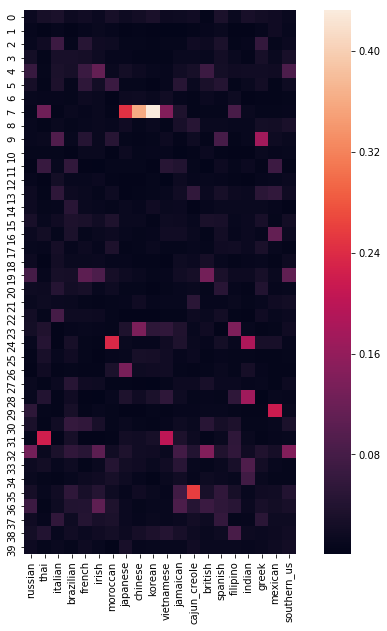

In [67]:
# Визуализируйте матрицу
matrix = compute_topic_cuisine_matrix(ldamodel, corpus, recipes)
plot_matrix(matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 